<a href="https://colab.research.google.com/github/RachelRamirez/CIFAR-10/blob/main/PostAnalysis_Confirming_Optimization_Runs_1_7_2022_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PostAnalysis : Confirming Optimization Runs

last changed 1-7-2021

### Imports /Rand Seed Setting

In [4]:

#@title import libraries - set timer
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import copy
import os
import PIL
import PIL.Image
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
# import keras.utils -- dont do this!! it causes problems, 
from tensorflow.keras.utils import to_categorical  #do this instead!!
import random
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import time
import pickle
from google.colab import files
import datetime # to display the current time hh:mm:ss


!pip install ipython-autotime
%load_ext autotime
tic = time.time()  # Start the timer
initial_run = 0

AUTOTUNE = tf.data.experimental.AUTOTUNE
np.set_printoptions(precision=4)

time: 423 µs (started: 2022-01-12 20:35:19 +00:00)


#### Set Random Seeds

In [5]:
#@title
seed = 42
random.seed(seed)
tf.random.set_seed(seed)
np.random.seed()  # https://stackoverflow.com/questions/11526975/set-random-seed-programwide-in-python
shuffle_seed = seed

# Possibly Need IMGAUG to set seed in ALbumentations
# GitHub Issue: https://github.com/albumentations-team/albumentations/issues/93
import imgaug
imgaug.seed(123)


## ------------------

time: 1.25 s (started: 2022-01-12 20:35:19 +00:00)


## Creating 16 random numbers to sample 10% of the 165 possible models



Final models chosen:
0. A ~ Acc

1.   A	4	\
2.   A	6	\
3.   B	2	\
4. B	3	\
5. C	Acc	\
6. D	2	\
7. F	2	\
8. G	0	\
9. G	 1	\
10. H	0	\
11. H	8	\
12. EFGH	9	\
13. CD	8	\
14. EF	5	\
15. GH	7	\
16. GH	4	\


Further details hidden below


In [6]:
# ## Make 16 random numbers


# a = np.random.randint(1,165,(1,16))
# print(a.sort())
# print(a)
# [[  6   8  15  16  23  37  59  68  70  79  87  88 109 117 123 127]]

time: 1.15 ms (started: 2022-01-12 20:35:20 +00:00)


Uniform random choice of integers between 1 and 165 results in: \
6   8  15  16  23  37  59  68  70  79  87  88 109 117 123 127

Those random integers correspond to: 

A	4	\
A	6	\
B	2	\
B	3	\
C	Acc	\
D	2	\
F	2	\
G	0	\
G	2 **1**	\
H	0	\
H	8	\
H **EFGH**	9	\
CD	8	\
EF	5	\
GH	0 **7**	\
GH	4	\

Therefore the first model will be to model Group A's 4, "Deer Accuracy", followed by Group A's 6, "Frog Accuracy", all the way to Group GH's 4, "Deer Accuracy".  Since there were four 2's and three 0's but no 1's, nor 7's, I changed the last 2 and last 0 to a 1 and 7 respectively to ensure coverage. I also changed the third "H" model to "EFGH" to ensure at least one four-combination group was confirmed.  So the final 10 selected models to confirm I can find optimal settings for are:




1.   A	4	\
2.   A	6	\
3.   B	2	\
4. B	3	\
5. C	Acc	\
6. D	2	\
7. F	2	\
8. G	0	\
9. G	 1	\
10. H	0	\
11. H	8	\
12. EFGH	9	\
13. CD	8	\
14. EF	5	\
15. GH	7	\
16. GH	4	\




Set Logic-Values


# Model Building:  Stage 1 Alpha Value is 0.05, keeping Strong Heredity Assumptions




## Summary of Model Coefficients for Test Accurcay by Group using Stage 1 Alpha = 0.05

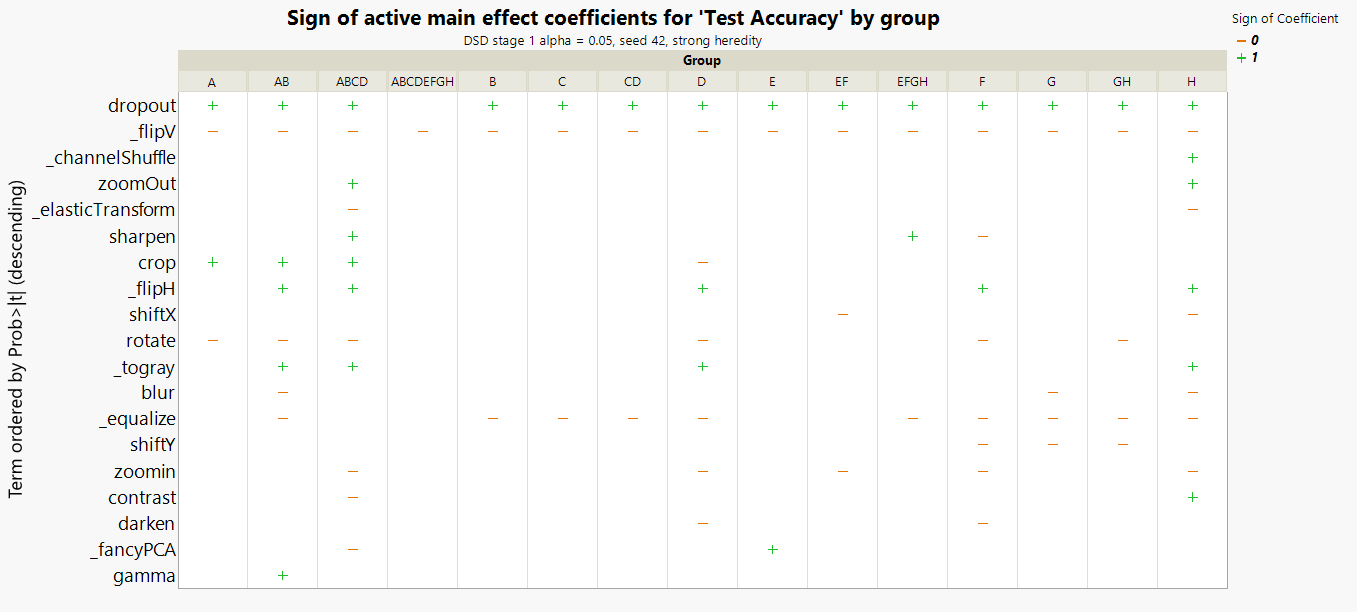

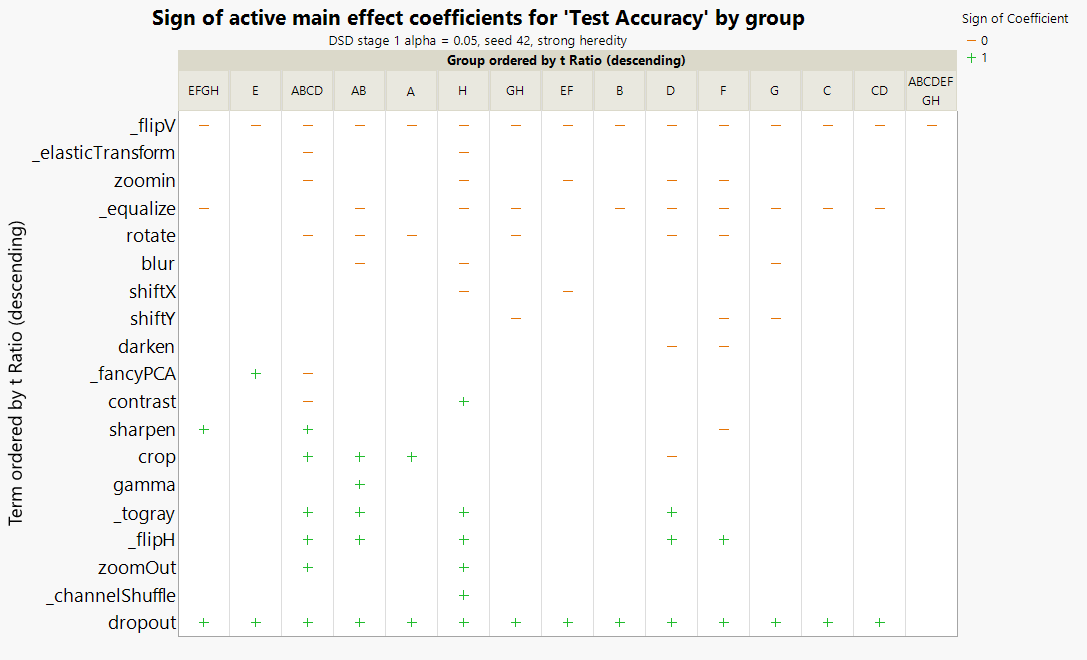

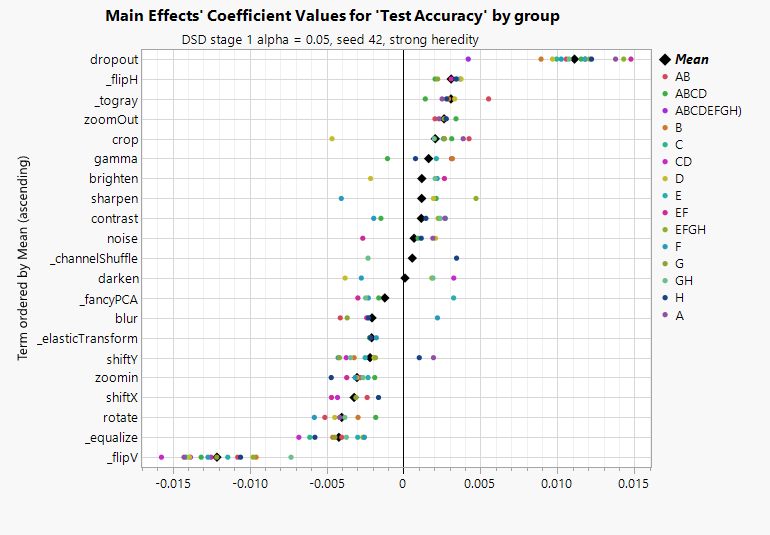

## Model 0: Group A - Overall Test Accuracy

First I ensure that no run 0s are included in the dataset and filter to only have data from seed 42 and group A.  This yields 50 rows (1 through 50) .  The run 0 (hidden) shows a test accuracy of 0.532300 using dropout 0.5 and no image augmentations.
At this point, I realized how that baseline-run is 'unfair' since if dropout was 0.6 it would most likely perform higher, so maybe I should have made my baseline runs use dropout 0.6?  Either way, the baseline doesn't affect the predictive model, but I may need to keep this in mind.  

I believe if I do another baseline run 0 with dropout 0.6 it will most likely perform near the top of all the runs, but I also don't think it's worth running to see that. As an aside, the run most like a "baseline run" in my 50-test-runs is run 14, where every factor is at a low setting, but that means dropout is at 0.4.

**Group A** Test Accuracy varied between 0.4638 and 0.5645, the mean being 0.521, the median being 0.526.  The max run occured on run 38, followed by run 13.  The settings of run 38 and run 13 are described below.

Run 38: Test Accuracy **0.5645**: \\
 **Dropout** 0.6, shiftX 0, **ShiftY** 0.1, **Noise** 24, **Blur** 6, **Contrast** 0.2, **Brighten** 0.2, Darken 0.1, Gamma 100, ZoomOut 0, rotate 0, Crop 0, Zoomin 0, **FlipH** 1, flipV 0, fancyPCA 0, equalize 0, **channelShuff** 1, **elasticTransform** 1, togray 0

Run 13:  Test Accuracy **0.5617** : \\
 **Dropout** 0.6, shiftx 0, **ShiftY** 0.1, Noise 0, blur 0, contrast 0, Brighten 0, Darken 0, **Gamma** 120, **ZoomOut** 0.08, rotate 0, **Crop** 8, Zoomin 0, FlipH 0, flipV 0, **fancyPCA** 1, equalize 0, **channelShuff** 1, elastictransform 0, **togray** 1.
 

### When I didn't add block to the X-variables:


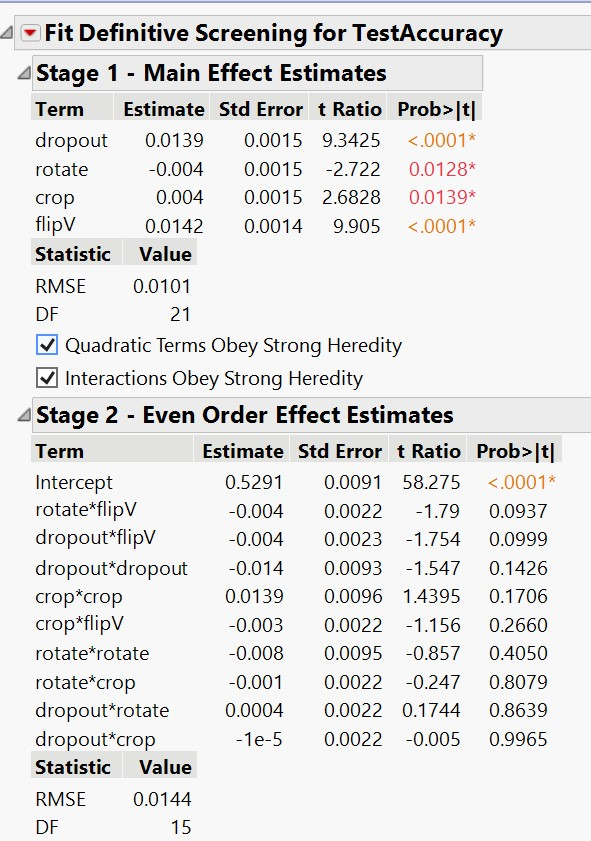

In **Stage 1 ** The JMP defaults of alpha=0.05 are used, and we can see from the above the active main effects are dropout, flipVertical, rotate, and crop, in order of significance.  With just these four main effects in the model,  the model is able to fit a linear model that leaves a RMSE of 0.0144 and DF of 21.  I'm not sure why the DF is 21, and not 45 (49-4).  This may be something weird with DSD?   For comparison, a null model with just an intercept (average), returns a RMSE of 0.0244 and DF 49.  

In **stage 2**, 9 additional second order effects in addition to intercept are modeled.  

Here I also become aware of my use of Block as a fixed effect versus a random effect according to this video: https://community.jmp.com/t5/Phil-Kay-s-Blog/Model-Selection-for-Designed-Experiments-with-Blocks/ba-p/364531 at minute 7 he says its not possible to use JMP to fit a full model (full RSM model for the DSD AND add block as a random effect, he gives three ways fwd, the one i pursue is 'include the block as a fixed effect for model selection and then fit the reduced model with block as a random effect '  So this means, BLOCK is in the X-terms for model selection, if it pops out in the final model I go back and rebuild the model with Block as a random effect.  The weird thing to me is there "Shouldn't" be an active blocking effect, to my knowledge, because the accuracy of a CNN should be the same whether it was trained in the beginning or the end of the day.  If there was a learning-curve or no resetting of the weights, the block would be active all the time, but it's not.  

So now I need to contemplate what the ramnifications are of not using Blocking as a Random Effect Model, since I cannot use step-wise regression if I use Blocking as a Fixed Effect.  The REML method may cause convergence problems if there are non-normality, large orders of magniturde difference.

After watching reading https://community.jmp.com/t5/Phil-Kay-s-Blog/Model-Selection-for-Designed-Experiments-with-Blocks/ba-p/364531

### When I added Block to the X-variables as a fixed efect in Model Building:

The only difference was entering "Block" as a possible x-variable for consideration, and JMP recognized it was a 2nd Order Effect? It didn't put it in Stage 1 Main Effect Estimates, it put it in STage 2 Even Order Effects automatically   So once that happened, Contrast Entered the Stage 1 Effect as a non-significant (alpha > 0.05) effect, but I actually appreciate this... 

However, as of 1/11/2022 when I try to recreate the below result, 'contrast' does not appear, which is really strange.  Only the factors less than 0.05 appear.  So why does JMP show me contrast sometimes, and not this time? ??

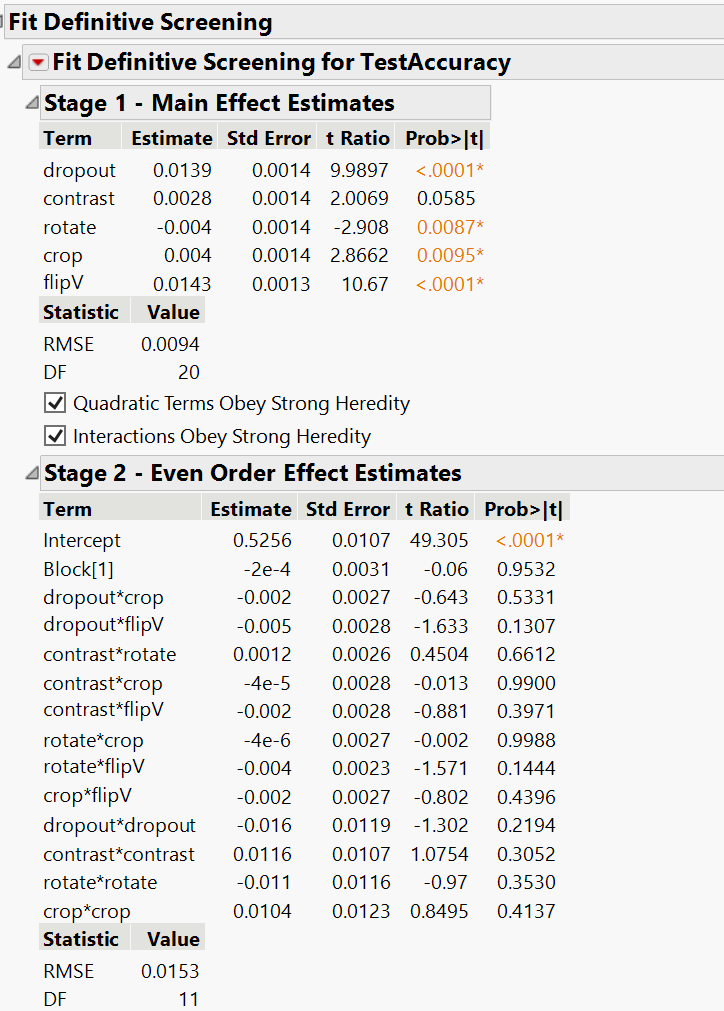

after stepwise linear regression minimum AIC picked the best model to be AIC- = -288.868, , p = 9, no block, in the model, the following resulted:

FlipV, Dropout, Rotate, Crop and Contrast are significant active main effects.  Dropout High Good, Flip Vertical High Bad, everything else seems less sensitive to making a difference.

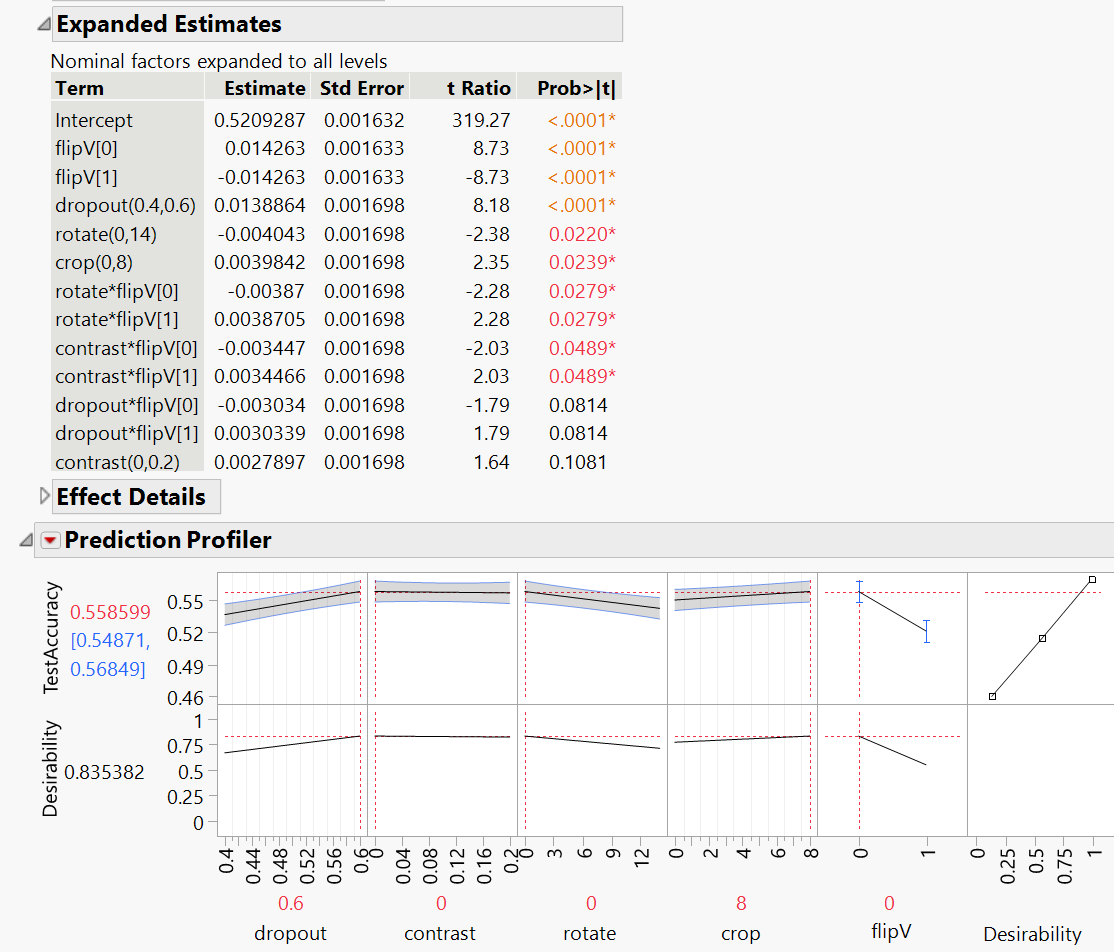

So to confirm the run results of Group A - Test Accuracy - I would need to check the following settings:

**Simple Model (Without adding block)**:  Dropout 0.6, Crop = 8, Contrast = Rotate = FlipV = 0, Predicted Test Accuracy is 0.558599 plus or minus ~0.01, ∈ [0.548, 0.568]

 which to me is the closest I can get to a "Baseline Run" with a minimum image augmentation.  So it's kind of boring.  My thought is this model is test-accuracy level, and , when you make one image augmentation on every category, they are all going to make such great changes it doesn't seem to be beneficial in the long run.  you have to tailor categories independently.  but is there a free lunch?  Can you make use of all the other Ys and optimize desirability on all of them to make a better plan?  

otherwise, back to this current train of thought... \
\

## Final Model Test Accuracy for Group A

Based on the different methods explored above I decide to Set Alpha to 0.05, Add Blocks as a X-variable, Let Stage 1 do its thing whether it does or doesn't show 0.07 I don't like it but its JMP and I'm going to standardize my method here...,  then do Stepwise Linear Regression based off the Combined Stage 1 and STage 2 estimates from DSD, if it includes Block as a significant factor, take it out of the stepwise regression as a linear effect and add it back as a random effect.  Then review Profiler tool to optimize the desirability settings on the significant main effects.  confirm results.    

There are 2 * 2 * 2 * 3 possible ways to start model building based on the 2-options for alpha - 2 options for Quadratic Heredity - 2 options for Interaction Heredity - and 3 options for using Block as a Random Effect versus Linear Effect.  It makes sense to use it as a random effect, it also seems like I should go back to my main intuition and use a bigger alpha value to catch a larger net even though JMP isn't guaranteed to catch everythingbut I'm going to go down this path completely so i can finish my draft report :-( 


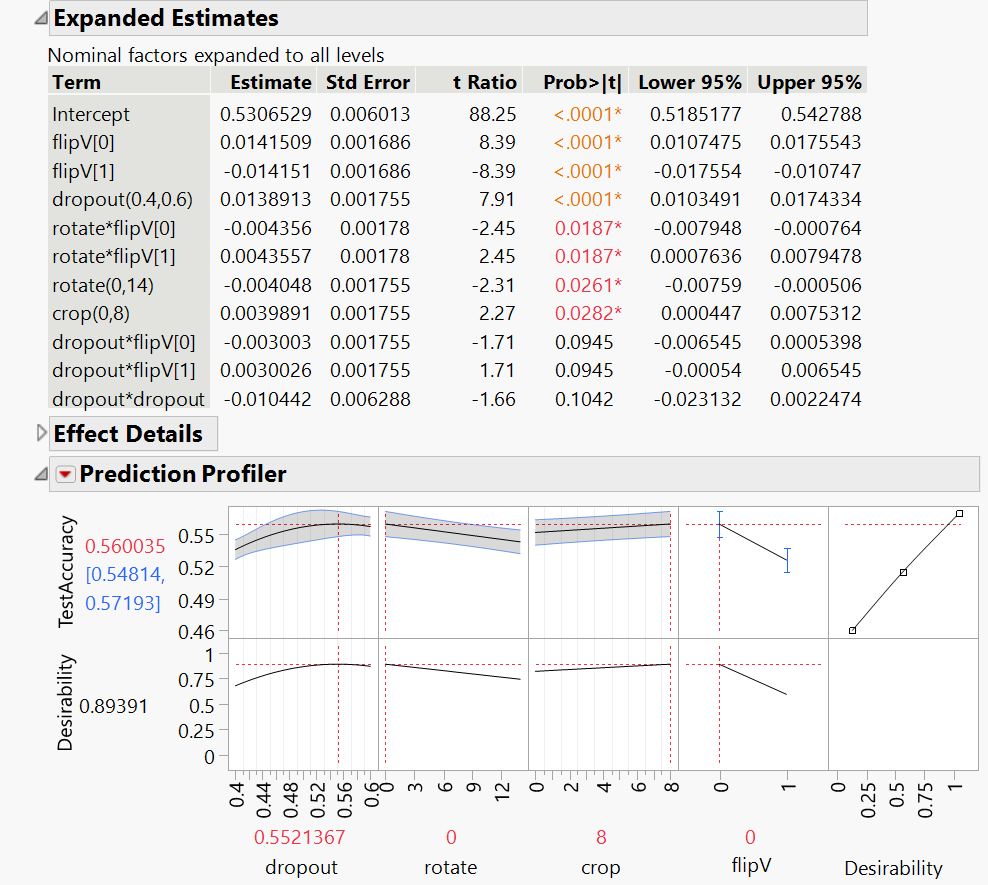

PredictionProfiler	| dropout |	rotate	| crop |	flipV | 	shiftX | 	shiftY | 	noise | 	blur | 	sharpen	 | contrast | 	brighten	 | darken  | 	gamma | 	zoomOut | 	zoomin | 	flipH | 	fancyPCA | 	equalize | 	channelShuffle | 	elasticTransform | 	togray | 	TestAccuracy | 	 Lower CI	TestAccuracy |  Upper CI Test Accuracy | 	Desirability  
 ---	| --- |	---	| --- |	--- | 	--- | 	--- | 	--- | 	--- | 	---	 | --- | 	---	 | ---  | 	--- | 	--- | 	--- | 	--- | 	--- | 	--- | 	--- | 	--- | 	--- | --- | 	---| --- | ---  
  _OptimalTestAccuracy_GroupA_ | 	0.5506359	|0|8|	0	|0|	0.1|	24|	7	|0|	0.2|	0.2	|0|	100|	0.16|	0	|0|	0|	0	|1|	1|	1|	0.5821609|	0.5609192|	0.6034026	|0.997372 | \ 
 _OptimalTestAccuracy_GroupA_ | 	0.5521367	|0|8| 0 |	--- | 	--- | 	--- | 	--- | 	---	 | --- | 	---	 | ---  | 	--- | 	--- | 	--- | 	--- | 	--- | 	--- | 	--- | 	--- | 	--- | -X- | 	<X- | --- | 	---  
 

confirmation runs


**Run**	| dropout |	shiftX | shiftY | noise | blur | sharpen | contrast | 	brighten	 | darken  | 	gamma | 	zoomOut | rotate	| crop |	zoomin | 	flipH |flipV | 	fancyPCA | 	equalize | 	channelShuffle | 	elasticTransform | 	toGray | 	Resulting TestAccuracy | 	Comments 
---	| --- |	---	| --- |	--- | 	--- | 	--- | 	--- | 	--- | 	---	 | --- | 	---	 | ---  | 	--- | 	--- | 	--- | 	--- | 	--- | 	--- | --- |   ---- | --- | --- | --- 
51 |  0.6 |0 |  0.0519448 |24 |0 |0|0.2 |0 |0 | 100 |0.16| 0 |0|0|0|0|0|0|        0|1|1| 0.551800012588501 | 	this ShiftValue was probably not ideal 
 52 |  0.550635894 |  	0|	0.1|        	24|      7|	    0|        	0 2|            	0.2|  	      0|	100|	    0.16|	       0|	      8|	      0|	     0|	      0|	      0|	        0|      	1|   1|	1 | 0.5491999983787537| X
53| 0.550635894| 	0|	0.1 |24|	     7|	    0|        	0.2|      	      0.2|	        0|  100|	    0.16|	       0|     	8|	      0|	     0|	      0|	      0|	        0|	      0|                       0 |	            1 | 	0.5587999820709229 | 	<- Largest so far 
54|  0.550635894| 	0|	0.1|          24|      7|	    0|        	0.2|	            0.2|	        0|	100|	    0.16|	       0|     	8|	      0|	     0|	      0|	      0|	        0|	      0|                       0|	              0|	0.5455999970436096 | 	X 
55 |	0.55063589|	0|	0.1|	24|	7|	0|	0.2|	0.2|	0|	100|	0.16|	0|	8|	0|	0|	0|	0|	0|	1|	1|	1|	0.549199998 |	X
56 |	0.6|	0|	0|	0|	0|	0|	0|	0|	0|	100|	0|	0|	0|	0|	0|	0|	0|	0|	0|	0|	0|	0.531700015 |	X
57 |	  0.5521367|	0|	0|	0|	0|	0|	0|	0|	0|	100|	0|	0|	8|	0|	0|	0|	0|	0|	0|	0|	0|	0.533800006 | X
58 |	0.6|	0|	0.05272|	24|	7|	0|	0.2|	0.2|	0|	100|	0|	0|	8|	0|	0|	0|	0|	0|	1|	1|	1|	X |	Y




#### Misclassification Minimization of Group A: 1->9 

In addition to Test Accuracy, I found one of the most negative correlated relationships between the 100*100 combinations in the confusion matrix, and found the number of 1's identified as 9's is most negatively correlated strongly with the number of 1's identified as 1's.  So I decided to build a model on that category, using the same process as above, and got the following predictions by minimizing the desirabiliity of 1-> 9 (mind you its' a very bad fit R^2 is 0.3.  


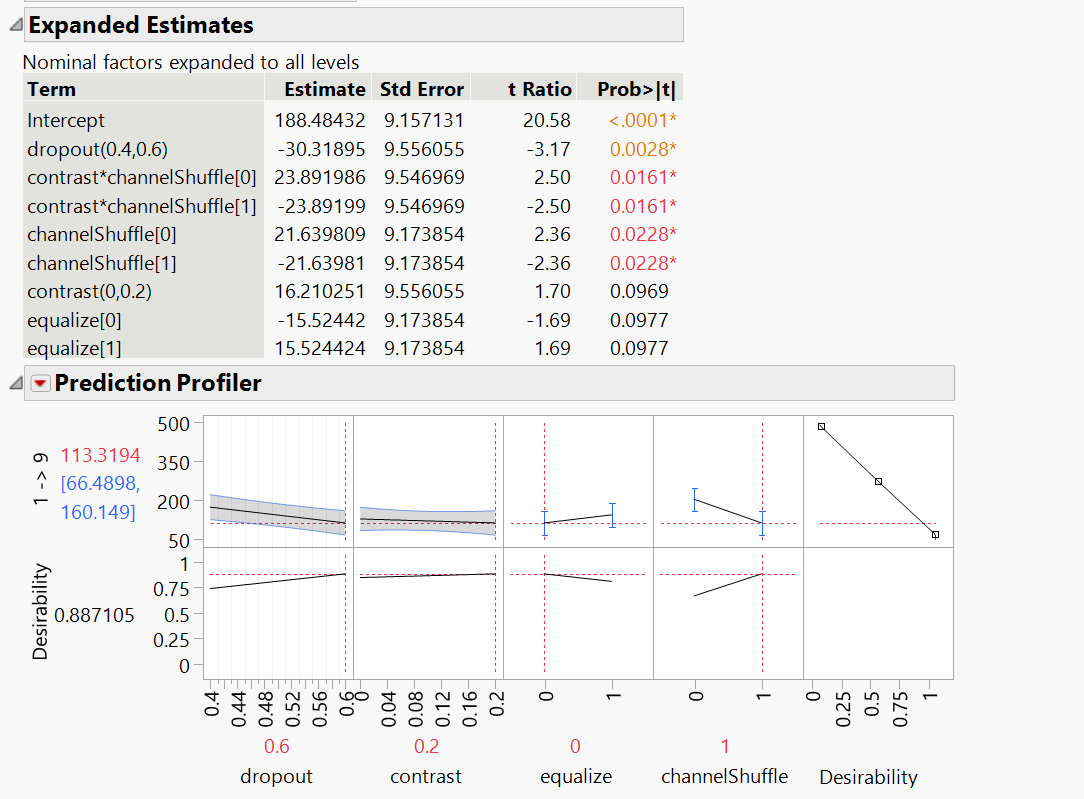

these findings also confirm, somewhat, that dropout of 0.6 helps.  

## Model 1: Group A - 4 Accuracy

## Model 2: Group A - 6 Accuracy

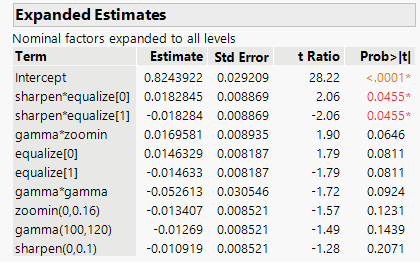

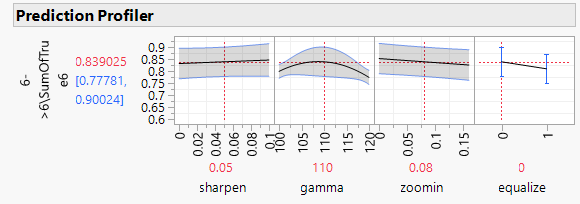

## Model 3: Group B - 2 Accuracy

## Model 4: Group B - 3 Accuracy

## Model 5: Group C - Overall Test Accuracy

## Model 6: Group D - 2 Accuracy

## Model 7: Group F - 2 Accuracy

## Model 8: Group G - 0 Accuracy

## Model 9: Group G - 1 Accuracy

## Model 10: Group H - 0 Accuracy

## Model 11: Group H - 8 Accuracy

## Model 12: Group EFGH - 9 Accuracy

## Model 13: Group CD - 8 Accuracy

## Model 14: Group EF - 5 Accuracy

## Model 15: Group GH - 7 Accuracy

## Model 16: Group GH - 4 Accuracy








---



---



---



---



# Model Building:  Stage 1 **Alpha Value is 0.2**, keeping Strong Heredity Assumptions 

## Model 0: Group A - Overall Test Accuracy

## Model 1: Group A - 4 Accuracy

## Model 2: Group A - 6 Accuracy

## Model 3: Group B - 2 Accuracy

## Model 4: Group B - 3 Accuracy

## Model 5: Group C - Overall Test Accuracy

## Model 6: Group D - 2 Accuracy

## Model 7: Group F - 2 Accuracy

## Model 8: Group G - 0 Accuracy

## Model 9: Group G - 1 Accuracy

## Model 10: Group H - 0 Accuracy

## Model 11: Group H - 8 Accuracy

## Model 12: Group EFGH - 9 Accuracy

## Model 13: Group CD - 8 Accuracy

## Model 14: Group EF - 5 Accuracy

## Model 15: Group GH - 7 Accuracy

## Model 16: Group GH - 4 Accuracy

In [7]:
run_model = False  #When Im looking at augmentations, I don't want to keep refitting a model, I want to just get the database of images loaded

time: 1.46 ms (started: 2022-01-12 20:35:20 +00:00)


Make Image Datasets

One of my biggest learning curves was learning how to load  the dataset with tdfs.load() and then filter on images by label.  

The second biggest was using the created model to make predictions on the test set.   

Current but "skipped" problem is trying to view misclassifeid images of results.


Another area of problems is rerunning when you've already specified a batch on your dataset creates another "batch" split so it can cause problems to rerun a cell that says how to define a dataset.  Unbatch may be needed first.    

# **1. Create All DataSets**

### Load Dataset

In [8]:
#@title


# A weird problem happened where it said the toronto website cant be reached, if that ever happens again make sure to go to SO for this advice https://stackoverflow.com/questions/36805640/this-error-while-downloading-datasets-valueerror-i-o-operation-on-closed-file

# How do I set IDs on: read_config.add_tfds_id = True
read_config = tfds.ReadConfig(shuffle_seed=seed) 
read_config.add_tfds_id = True  ## This didnt update ReadConfig 

dataset, info = tfds.load('cifar10', as_supervised=True, with_info=True, read_config=read_config)
x_test =  dataset["test"]
dataset  = dataset["train"]
assert isinstance(x_test, tf.data.Dataset)
#x_test = [(example.numpy(), label.numpy()) for example, label in x_test]
# once broken into numpy arrays, my model still doesn't handle it, it seems to be expecting a tensor
# So i think i have to break it into two tensors?  test_x, test_y?
# x_test[0][0]
# x_test[0][1]
# x_test = pd.DataFrame(x_test, columns=['example', 'label'])
# x_test = tf.data.Dataset.from_generator(lambda: x_test, (tf.int64, tf.int16))
# x_list = list(x_test.as_numpy_iterator())  # Crashes Google Colab!
# print(x_list[:5])


#  I got this from stack-overflow.  Need this code to define y_test, the labels of testset

def get_labels_from_tfdataset(tfdataset, batched=False):
    labels = list(map(lambda x: x[1], tfdataset)) # Get labels 
    if not batched:
        return tf.concat(labels, axis=0) # concat the list of batched labels
    return labels
y_test = get_labels_from_tfdataset(x_test)

# tfds.as_dataframe(dataset.take(5), info)  #does not display image ID :-( )

dataset_airplanes   = dataset.filter(lambda img, label: label == 0)
dataset_automobiles = dataset.filter(lambda img, label: label == 1)
dataset_birds       = dataset.filter(lambda img, label: label == 2)
dataset_cats        = dataset.filter(lambda img, label: label == 3)
dataset_deers       = dataset.filter(lambda img, label: label == 4)
dataset_dogs        = dataset.filter(lambda img, label: label == 5)
dataset_frogs       = dataset.filter(lambda img, label: label == 6)
dataset_horses      = dataset.filter(lambda img, label: label == 7)
dataset_ships       = dataset.filter(lambda img, label: label == 8)
dataset_trucks      = dataset.filter(lambda img, label: label == 9)

##  Ways to count the number of images in the sets:
print("There are ways to count and verify the number per training set which i have hidden because they are costly")
print("Entire Training Dataset was originally cardinality:", tf.data.experimental.cardinality(dataset).numpy()) #   prints 50,000, correct
print("Entire Airplane Training Dataset was originally cardinality:", tf.data.experimental.cardinality(dataset_airplanes).numpy()) #   prints -2 this is a "feature" in tf when a set takes too long to count
# print(dataset_airplanes.reduce(np.int64(0), lambda x,_ : x + 1).numpy()) #prints 5000, correct

##  This is a way of asserting that all the images have the same label in a set
# for img, label in dataset_dogs:
#   assert label == 5
 

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/cifar10/3.0.2.incompleteHBRPOI/cifar10-train.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/cifar10/3.0.2.incompleteHBRPOI/cifar10-test.tfrecord


  0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.
There are ways to count and verify the number per training set which i have hidden because they are costly
Entire Training Dataset was originally cardinality: 50000
Entire Airplane Training Dataset was originally cardinality: -2
time: 1min 24s (started: 2022-01-12 20:35:20 +00:00)


### Show Examples in the Three Train/Val/Test Sets.  Count CIFAR 10 Functions

In [9]:
#@title 'count_cifar10_class' { form-width: "1px" }
# define a fuction to count the numbre of each class
# I'm not going to worry about it now, but if i had time to cleanup code I would 
# Try to use this type of if/zip structure  https://stackoverflow.com/questions/57784643/if-statement-and-zip



 
def count_cifar10_class(datasetpassed):
  # takes the datasetpassed and returns the number of each category as a ten-tupple
  num_airplanes, num_automobiles, num_birds, num_cats, num_deers = 0,0,0,0,0
  num_dogs, num_frogs, num_horses, num_ships, num_trucks= 0, 0, 0,0,0


  # print("Unbatched?" , check_if_unbatched(datasetpassed))
  # print("Take?", check_if_take(datasetpassed))
  # print("Unbatched or Take?", ( check_if_unbatched(datasetpassed) or  check_if_take(datasetpassed)))

  if ( check_if_unbatched(datasetpassed) or  check_if_take(datasetpassed)):
    if check_if_take(datasetpassed):
      datasetpassed = make_unbatched(datasetpassed)

    for img, label in datasetpassed:
      if label == 0:
        num_airplanes += 1

      if label == 1:
        num_automobiles += 1

      if label == 2:
        num_birds +=1

      if label == 3:
        num_cats +=1

      if label ==4: 
        num_deers += 1

      if label == 5:
        num_dogs += 1 

      if label == 6:
          num_frogs += 1

      if label == 7:
        num_horses += 1

      if label == 8:
        num_ships +=1 

      if label == 9: 
        num_trucks +=1
    
    return num_airplanes, num_automobiles, num_birds, num_cats, num_deers, num_dogs, num_frogs, num_horses, num_ships, num_trucks 
  # else if the dataset is not batched or if one batch from take is being passed, proceed to counting thing below 
  else:
    print(" ** Dataset is batched, please pass 1 batch at a time to cifar10 to see metrics ** ")



  




time: 31.5 ms (started: 2022-01-12 20:36:44 +00:00)


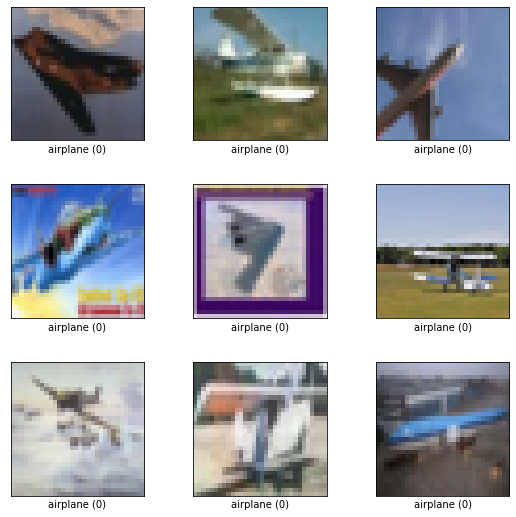

time: 515 ms (started: 2022-01-12 20:36:44 +00:00)


In [10]:
#@title ShowExamplesofDatasetAirplanes
## Tfds.show_examples is a matplotlib funnction that only works on image ds's, and you have to pass it the "info" for some reason
fig = tfds.show_examples(dataset_airplanes, info)

How to display one picture of a dataset using `next(iter(dataset)`

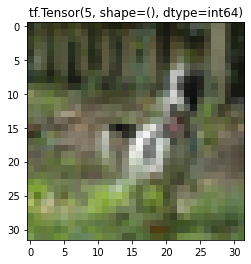

time: 302 ms (started: 2022-01-12 20:36:45 +00:00)


In [11]:
#@title ShowExampleofOneIterations of DatasetDogs { form-width: "20px" }
# I wish I could display ID!!

img, label = next(iter(dataset_dogs))
plt.title(str(label))
plt.imshow(img)

#0x7f6e309eff10?


## Create validation set of 10,000 images

In [12]:
#@title
# I want 10 un replicated samples from dataset_airplanes + dataset_automobiles... dataset_trucks.

# There are 5000 images of each Class 
# I want 10 equal sets A, B, C, D, ... J plus a validation set
# I want 10,000 total images in the validation set with 1000 of each class
# and I want 10 sets of training images  4000 total images, so 400 images in each class

N = 1000
dataset_airplanes_val   = dataset_airplanes.take(N)
dataset_automobiles_val  = dataset_automobiles.take(N)
dataset_birds_val       = dataset_birds.take(N)  
dataset_cats_val        = dataset_cats.take(N)
dataset_deers_val       = dataset_deers.take(N)
dataset_dogs_val        = dataset_dogs.take(N)
dataset_frogs_val       = dataset_frogs.take(N)
dataset_horses_val      = dataset_horses.take(N)
dataset_ships_val       = dataset_ships.take(N)
dataset_trucks_val      = dataset_trucks.take(N)


# Make sure to skip the next 1000 images in each data set before making training set
dataset_airplanes   = dataset_airplanes.skip(N)
dataset_automobiles  = dataset_automobiles.skip(N)
dataset_birds      = dataset_birds.skip(N)  
dataset_cats        = dataset_cats.skip(N)
dataset_deers       = dataset_deers.skip(N)
dataset_dogs        = dataset_dogs.skip(N)
dataset_frogs       = dataset_frogs.skip(N)
dataset_horses      = dataset_horses.skip(N)
dataset_ships       = dataset_ships.skip(N)
dataset_trucks      = dataset_trucks.skip(N)

# # Check that remaining dataset does not have validation data
# fig = tfds.show_examples(dataset_ships, info)
# fig = tfds.show_examples(dataset_ships_val, info)
# # I checked and they dont.


# NOW, How do I combine my val sets?

# Hint1 its not this... 
# val = dataset_airplanes_val + dataset_automobile_val + dataset_birds_val

# #  Hint2 its also not this implementation of zip because the info file doesn't match it
# val = tf.data.Dataset.zip((dataset_airplanes_val,
#                     dataset_automobile_val,
#                     dataset_birds_val,
#                     dataset_cats_val,
#                     dataset_deers_val,
#                     dataset_dogs_val,
#                     dataset_frogs_val,
#                     dataset_horses_val,
#                     dataset_ships_val,
#                     dataset_trucks_val ))
 
# fig = tfds.show_examples(val, info)   # Returns a warning that the info file is not compatible


# is it concatenate? YESSSSSSSSSSSSSSSSSSSSSS
val = dataset_airplanes_val.concatenate(dataset_automobiles_val)
# This is how I checked that it worked
# fig = tfds.show_examples(val.skip(999), info)    # shows 1 airplane and then 8 automobiles

val = val.concatenate(dataset_birds_val)
val = val.concatenate(dataset_cats_val)
val = val.concatenate(dataset_deers_val)
val = val.concatenate(dataset_dogs_val)
val = val.concatenate(dataset_frogs_val)
val = val.concatenate(dataset_horses_val)
val = val.concatenate(dataset_ships_val)
val = val.concatenate(dataset_trucks_val)
  
# print(val.reduce(np.int32(0), lambda x,_ : x + 1))  # this shows 10000! Thank goodness! :-)



time: 56.6 ms (started: 2022-01-12 20:36:45 +00:00)


## Create smaller training groups of each CIFAR Class sets (set Shard)

After removing the 10,000 validation set from the training-data, the remaining set has 40,000 images, 4000 images of each class.  To create smaller training-datasets of similar sizes, shard the dataset into equal pieces.

For the initial days of testing I decided on **250 images** per class for my first couple runs, which equates to 16 shards (40,000/16 = 250) .  When I wanted to study what was going on more beneath the hood for my augmentations, I decided to make the training set even more tiny so I could view all the images per training set I decided to try 1 image per class so I could easily view all the images augmeted and not augmented.  This meant I needed **4000 shards!** for troubleshooting.



In [13]:
SHARDS=16

time: 806 µs (started: 2022-01-12 20:36:45 +00:00)


 Airplanes (airplanes_A, ... airplanes_P)

In [14]:
#@title
# https://www.tensorflow.org/api_docs/python/tf/data/Dataset#shard

# Check that each of the remaining 10 datasets has only 4000 images 
# print(dataset_airplanes.reduce(np.int32(0), lambda x,_ : x + 1))  # 4000 check!

# Shard each of the remaining 10 datasets into 16 smaller groups
airplanes_A = dataset_airplanes.shard(num_shards=SHARDS, index = 0)
airplanes_B = dataset_airplanes.shard(num_shards=SHARDS, index = 1)
airplanes_C = dataset_airplanes.shard(num_shards=SHARDS, index = 2)
airplanes_D = dataset_airplanes.shard(num_shards=SHARDS, index = 3)
airplanes_E = dataset_airplanes.shard(num_shards=SHARDS, index = 4)
airplanes_F = dataset_airplanes.shard(num_shards=SHARDS, index = 5)
airplanes_G = dataset_airplanes.shard(num_shards=SHARDS, index = 6)
airplanes_H = dataset_airplanes.shard(num_shards=SHARDS, index = 7)
airplanes_I = dataset_airplanes.shard(num_shards=SHARDS, index = 8)
airplanes_J = dataset_airplanes.shard(num_shards=SHARDS, index = 9)
airplanes_K = dataset_airplanes.shard(num_shards=SHARDS, index = 10)
airplanes_L = dataset_airplanes.shard(num_shards=SHARDS, index = 11)
airplanes_M = dataset_airplanes.shard(num_shards=SHARDS, index = 12)
airplanes_N = dataset_airplanes.shard(num_shards=SHARDS, index = 13)
airplanes_O = dataset_airplanes.shard(num_shards=SHARDS, index = 14)
airplanes_P = dataset_airplanes.shard(num_shards=SHARDS, index = 15)

#check that a random airplane dataset only has 250 images
# print(airplanes_M.reduce(np.int32(0), lambda x,_ : x + 1))  # 250 check!


time: 40.3 ms (started: 2022-01-12 20:36:45 +00:00)


 Automobiles

In [15]:
#@title
# dataset_automobile

# Check that each of the remaining 10 datasets has only 4000 images 
# print(dataset_automobile.reduce(np.int32(0), lambda x,_ : x + 1))  # 4000 check!

# Shard each of the remaining 10 datasets into 16 smaller groups
automobiles_A = dataset_automobiles.shard(num_shards=SHARDS, index = 0)
automobiles_B = dataset_automobiles.shard(num_shards=SHARDS, index = 1)
automobiles_C = dataset_automobiles.shard(num_shards=SHARDS, index = 2)
automobiles_D = dataset_automobiles.shard(num_shards=SHARDS, index = 3)
automobiles_E = dataset_automobiles.shard(num_shards=SHARDS, index = 4)
automobiles_F = dataset_automobiles.shard(num_shards=SHARDS, index = 5)
automobiles_G = dataset_automobiles.shard(num_shards=SHARDS, index = 6)
automobiles_H = dataset_automobiles.shard(num_shards=SHARDS, index = 7)
automobiles_I = dataset_automobiles.shard(num_shards=SHARDS, index = 8)
automobiles_J = dataset_automobiles.shard(num_shards=SHARDS, index = 9)
automobiles_K = dataset_automobiles.shard(num_shards=SHARDS, index = 10)
automobiles_L = dataset_automobiles.shard(num_shards=SHARDS, index = 11)
automobiles_M = dataset_automobiles.shard(num_shards=SHARDS, index = 12)
automobiles_N = dataset_automobiles.shard(num_shards=SHARDS, index = 13)
automobiles_O = dataset_automobiles.shard(num_shards=SHARDS, index = 14)
automobiles_P = dataset_automobiles.shard(num_shards=SHARDS, index = 15)


#check that a random airplane dataset only has 250 images
# print(airplanes_H.reduce(np.int32(0), lambda x,_ : x + 1))  # 250 check!

time: 26 ms (started: 2022-01-12 20:36:45 +00:00)


 Birds

In [16]:
#@title
# dataset_birds

# Shard each of the remaining 10 datasets into 16 smaller groups
birds_A = dataset_birds.shard(num_shards=SHARDS, index = 0)
birds_B = dataset_birds.shard(num_shards=SHARDS, index = 1)
birds_C = dataset_birds.shard(num_shards=SHARDS, index = 2)
birds_D = dataset_birds.shard(num_shards=SHARDS, index = 3)
birds_E = dataset_birds.shard(num_shards=SHARDS, index = 4)
birds_F = dataset_birds.shard(num_shards=SHARDS, index = 5)
birds_G = dataset_birds.shard(num_shards=SHARDS, index = 6)
birds_H = dataset_birds.shard(num_shards=SHARDS, index = 7)
birds_I = dataset_birds.shard(num_shards=SHARDS, index = 8)
birds_J = dataset_birds.shard(num_shards=SHARDS, index = 9)
birds_K = dataset_birds.shard(num_shards=SHARDS, index = 10)
birds_L = dataset_birds.shard(num_shards=SHARDS, index = 11)
birds_M = dataset_birds.shard(num_shards=SHARDS, index = 12)
birds_N = dataset_birds.shard(num_shards=SHARDS, index = 13)
birds_O = dataset_birds.shard(num_shards=SHARDS, index = 14)
birds_P = dataset_birds.shard(num_shards=SHARDS, index = 15)

#check that a random airplane dataset only has 250 images
# print(airplanes_H.reduce(np.int32(0), lambda x,_ : x + 1))  # 250 check!

time: 26 ms (started: 2022-01-12 20:36:45 +00:00)


 Cats

In [17]:
#@title
# dataset_cats

# Shard each of the remaining 10 datasets into 16 smaller groups
cats_A = dataset_cats.shard(num_shards=SHARDS, index = 0)
cats_B = dataset_cats.shard(num_shards=SHARDS, index = 1)
cats_C = dataset_cats.shard(num_shards=SHARDS, index = 2)
cats_D = dataset_cats.shard(num_shards=SHARDS, index = 3)
cats_E = dataset_cats.shard(num_shards=SHARDS, index = 4)
cats_F = dataset_cats.shard(num_shards=SHARDS, index = 5)
cats_G = dataset_cats.shard(num_shards=SHARDS, index = 6)
cats_H = dataset_cats.shard(num_shards=SHARDS, index = 7)
cats_I = dataset_cats.shard(num_shards=SHARDS, index = 8)
cats_J = dataset_cats.shard(num_shards=SHARDS, index = 9)
cats_K = dataset_cats.shard(num_shards=SHARDS, index = 10)
cats_L = dataset_cats.shard(num_shards=SHARDS, index = 11)
cats_M = dataset_cats.shard(num_shards=SHARDS, index = 12)
cats_N = dataset_cats.shard(num_shards=SHARDS, index = 13)
cats_O = dataset_cats.shard(num_shards=SHARDS, index = 14)
cats_P = dataset_cats.shard(num_shards=SHARDS, index = 15)
#check that a random airplane dataset only has 250 images
# print(cats_P.reduce(np.int32(0), lambda x,_ : x + 1))  # 250 check!

time: 30.7 ms (started: 2022-01-12 20:36:45 +00:00)


 Deer(s)

In [18]:
#@title
# dataset_deers
# Shard each of the remaining 10 datasets into 16 smaller groups
deers_A = dataset_deers.shard(num_shards=SHARDS, index = 0)
deers_B = dataset_deers.shard(num_shards=SHARDS, index = 1)
deers_C = dataset_deers.shard(num_shards=SHARDS, index = 2)
deers_D = dataset_deers.shard(num_shards=SHARDS, index = 3)
deers_E = dataset_deers.shard(num_shards=SHARDS, index = 4)
deers_F = dataset_deers.shard(num_shards=SHARDS, index = 5)
deers_G = dataset_deers.shard(num_shards=SHARDS, index = 6)
deers_H = dataset_deers.shard(num_shards=SHARDS, index = 7)
deers_I = dataset_deers.shard(num_shards=SHARDS, index = 8)
deers_J = dataset_deers.shard(num_shards=SHARDS, index = 9)
deers_K = dataset_deers.shard(num_shards=SHARDS, index = 10)
deers_L = dataset_deers.shard(num_shards=SHARDS, index = 11)
deers_M = dataset_deers.shard(num_shards=SHARDS, index = 12)
deers_N = dataset_deers.shard(num_shards=SHARDS, index = 13)
deers_O = dataset_deers.shard(num_shards=SHARDS, index = 14)
deers_P = dataset_deers.shard(num_shards=SHARDS, index = 15)
#check that a random airplane dataset only has 250 images
# print(deers_H.reduce(np.int32(0), lambda x,_ : x + 1))  # 250 check!

time: 25.8 ms (started: 2022-01-12 20:36:45 +00:00)


 Dogs

In [19]:
#@title
# dataset_dogs
# Shard each of the remaining 10 datasets into 16 smaller groups
dogs_A = dataset_dogs.shard(num_shards=SHARDS, index = 0)
dogs_B = dataset_dogs.shard(num_shards=SHARDS, index = 1)
dogs_C = dataset_dogs.shard(num_shards=SHARDS, index = 2)
dogs_D = dataset_dogs.shard(num_shards=SHARDS, index = 3)
dogs_E = dataset_dogs.shard(num_shards=SHARDS, index = 4)
dogs_F = dataset_dogs.shard(num_shards=SHARDS, index = 5)
dogs_G = dataset_dogs.shard(num_shards=SHARDS, index = 6)
dogs_H = dataset_dogs.shard(num_shards=SHARDS, index = 7)
dogs_I = dataset_dogs.shard(num_shards=SHARDS, index = 8)
dogs_J = dataset_dogs.shard(num_shards=SHARDS, index = 9)
dogs_K = dataset_dogs.shard(num_shards=SHARDS, index = 10)
dogs_L = dataset_dogs.shard(num_shards=SHARDS, index = 11)
dogs_M = dataset_dogs.shard(num_shards=SHARDS, index = 12)
dogs_N = dataset_dogs.shard(num_shards=SHARDS, index = 13)
dogs_O = dataset_dogs.shard(num_shards=SHARDS, index = 14)
dogs_P = dataset_dogs.shard(num_shards=SHARDS, index = 15)

#check that a random airplane dataset only has 250 images
# print(dogs_H.reduce(np.int32(0), lambda x,_ : x + 1))  # 250 check!


time: 30.4 ms (started: 2022-01-12 20:36:45 +00:00)


 Frogs

In [20]:
#@title
# dataset_frogs
# Shard each of the remaining 10 datasets into 16 smaller groups
frogs_A = dataset_frogs.shard(num_shards=SHARDS, index = 0)
frogs_B = dataset_frogs.shard(num_shards=SHARDS, index = 1)
frogs_C = dataset_frogs.shard(num_shards=SHARDS, index = 2)
frogs_D = dataset_frogs.shard(num_shards=SHARDS, index = 3)
frogs_E = dataset_frogs.shard(num_shards=SHARDS, index = 4)
frogs_F = dataset_frogs.shard(num_shards=SHARDS, index = 5)
frogs_G = dataset_frogs.shard(num_shards=SHARDS, index = 6)
frogs_H = dataset_frogs.shard(num_shards=SHARDS, index = 7)
frogs_I = dataset_frogs.shard(num_shards=SHARDS, index = 8)
frogs_J = dataset_frogs.shard(num_shards=SHARDS, index = 9)
frogs_K = dataset_frogs.shard(num_shards=SHARDS, index = 10)
frogs_L = dataset_frogs.shard(num_shards=SHARDS, index = 11)
frogs_M = dataset_frogs.shard(num_shards=SHARDS, index = 12)
frogs_N = dataset_frogs.shard(num_shards=SHARDS, index = 13)
frogs_O = dataset_frogs.shard(num_shards=SHARDS, index = 14)
frogs_P = dataset_frogs.shard(num_shards=SHARDS, index = 15)
#check that a random airplane dataset only has 250 images
# print(frogs_A.reduce(np.int32(0), lambda x,_ : x + 1))  # 250 check!

time: 23.9 ms (started: 2022-01-12 20:36:46 +00:00)


 Horses

In [21]:
#@title
# dataset_horses
# Shard each of the remaining 10 datasets into 16 smaller groups
horses_A = dataset_horses.shard(num_shards=SHARDS, index = 0)
horses_B = dataset_horses.shard(num_shards=SHARDS, index = 1)
horses_C = dataset_horses.shard(num_shards=SHARDS, index = 2)
horses_D = dataset_horses.shard(num_shards=SHARDS, index = 3)
horses_E = dataset_horses.shard(num_shards=SHARDS, index = 4)
horses_F = dataset_horses.shard(num_shards=SHARDS, index = 5)
horses_G = dataset_horses.shard(num_shards=SHARDS, index = 6)
horses_H = dataset_horses.shard(num_shards=SHARDS, index = 7)
horses_I = dataset_horses.shard(num_shards=SHARDS, index = 8)
horses_J = dataset_horses.shard(num_shards=SHARDS, index = 9)
horses_K = dataset_horses.shard(num_shards=SHARDS, index = 10)
horses_L = dataset_horses.shard(num_shards=SHARDS, index = 11)
horses_M = dataset_horses.shard(num_shards=SHARDS, index = 12)
horses_N = dataset_horses.shard(num_shards=SHARDS, index = 13)
horses_O = dataset_horses.shard(num_shards=SHARDS, index = 14)
horses_P = dataset_horses.shard(num_shards=SHARDS, index = 15)
#check that a random airplane dataset only has 250 images
# print(horses_H.reduce(np.int32(0), lambda x,_ : x + 1))  # 250 check!

time: 25.5 ms (started: 2022-01-12 20:36:46 +00:00)


 Ships

In [22]:
#@title
# dataset_ships
# Shard each of the remaining 10 datasets into 16 smaller groups
ships_A = dataset_ships.shard(num_shards=SHARDS, index = 0)
ships_B = dataset_ships.shard(num_shards=SHARDS, index = 1)
ships_C = dataset_ships.shard(num_shards=SHARDS, index = 2)
ships_D = dataset_ships.shard(num_shards=SHARDS, index = 3)
ships_E = dataset_ships.shard(num_shards=SHARDS, index = 4)
ships_F = dataset_ships.shard(num_shards=SHARDS, index = 5)
ships_G = dataset_ships.shard(num_shards=SHARDS, index = 6)
ships_H = dataset_ships.shard(num_shards=SHARDS, index = 7)
ships_I = dataset_ships.shard(num_shards=SHARDS, index = 8)
ships_J = dataset_ships.shard(num_shards=SHARDS, index = 9)
ships_K = dataset_ships.shard(num_shards=SHARDS, index = 10)
ships_L = dataset_ships.shard(num_shards=SHARDS, index = 11)
ships_M = dataset_ships.shard(num_shards=SHARDS, index = 12)
ships_N = dataset_ships.shard(num_shards=SHARDS, index = 13)
ships_O = dataset_ships.shard(num_shards=SHARDS, index = 14)
ships_P = dataset_ships.shard(num_shards=SHARDS, index = 15)
#check that a random airplane dataset only has 250 images
# print(ships_H.reduce(np.int32(0), lambda x,_ : x + 1))  # 250 check!

time: 22 ms (started: 2022-01-12 20:36:46 +00:00)


 Trucks


In [23]:
#@title
# dataset_trucks
# Shard each of the remaining 10 datasets into 16 smaller groups
trucks_A = dataset_trucks.shard(num_shards=SHARDS, index = 0)
trucks_B = dataset_trucks.shard(num_shards=SHARDS, index = 1)
trucks_C = dataset_trucks.shard(num_shards=SHARDS, index = 2)
trucks_D = dataset_trucks.shard(num_shards=SHARDS, index = 3)
trucks_E = dataset_trucks.shard(num_shards=SHARDS, index = 4)
trucks_F = dataset_trucks.shard(num_shards=SHARDS, index = 5)
trucks_G = dataset_trucks.shard(num_shards=SHARDS, index = 6)
trucks_H = dataset_trucks.shard(num_shards=SHARDS, index = 7)
trucks_I = dataset_trucks.shard(num_shards=SHARDS, index = 8)
trucks_J = dataset_trucks.shard(num_shards=SHARDS, index = 9)
trucks_K = dataset_trucks.shard(num_shards=SHARDS, index = 10)
trucks_L = dataset_trucks.shard(num_shards=SHARDS, index = 11)
trucks_M = dataset_trucks.shard(num_shards=SHARDS, index = 12)
trucks_N = dataset_trucks.shard(num_shards=SHARDS, index = 13)
trucks_O = dataset_trucks.shard(num_shards=SHARDS, index = 14)
trucks_P = dataset_trucks.shard(num_shards=SHARDS, index = 15)


#check that a random airplane dataset only has 250 images
# print(trucks_H.reduce(np.int32(0), lambda x,_ : x + 1))  # 250 check!


time: 29.6 ms (started: 2022-01-12 20:36:46 +00:00)


### New Groups: A (trainA)
I discovered a better way to zip, batch, my training sets.


#### Admin functions

In [24]:
#@title
# #@title admin fxs to print out code  / future users wont need to rerun
# # here i create text that i can copy and paste into code-cells
# from itertools import cycle
# #https://stackoverflow.com/questions/19686533/how-to-zip-two-differently-sized-lists

# letter="A"
# def printoutlistofsubsets(letter):
#   listofobjects  = ("airplanes_", "automobiles_", "birds_", "cats_", "deers_", 
#                     "dogs_", "frogs_", "horses_", "ships_", "trucks_")
#   print("train", letter, "_subsets = ("   ,sep="" , end = "")
#   counter=0
#   for i in listofobjects:
#     counter+=1
#     if counter<10:
#       print( i,letter, ", " ,sep="", end="")
#     else:
#       print(i,letter , sep="", end=" ")
#   print(")"    )

# for i in list(["A", "B", "C", "D", "E", "F", "G", "H", "I", "J"]):
#   printoutlistofsubsets(i) #I  manually copy/paste the output to run as future code

time: 5.54 ms (started: 2022-01-12 20:36:46 +00:00)


Define Zip Function

it's defined as zip_9 below need to move it up here

In [25]:
 #@title def zip_9_sets()
def zip_9_sets(tuple_of_9_subsets_to_zip, opttext="9 Sets Zipped and Concatenated"):
  combined = tf.data.Dataset.zip((tuple_of_9_subsets_to_zip)).flat_map(
    lambda x0, x1, x2, x3, x4, x5,x6,x7,x8,x9:
     tf.data.Dataset.from_tensors(x0).concatenate(
        tf.data.Dataset.from_tensors(x1).concatenate(
            tf.data.Dataset.from_tensors(x2).concatenate(
                tf.data.Dataset.from_tensors(x3).concatenate(
                     tf.data.Dataset.from_tensors(x4).concatenate(
                          tf.data.Dataset.from_tensors(x5).concatenate(
                               tf.data.Dataset.from_tensors(x6).concatenate(
                                    tf.data.Dataset.from_tensors(x7).concatenate(
                                         tf.data.Dataset.from_tensors(x8).concatenate(
                                              tf.data.Dataset.from_tensors(x9))
                               )
                          )
                     )
                )
            )
          )
      )
    ))
  print(opttext)
  return combined



time: 22.5 ms (started: 2022-01-12 20:36:46 +00:00)


Define Zip2 Sets so I can Zip Together Alb+ No_Alb

In [26]:
#@title def zip_2_sets()
def zip_2_sets(tuple_of_2_subsets_to_zip, opttext="Two Sets Zipped and Concatenated"):
  combined = tf.data.Dataset.zip((tuple_of_2_subsets_to_zip)).flat_map(
    lambda x0, x1:
     tf.data.Dataset.from_tensors(x0).concatenate(
        tf.data.Dataset.from_tensors(x1)))
  
  print(opttext)
  return combined

time: 4.59 ms (started: 2022-01-12 20:36:46 +00:00)


In [27]:
# #@title admin fxs to print out code2  / future users wont need to rerun
# def printoutzip9sets(letter):
#   print("train", letter, " = zip_9_sets(train", letter, "_subsets,", " opttext= \"train", letter, " defined \" )",sep="" )
   
# for i in list(["A", "B", "C", "D", "E", "F", "G", "H", "I", "J"]):
#   printoutzip9sets(i) #I  manually copy/paste the output to run as future code



time: 3.73 ms (started: 2022-01-12 20:36:46 +00:00)


### Create subset tuples

In [28]:
trainA_subsets = (airplanes_A, automobiles_A, birds_A, cats_A, deers_A, dogs_A, frogs_A, horses_A, ships_A, trucks_A )
trainB_subsets = (airplanes_B, automobiles_B, birds_B, cats_B, deers_B, dogs_B, frogs_B, horses_B, ships_B, trucks_B )
trainC_subsets = (airplanes_C, automobiles_C, birds_C, cats_C, deers_C, dogs_C, frogs_C, horses_C, ships_C, trucks_C )
trainD_subsets = (airplanes_D, automobiles_D, birds_D, cats_D, deers_D, dogs_D, frogs_D, horses_D, ships_D, trucks_D )
trainE_subsets = (airplanes_E, automobiles_E, birds_E, cats_E, deers_E, dogs_E, frogs_E, horses_E, ships_E, trucks_E )
trainF_subsets = (airplanes_F, automobiles_F, birds_F, cats_F, deers_F, dogs_F, frogs_F, horses_F, ships_F, trucks_F )
trainG_subsets = (airplanes_G, automobiles_G, birds_G, cats_G, deers_G, dogs_G, frogs_G, horses_G, ships_G, trucks_G )
trainH_subsets = (airplanes_H, automobiles_H, birds_H, cats_H, deers_H, dogs_H, frogs_H, horses_H, ships_H, trucks_H )
trainI_subsets = (airplanes_I, automobiles_I, birds_I, cats_I, deers_I, dogs_I, frogs_I, horses_I, ships_I, trucks_I )
trainJ_subsets = (airplanes_J, automobiles_J, birds_J, cats_J, deers_J, dogs_J, frogs_J, horses_J, ships_J, trucks_J )

time: 15.6 ms (started: 2022-01-12 20:36:46 +00:00)


## Create Training Sets A through J, and AB, CD, EF, GH, ABCD, EFGH, ABCDEFGH

In [29]:
trainA = zip_9_sets(trainA_subsets, opttext= "trainA defined " )
trainB = zip_9_sets(trainB_subsets, opttext= "trainB defined " )
trainC = zip_9_sets(trainC_subsets, opttext= "trainC defined " )
trainD = zip_9_sets(trainD_subsets, opttext= "trainD defined " )
trainE = zip_9_sets(trainE_subsets, opttext= "trainE defined " )
trainF = zip_9_sets(trainF_subsets, opttext= "trainF defined " )
trainG = zip_9_sets(trainG_subsets, opttext= "trainG defined " )
trainH = zip_9_sets(trainH_subsets, opttext= "trainH defined " )
# trainI = zip_9_sets(trainI_subsets, opttext= "trainI defined " )
# trainJ = zip_9_sets(trainJ_subsets, opttext= "trainJ defined " )

#I decided I don' want to zip,  I rather concatenate, otherwise I'm going to be seeing the same image over and over again... plus its faster

trainAB = trainA.concatenate(trainB)
trainCD = trainC.concatenate(trainD)
trainEF = trainE.concatenate(trainF)
trainGH = trainG.concatenate(trainH)

# trainCD = zip_2_sets((trainC, trainD), opttext="trainCD defined")
# trainEF = zip_2_sets((trainE, trainF), opttext="trainEF defined")
# trainGH = zip_2_sets((trainG, trainH), opttext="trainGH defined")
# # trainIJ = zip_2_sets((trainI, trainJ), opttext="trainIJ defined")

trainABCD = trainAB.concatenate(trainCD)
trainEFGH = trainEF.concatenate(trainGH)

# trainABCD = zip_2_sets((trainAB, trainCD), opttext="trainABCD defined")
# trainEFGH = zip_2_sets((trainEF, trainGH), opttext="trainEFGH defined")

trainABCDEFGH = trainABCD.concatenate(trainEFGH)
# trainABCDEFGH = zip_2_sets((trainABCD, trainEFGH), opttext="trainABCDEFGH defined")



# trainAB = zip_2_sets((trainA, trainB), opttext="trainAB defined")
# trainCD = zip_2_sets((trainC, trainD), opttext="trainCD defined")
# trainEF = zip_2_sets((trainE, trainF), opttext="trainEF defined")
# trainGH = zip_2_sets((trainG, trainH), opttext="trainGH defined")
# # trainIJ = zip_2_sets((trainI, trainJ), opttext="trainIJ defined")

# trainABCD = zip_2_sets((trainAB, trainCD), opttext="trainABCD defined")
# trainEFGH = zip_2_sets((trainEF, trainGH), opttext="trainEFGH defined")

# trainABCDEFGH = zip_2_sets((trainABCD, trainEFGH), opttext="trainABCDEFGH defined")

trainA defined 
trainB defined 
trainC defined 
trainD defined 
trainE defined 
trainF defined 
trainG defined 
trainH defined 
time: 551 ms (started: 2022-01-12 20:36:46 +00:00)


Testing out whether I can see IDs again...

I added some code before the lines to load dataset, they are as follows#
from https://www.tensorflow.org/datasets/api_docs/python/tfds/load#args
and https://www.tensorflow.org/datasets/determinism



> read_config code added


```
read_config = tfds.ReadConfig(shuffle_seed=seed) 
read_config.add_tfds_id = True
dataset, info = tfds.load('cifar10', as_supervised=True, with_info=True, read_config=read_config)
```


I want to make sure the rest of my scripts run fine before any more tinkering!

In [30]:
# # I believe I need to define the shuffle number for the Train_A set by using the total number of images in it, not just an arbitrarily large number?
# # count = count_images(trainA)
# # unbatch_trainA = (tf.data.Dataset.unbatch(trainA))
# # count = count_images(unbatch_trainA)

# #this changes everytime i run it

# # for id, img, label in unbatch_trainA:
# #   print(label)  # this appears to be the labels of the image in unbatchtrainA (7, 6, 4, 2, 1, 3, 9, 5, 8, 0)
# #   #print(img)  # these are each of the images 32*32*3
# #   print(id)
 
# tfds.as_dataframe(dataset.take(5), info)  #it doesn't look like IDS is being returned in info

# print(info)


time: 4.09 ms (started: 2022-01-12 20:36:46 +00:00)


The result of running `print(info)`:

> CIFAR10 Info
```
tfds.core.DatasetInfo(    
    name='cifar10',
    version=3.0.2,    
    description='The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.',   
    homepage='https://www.cs.toronto.edu/~kriz/cifar.html',   
    features=FeaturesDict({   
        'id': Text(shape=(), dtype=tf.string),   
        'image': Image(shape=(32, 32, 3), dtype=tf.uint8),   
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),   
    }),   
    total_num_examples=60000,   
    splits={   
        'test': 10000,   
        'train': 50000,   
    },   
    supervised_keys=('image', 'label'),   
    citation="""@TECHREPORT{Krizhevsky09learningmultiple,   
        author = {Alex Krizhevsky},   
        title = {Learning multiple layers of features from tiny images},   
        institution = {},  
        year = {2009}   
    }""",   
    redistribution_info=,   
)
```
 




## Define dataset functions to make (view_image(ds) function work

In [31]:
#@title define CLASSES
# The augmented data returns floats between 0 and 1
# The unaugmented data is integers uint8 between 0 and 255 
CLASSES = info.features['label'].names

# This may help mm one day with trying to get into the ID of each batch/mislabelled image
# info.features['id']


time: 3.1 ms (started: 2022-01-12 20:36:46 +00:00)


In [32]:
#@title def check_if_unbatched(ds): { form-width: "20px" }
def check_if_unbatched(ds):
  if (ds.__class__.__name__ !='BatchDataset') and (ds._input_dataset.__class__.__name__ != 'BatchDataset') :
     return True
  else:
    return False

time: 3.72 ms (started: 2022-01-12 20:36:46 +00:00)


In [33]:
#@title def check_if_batched(ds): { form-width: "20px" }
def check_if_batched(ds):
  if (ds.__class__.__name__ =='BatchDataset') or (ds._input_dataset.__class__.__name__ == 'BatchDataset')  :
     # the above statement will evaluate to True if three subsets of the original ds are not batched
      return True
  else:
    return False

time: 4.9 ms (started: 2022-01-12 20:36:46 +00:00)


In [34]:
#@title def check_if_take(ds): { form-width: "20px" }

def check_if_take(ds):
  if  (ds.__class__.__name__ =='TakeDataset'):
    return True
  else:
    return False

time: 2.54 ms (started: 2022-01-12 20:36:46 +00:00)


In [35]:
#@title def inprogress check_if_zipped(ds): { form-width: "20px" }

def check_if_zipped(ds):
  if  (ds.__class__.__name__ =='ZippedDataset'):
    return True
  else:
    return False
 

time: 3.59 ms (started: 2022-01-12 20:36:46 +00:00)


In [36]:
#@title def make_batched(ds, batchnum): { form-width: "20px" }

def make_batched(ds, batchnum):
  if check_if_unbatched(ds):
    # the above statement will evaluate to True if three subsets of the original ds are not batched
    return ds.batch(batchnum)
  else:
    return ds

time: 3.18 ms (started: 2022-01-12 20:36:46 +00:00)


In [37]:
#@title def unbatch_ds(batchedDataset): { form-width: "20px" }

def unbatch_ds(batchedDataset):
  unbatch_ds = (tf.data.Dataset.unbatch(batchedDataset))
  return unbatch_ds



time: 2.79 ms (started: 2022-01-12 20:36:46 +00:00)


In [38]:
#@title def make_unbatched(ds): { form-width: "20px" }
def make_unbatched(ds):
  if  check_if_batched(ds):
      # the above statement will evaluate to True if any of the three subsets are batched
      return unbatch_ds(ds)
  else:
    return ds

time: 3.54 ms (started: 2022-01-12 20:36:46 +00:00)


In [39]:
#@title def make_zipped_batched(ds, batchnum): { form-width: "20px" }
def make_zipped_batched(ds, batchnum):
  return ds.batch(batchnum)

time: 1.73 ms (started: 2022-01-12 20:36:46 +00:00)


In [40]:
#@title def count_images(ds, opttext)
def count_images(ds, opttext = ""):
  # The number of images present in the new trainA_alb set is equal to the original set
  num_images = ds.reduce(np.int64(0), lambda x,_ : x + 1).numpy()  # returns 10 bc no batches
  print(" There are ** ", num_images, "** total images in " ,  opttext)
  return num_images

time: 3.84 ms (started: 2022-01-12 20:36:46 +00:00)


## Define view_image functions

In [41]:
#@title def view_image(ds, opttext = ""):

def view_image(ds, opttext = ""):
# this function takes the dataset and automatically displays 10 figures
# the dataset has to be batched to see the images
  



    image, label = next(iter(ds)) # extract 1 batch from the dataset
    image = image.numpy().astype("uint8")  #??  #if theres a better way to do this I'm all ears because it's costly
    label = label.numpy()   
    

    fig = plt.figure(figsize=(16, 16))
    for i in range(10):
      if i == 1:
          print("*"*20, " "*10, opttext, " "*10,  "*"*20)
      ax = fig.add_subplot(1, 10, i+1, xticks=[], yticks=[])
      ax.imshow(image[i])
      ax.set_title(f"Label: {label[i]}")
      if i == 9:
        plt.pause(0.01)  # heck yea   

  


# view_image(val, opttext = "First 10 Validation Images")
# view_image(x_test, opttext = "First 10 Test Images")
# view_image(make_batched(trainA, 10).take(1), opttext = "First 10 Training Images from Group A / not yet batched or mixed")
# # 3 seconds for this last one.  that seems... really good

time: 28.9 ms (started: 2022-01-12 20:36:46 +00:00)


To integrate `albumentations` into our tensorflow pipeline we can create two functions :  
- Pipeline to apply `augmentation`.
- a function that calls the above function and pass in our data through the pipeline.
We can then wrap our 2nd Function under `tf.numpy_function` .

### Pretty - USED TO WORK

In [42]:
#@title def pretty_display_of_dataset(ds, dstitle = "Dataset title", opttext = ""):  { form-width: "20px" }
 
def pretty_display_of_dataset(ds, dstitle = "Dataset title", opttext = "", troubleshooting=False):
  """ pretty_display_of_dataset counts number of entries,  displays first 10 images or first 5 batches 
  also counts the number of each class in each batch """
  if not(troubleshooting):
    num = ds.reduce(np.int64(0), lambda x,_ : x + 1).numpy()  # returns 25, but 25*100batches = 2500
    print("num:", num)  

    # view_image(ds, "Whole dataset first 10 images (not batched)") 

    # print("Total: ", num, " images in this dataset", opttext )
    # print("Total Class Count:", count_cifar10_class(ds), "\n")

    if check_if_batched(ds):
      print("Total: ", num, " batches in this dataset:", dstitle )

      if num > 5:
        num = 5
        print("Showing first 10 images of the first five batches of ", dstitle)
      
      batch1 = ds.take(1)
       
      view_image(batch1, str("Batch1 of "+dstitle)) 
      print("Batch ",1, "Class Count:", count_cifar10_class(batch1), "\n")  

      for i in range(2,num+1):      
        batch2 = ds.skip(i-1).take(1)
      
        name_of_batch = str("Batch" + str(i) +" of "+ dstitle)
        view_image(batch2, name_of_batch )


        print("Batch ", i, "Class Count:", count_cifar10_class(batch2), "\n")
        # do I need to clear out batch2 here?
    if check_if_unbatched(ds):
      ds_batch = make_batched(ds, 10)
      batch1 = ds_batch.take(1)
      view_image(batch1, str("First 10 pics of unbatched "+dstitle)) 
      batch2 = ds_batch.skip(10).take(1)
      view_image(batch2, str("Skip 10 batches/images, Showing next 10 pics of unbatched "+dstitle)) 


    print("**********************************************************************************************")

  else:
    num = ds.reduce(np.int64(0), lambda x,_ : x + 1).numpy()  # returns 25, but 25*100batches = 2500
    print("num:", num)  
    # batch1 = ds.take(1)
    # view_image(batch1, str("Batch1 of "+dstitle)) 
    # print("Batch ",1, "Class Count:", count_cifar10_class(batch1), "\n")
    # view_40_images(make_unbatched(ds))
    view_image(make_batched(ds, 10).take(1), opttext = str("First 10  Images from" + str(dstitle))) 
# # 3 seconds for this last one.  that seems... really good


 

time: 64.7 ms (started: 2022-01-12 20:36:47 +00:00)


In [43]:
#@title def view_40_images(ds, num = 40): { form-width: "20px" }
# I don't know why the images looks so small 

def view_40_images(ds, num = 40):

  temp_ds = make_zipped_batched(ds, batchnum = num)

  # temp_ds = make_batched(ds, batchnum = num)

  image, label = next(iter(temp_ds)) # extract 1 batch from the dataset
  image = image.numpy().astype("uint8")  #??  #if theres a better way to do this I'm all ears because it's costly
  label = label.numpy()   
  
  fig =  plt.figure(figsize=(100, 100))
  fig2 = plt.figure(figsize=(100, 100))

  #if i want to display 40 pictures in 4 rows 10 columns i need a subplot(2,10,i)

 

  for i in range(num):
    if i <= 19:
      ax = fig.add_subplot(1, num, i+1, xticks=[], yticks=[])
      ax.imshow(image[i])
      ax.set_title(f"{CLASSES[label[i]][0:4]}")
    if i > 19 :
      new_i = i-10
      ax = fig2.add_subplot(1, num, new_i+1, xticks=[], yticks=[])
      # fig2.tight_layout()
      ax.imshow(image[i])
      ax.set_title(f"{CLASSES[label[i]][0:4]}")


# view_40_images(trainB, )

time: 26.8 ms (started: 2022-01-12 20:36:47 +00:00)


## Prepare the Google Colab environment for Albumentations



#### Install the latest version of Albumentations

Google Colab has an outdated version of Albumentations so we will install the latest stable version from PyPi.

In [44]:
#@title  instal augmentations
# !pip install -q -U albumentations
# !echo "$(pip freeze | grep albumentations) is successfully installed"

!pip install -U git+https://github.com/albumentations-team/albumentations -q
# necessary imports
from functools import partial
import albumentations as A
import cv2 as cv2

import tensorflow as tf
AUTOTUNE = tf.data.experimental.AUTOTUNE


     |████████████████████████████████| 47.7 MB 2.4 MB/s 
time: 16.4 s (started: 2022-01-12 20:36:47 +00:00)


## Define Augmentation Factors' Order and Levels

The following are 21 factors: 20 data-augmentation techniques and one regularization factor "*Dropout*" Percent Level, to compare with.  The order is what seemed to give each factor the most opportunity to add to the image, and more "destructive" factors were ordered later, like "ToGray" and Crop or ZoomIn since they take away image data permanently.  Zoom Out was order 11 because I wanted to make sure noise, blur, zoom, sharpen, contrast, did not have a over-magnified effect if after ZoomOut.  FlipHorizontal and FlipVertical are at the bottom not because they are destructive, but because I wanted to keep the categorical variables grouped as much as possible for consistent coding practices.

|Order | Factors | Role | Low | High |
| -: | :- | :-: | :-: | :-: |
1|*dropout*|Continuous|0.4  |0.6
2|shiftX|Continuous|0 | 0.1
3|shiftY|Continuous|0|  0.1
4|noise|Continuous|0  |24
5|blur|Continuous|0 | 7**
6|sharpen|Continuous|0 | 0.1
7|contrast|Continuous|0 | 0.2
8|brighten|Continuous|0|  0.2
9|darken (negative brightness)|Continuous|0 | -0.2 *
10|gamma|Continuous|100|  120
11|zoomOut (negative zoomin) |Continuous| 0 | -0.16*
12|rotate|Continuous|0|  14
13|crop|Continuous|32* | 24*
14|zoomin|Continuous|0  |0.16
15|flipH|Categorical|0 | 1
16|flipV|Categorical|0 | 1
17|fancyPCA|Categorical|0 | 1
18|equalize|Categorical|0 | 1
19|channelShuffle|Categorical|0 | 1
20|elasticTransform|Categorical|0 | 1
21|togray|Categorical|0 | 1

* Values with asterisks are for emphasis since they seem counterintuitive

** Blur values can only be odd so a center point will be rounded down from 3.5 to 3 - four center points were changed

A 50-run definitive screening design with 2 blocks is used to see which main effects are most important.  The JMP Metrics for this design are below:

 | Definitive Screening Design Diagnostics  | | 
| --- | --- | 
 | D Efficiency| 92.46019| 
| G Efficiency | 81.68744 | 
| A Efficiency | 91.32396 | 
| Average Variance of Prediction	 | 0.298038 |


##  Batches, Buffers, Shuffles and Caches to Val, and Test, but not TrainX yet

The following is necessary to run the datasets through the CNN models  Do not run the following more than once because it'll try to make an additional "batch" dimension in your datasets

In [45]:

if initial_run == 0: 
    
  # AUTOTUNE = tf.data.AUTOTUNE # results in -1 which i think is code for the whole database
  # trainA = trainA.cache().prefetch(buffer_size=AUTOTUNE)
  # trainA = trainA.shuffle(trainA_shuffle_num, reshuffle_each_iteration=False)  #, seed=seed)
  # trainA = trainA.batch(tran_A_batch_num)  
  val = val.batch(10)
  val = val.shuffle(10000)  #shuffle one time
  val = unbatch_ds(val)
  val = val.cache().prefetch(buffer_size=AUTOTUNE)
  val = val.batch(500)

  x_test = x_test.cache().prefetch(AUTOTUNE)
  x_test = x_test.batch(500)

else:
  pass

initial_run = initial_run+1

time: 41.9 ms (started: 2022-01-12 20:37:03 +00:00)


In [46]:
# look at some pictures
 

time: 473 µs (started: 2022-01-12 20:37:03 +00:00)


## Time required to create datasets:  294 seconds

it used to take 23 seconds, i guess zipping is more computationally expensive then concatenating

In [47]:
#@title

toc = time.time()  
print(f"Made datasets in {toc - tic:0.4f} seconds")
!mkdir -p saved_model


Made datasets in 104.4675 seconds
time: 138 ms (started: 2022-01-12 20:37:03 +00:00)


#  **2. Build Vanilla CNN**

## Define the makemodel and trainmodel functions   

 




In [48]:
#@title def makemodel(DROPOUT):{ form-width: "20px" }
# Make a Vanilla CNN
# One thing I'd like to add is residual connections, as Cholet mentions that is a standard practice in computer vision


def makemodel(DROPOUT):  #returns model
  num_classes = 10
  input_shape = (32, 32, 3)

  # For Reference these are the defaults
  # kernel_initializer="glorot_uniform",
  # bias_initializer="zeros",
  # padding="valid",  #valid = no padding
  # kernel_regularizer=None,
  # bias_regularizer=None,
  # activity_regularizer=None,

  initializer = tf.keras.initializers.HeUniform(seed)  #this alows the model to start from the same weights each time

  model = tf.keras.Sequential(
  [
      #keras.Input(),
      tf.keras.Input(shape=input_shape),

      layers.experimental.preprocessing.Rescaling(1./255),
      #data_augmentation,   
      layers.Conv2D(32, kernel_size=(3, 3), activation="relu", kernel_initializer=initializer, name="ConvLayer1"),
      layers.MaxPooling2D(pool_size=(2, 2), name="MaxPool1"),
      layers.BatchNormalization(name="BN1"),
   
      layers.Conv2D(64, kernel_size=(3, 3), activation="relu", kernel_initializer=initializer, name="ConvLayer2"),
      layers.MaxPooling2D(pool_size=(2, 2), name="MaxPool2"),
      layers.BatchNormalization(name="BN2"),
   
      layers.Conv2D(128, kernel_size=(3, 3), activation="relu", kernel_initializer=initializer, name="ConvLayer3"),
      layers.MaxPooling2D(pool_size=(2, 2), name="MaxPool3"),
      layers.BatchNormalization(name="BN3"),
   
      layers.Flatten(),
      layers.Dropout(DROPOUT),
      layers.Dense(512, activation="relu", kernel_initializer=initializer),
      layers.Dropout(DROPOUT),
      layers.Dense(num_classes, activation="softmax")

  ])


  model.compile(
    optimizer='adam',
    loss=tf.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy'])  #changed, added to val_accuracy
  
  print(" ~ ~ ~  List of Run-Specific Parameters  ~ ~ ~ ")
  print("Dropout:  ", DROPOUT)
  model.save_weights('saved_model/blank_model')  # Enables a fresh-restart between runs
  model.load_weights('saved_model/blank_model')

  return model

# -----------------------------------------
# I need to understand tf.function better 
# @tf.function


time: 43.8 ms (started: 2022-01-12 20:37:03 +00:00)


In [49]:
#@title def trainmodel(MODEL, TRAININGDATA):{ form-width: "20px" }

def trainmodel(MODEL, TRAININGDATA):   # returns TRAINEDMODEL

  history = MODEL.fit(
    TRAININGDATA,
    validation_data=(val),
    epochs=100,
    callbacks = keras.callbacks.EarlyStopping(monitor= 'val_loss', patience=15, restore_best_weights=True), 
    verbose=0# 
  )

  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()
  
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

  val_acc_array = history.history['val_accuracy']
  val_loss_array = history.history['val_loss']

  n_epochs_best = np.argmax(val_acc_array)
  n_epochs_bestloss = np.argmin(val_loss_array)
  print("Early-Stop is on Val-Loss with patience = 15")

  
  
  print("Early Stop Epoch was: ", n_epochs_bestloss, "when  Val Loss was: ", np.min(val_loss_array), ", and Val Acc happened to be", val_acc_array[n_epochs_bestloss])
  print("Additionally, the best val acc epoch happened to be ", n_epochs_best, "when val acc was: ",  val_acc_array[n_epochs_best], "and Val Loss happened to be ",  val_loss_array[n_epochs_best] )
  if (n_epochs_bestloss > 90) or (n_epochs_best >90 ) :
    print("This is a pretty high epoch number! ********************************")

  # model.save('saved_model/my_model')




  return MODEL  #important for evaluate and predict



time: 37.7 ms (started: 2022-01-12 20:37:03 +00:00)


In [50]:
#@title show_confusion_matrix_wo_diagonal { form-width: "2px" }
def show_confusion_matrix_wo_diagonal(test_labels, predictions, CLASSES, run=999):
    """Compute confusion matrix without diagonal."""
    confusion = sklearn.metrics.confusion_matrix(test_labels, predictions,  labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

    confusion_matrix_wo_diagonal= np.array(confusion)-np.identity(confusion.shape[0])*np.diag(confusion)

    axis_labels = CLASSES

    ax = sns.heatmap(
        confusion_matrix_wo_diagonal, xticklabels=axis_labels, yticklabels=axis_labels, 
        cmap='Blues', annot=True, square=True, fmt='.0f', cbar = False)

    plt.title(str("Confusion Matrix without Diagonal of Run " + str(run)))
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()
    print("Summing down the rows, for Predictions of each Class that were wrong: ", confusion_matrix_wo_diagonal.sum(axis=0))

    # for i in range(10):
    print("For example, the model predicted a  label 4 (deer) on a true  ", np.argmax(confusion_matrix_wo_diagonal[:,4])," a total of ", max(confusion_matrix_wo_diagonal[:,4]), "times")

    print("Summing across the columns, for total number of that True Class misidentified: ", confusion_matrix_wo_diagonal.sum(axis=1))
    
    print("For example, the model misclassified true 4's (deer) as label  ", np.argmax(confusion_matrix_wo_diagonal[4,:]), CLASSES[np.argmax(confusion_matrix_wo_diagonal[4,:])], " a total of ", max(confusion_matrix_wo_diagonal[4,:]), "times")





time: 33.5 ms (started: 2022-01-12 20:37:03 +00:00)


#   **3. Augmentations**  


In [51]:
#@title Start Augmentations Timer
start_augmentations = time.time()

time: 1.31 ms (started: 2022-01-12 20:37:03 +00:00)


## Define Albumentations transforms 

In [52]:
#@title def augmentfunction(df_experimentalruns, run): { form-width: "20px" }
IMG_SIZE = 32

def augmentfunction(df_experimentalruns, run):
    
  # Instantiate augments

  cat_probability = 1
  cont_probability = 1
  random.seed(42)

  # Assign Continuous Factors Levels by Run -------------------------

  shift_limit_x_left =  df_experimentalruns.loc[run,"shiftX"]
  shift_limit_x_right = df_experimentalruns.loc[run,"shiftX"]  
  assert shift_limit_x_right >= shift_limit_x_left
  assert shift_limit_x_right <= 1  #more than one is damaging
  print("Shift X:  (", shift_limit_x_left, ",", shift_limit_x_right, ") or (",-shift_limit_x_right, ",", -shift_limit_x_left, ")" )

  shift_limit_y_left = df_experimentalruns.loc[run,"shiftY"]
  shift_limit_y_right = df_experimentalruns.loc[run,"shiftY"]  
  assert shift_limit_y_right >= shift_limit_y_left
  assert shift_limit_y_right < 1  #more than one is damaging
  print("Shift Y:  (", shift_limit_y_left, ",", shift_limit_y_right, ")or (", -shift_limit_y_right, ",", -shift_limit_y_left, ")")


  gamma_left =  df_experimentalruns.loc[run,"gamma"]     
  gamma_right = df_experimentalruns.loc[run,"gamma"]  
  assert gamma_right >= gamma_left
  print("Gamma:    (", gamma_left, ",", gamma_right, ")")

  zoom_out_left = -df_experimentalruns.loc[run,"zoomOut"]  
  zoom_out_right = -df_experimentalruns.loc[run,"zoomOut"] 
  assert zoom_out_right >= zoom_out_left
  print("ZoomOut:  (", zoom_out_left, ",", zoom_out_right, ")")


  zoom_in_left = df_experimentalruns.loc[run,"zoomin"]
  zoom_in_right = df_experimentalruns.loc[run,"zoomin"]
  assert zoom_in_right >= zoom_in_left
  assert zoom_in_right < 1.0
  print("ZoomIn:   (", zoom_in_left, ",", zoom_in_right, ")")



  noise_left = df_experimentalruns.loc[run,"noise"]             # df_factors["Noise"][df_experimentalruns.loc[run,"Noise"]])
  noise_right = df_experimentalruns.loc[run,"noise"]         #  need to change noise to larger number
  assert noise_right >= noise_left
  print("Noise:    (", noise_left, ",", noise_right, ")")


  ## Is blur of 7 too high? :-\ 
  if df_experimentalruns.loc[run,"blur"] == 0:
    blur_probability = 0
    # print("blur is 0")
    blur_left = 0
    blur_right = 0+1
  else:
    # print("blur is not 0")
    blur_probability = 1
    blur_left = df_experimentalruns.loc[run,"blur"]
    blur_right = df_experimentalruns.loc[run,"blur"]
  assert blur_right >= blur_left
  assert blur_right > 0  # must be an integer  #I can't see a dfference using 7 and 9!
  print("blur:     (", blur_left, ",", blur_right, ")")


  # Need to add Sharp to the menu of options
  sharp_left = df_experimentalruns.loc[run,"sharpen"]
  sharp_right = df_experimentalruns.loc[run,"sharpen"]
  assert sharp_right >= sharp_left
  print("sharp:    (", sharp_left, ",", sharp_right, ")")


  contrast_limit_left = df_experimentalruns.loc[run,"contrast"]
  contrast_limit_right = df_experimentalruns.loc[run,"contrast"]
  assert contrast_limit_right >= contrast_limit_left
  print("Contrast: (", contrast_limit_left, ",", contrast_limit_right, ")")


  brightness_limit_left = df_experimentalruns.loc[run,"brighten"]
  brightness_limit_right = df_experimentalruns.loc[run,"brighten"] 
  assert brightness_limit_right >= brightness_limit_left
  print("Bright:   (", brightness_limit_left, ",", brightness_limit_right, ")")

  darkness_limit_left = -df_experimentalruns.loc[run,"darken"] 
  darkness_limit_right = -df_experimentalruns.loc[run,"darken"]
  assert darkness_limit_right >= darkness_limit_left
  print("Darken:   (", darkness_limit_left, ",", darkness_limit_right, ")")


  rotate_left  = df_experimentalruns.loc[run,"rotate"]
  rotate_right = df_experimentalruns.loc[run,"rotate"]
  assert rotate_right >= rotate_left
  print("Rotate:   (", rotate_left, ",", rotate_right, ") or (",-rotate_right, ",", -rotate_left, ")" )


  crop_value = 32-df_experimentalruns.loc[run,"crop"]


  # Assign Categorical Factors Probabilities to make "on" or "off" -------------------------
  pHorizontalFlip =   df_experimentalruns.loc[run,"flipH"]
  print("pHorizontalFlip:   ", pHorizontalFlip)

  pVerticalFlip =     df_experimentalruns.loc[run,"flipV"]
  print("pVerticalFlip:     ", pVerticalFlip)

  pEqualize =          df_experimentalruns.loc[run,"equalize"]
  print("pEqualize:         ", pEqualize)

  pFancyPCA =          df_experimentalruns.loc[run,"fancyPCA"]
  print("pFancyPCA:         ", pFancyPCA)

  pChannelShuffle =   df_experimentalruns.loc[run,"channelShuffle"]
  print("pChannelShuffle:   ", pChannelShuffle)

  pElasticTransform =  df_experimentalruns.loc[run,"elasticTransform"]
  print("pElasticTransform: ", pElasticTransform)

  pToGray =            df_experimentalruns.loc[run,"togray"]
  print("pToGray:           ", pToGray)

  background_value = 0


  print(" ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ \n\n")


  #transforms = A.Compose([
  list_of_transforms = [


      #1. Shift Horizontally Right or Shift Horizontally Left
      A.OneOf([
                A.geometric.ShiftScaleRotate(rotate_limit=0, shift_limit_y=0, 
                                                  shift_limit_x=(shift_limit_x_left,shift_limit_x_right), 
                                                  scale_limit=0, border_mode=cv2.BORDER_CONSTANT, value=background_value),    
                A.geometric.ShiftScaleRotate(rotate_limit=0, shift_limit_y=0, 
                                                  shift_limit_x=(-shift_limit_x_right,-shift_limit_x_left), 
                                                  scale_limit=0, border_mode=cv2.BORDER_CONSTANT, value=background_value)], 
              p=cont_probability),
      
      
      # 2 Shift VERTICALLY  up or down 
      A.OneOf([
                A.geometric.ShiftScaleRotate(rotate_limit=0, shift_limit_y=(shift_limit_y_left,shift_limit_y_right), shift_limit_x=0, scale_limit=0, border_mode=cv2.BORDER_CONSTANT, value=background_value),   
                A.geometric.ShiftScaleRotate(rotate_limit=0, shift_limit_y=(-shift_limit_y_right, -shift_limit_y_left), shift_limit_x=0, scale_limit=0, border_mode=cv2.BORDER_CONSTANT, value=background_value)], 
              p =cont_probability),
      
      #3 NOISE ---------------------------------
      A.transforms.GaussNoise(var_limit=(noise_left,noise_right), p=cont_probability),  

      #4 BLUR
      A.transforms.GaussianBlur(blur_limit=(blur_left,blur_right), sigma_limit=(0.5,0.05), p=blur_probability),  #Blur
      
      #5 Sharpen 
      A.transforms.Sharpen(alpha=(sharp_left,sharp_right), lightness=(0.0, 0.0), p=cont_probability),  #AntiBlur keep lightness constant at 0?
        
      #6 Contrast
      A.transforms.RandomBrightnessContrast(brightness_limit=(0,0), contrast_limit=(contrast_limit_left,contrast_limit_right), p=cont_probability),       

      #7 Brightness
      A.transforms.RandomBrightnessContrast(brightness_limit=(brightness_limit_left,brightness_limit_right), contrast_limit=(0,0), p=cont_probability),      
      
      #8 Darkness
      A.transforms.RandomBrightnessContrast(brightness_limit=(darkness_limit_left,darkness_limit_right), contrast_limit=(0,0), p=cont_probability),  #darkness

      #9 GAMMA
      A.transforms.RandomGamma(gamma_limit=(gamma_left,gamma_right), p=cont_probability),  
      

      #10 Zoom Out
      A.geometric.ShiftScaleRotate(rotate_limit=0,  shift_limit_y=0, shift_limit_x=0, scale_limit=(zoom_out_left,zoom_out_right), border_mode=cv2.BORDER_CONSTANT, value=background_value, p=cont_probability),    #Zoom Out safe: scale_limit=(-0.15,-0.1)

      #11  Rotate CW or CCW
      A.OneOf([
                    A.geometric.SafeRotate(limit=(rotate_left,rotate_right), border_mode=cv2.BORDER_CONSTANT, value=background_value),
                    A.geometric.SafeRotate(limit=(-rotate_right,-rotate_left), border_mode=cv2.BORDER_CONSTANT, value=background_value)], p=1),
      
      #12  Crop then Pad
      A.crops.transforms.CenterCrop(height=crop_value, width=crop_value,  p=cont_probability),       # Crop 24,24 is the extreme
      A.transforms.PadIfNeeded(min_height=32, min_width=32,  border_mode=cv2.BORDER_CONSTANT, value=background_value, p=1),

      # 13 ZoomIn
      A.geometric.ShiftScaleRotate(rotate_limit=0, shift_limit_y=0, shift_limit_x=0,
                                    scale_limit=(zoom_in_left,zoom_in_right), border_mode=cv2.BORDER_CONSTANT, value=background_value, p=cont_probability),  

      # 14 FlipH
      A.HorizontalFlip(p=pHorizontalFlip),
      
      # 15 FlipVert
      A.VerticalFlip(p=pVerticalFlip),
      
      #16 FANCY PCA
      A.transforms.FancyPCA(alpha=0.1, p=pFancyPCA),                    # FancyPCA Amount to perturn eigenvalues not Categorical
      
      #17 Elastic Transform
      A.geometric.ElasticTransform(alpha=0.1, sigma=0.001, alpha_affine=0.001, 
                                    same_dxdy=True, border_mode=cv2.BORDER_CONSTANT, 
                                    value=background_value, p=pElasticTransform),    #Seems more like a blur than a transform?
      
      # #Resize to 32x32 for crop
      # A.geometric.Resize(height=32, width=32, p=1),

      #18 Histogram Equalizer
      A.transforms.Equalize(p=pEqualize),  

      #19 CHANNELSHUFFLE
      A.transforms.ChannelShuffle(p=pChannelShuffle),  #this is prob going to ruin accuracy


      #20 Turn Everything Gray
      A.transforms.ToGray(p=pToGray)

    ] 
    
  return list_of_transforms

global no_transforms 

no_transforms = A.Compose([
         A.transforms.NoOp()
])

time: 368 ms (started: 2022-01-12 20:37:03 +00:00)


In [53]:
#@title aug_fn(image, img_size ):

#this function is being referenced a lot

def aug_fn(image, img_size ):
    data = {"image":image}
    
    aug_data = transforms(**data)
    
    aug_img = aug_data["image"]
    # aug_img = tf.cast(aug_img/255.0, tf.float32)
    # aug_img = tf.cast(aug_img/1.0, tf.float32)    #attempt
    aug_img = tf.image.resize(aug_img, size=[img_size, img_size])
    # aug_img = tf.cast(aug_img*255.0, tf.float32)

    return aug_img



time: 4.02 ms (started: 2022-01-12 20:37:04 +00:00)


In [54]:
#@title no_aug_fn(image, img_size ):

def no_aug_fn(image, img_size):
    data = {"image":image}

    aug_data = no_transforms(**data)

    aug_img = aug_data["image"]
    # aug_img = tf.cast(img/255.0, tf.float32)  
    # aug_img = tf.cast(img/1.0, tf.float32)      #new attempt
    aug_img = tf.image.resize(aug_img, size=[img_size, img_size])
    # aug_img = tf.cast(aug_img*255.0, tf.float32)
    return aug_img

time: 7.23 ms (started: 2022-01-12 20:37:04 +00:00)


In [55]:
#@title process_data { form-width: "20px" }
def process_data(image, label, img_size,):
    aug_img = tf.numpy_function(func=aug_fn, inp=[image, img_size], Tout=tf.float32)  # was tf.float32
    return aug_img, label


time: 6.12 ms (started: 2022-01-12 20:37:04 +00:00)


In [56]:
#@title no_process_data { form-width: "20px" }
def no_process_data(image, label, img_size,):
    no_aug_img = tf.numpy_function(func=no_aug_fn, inp=[image, img_size], Tout=tf.float32)   # was tf.float32
    return no_aug_img, label
    

time: 3.28 ms (started: 2022-01-12 20:37:04 +00:00)


 Restoring dataset shapes. \\
 
The datasets loses its shape after applying a tf.numpy_function, so this is necessary for the sequential model and when inheriting from the model class.

In [57]:
#@title def set_shapes { form-width: "20px" }
IMG_SIZE = 32
def set_shapes(img, label, img_shape=(IMG_SIZE,IMG_SIZE,3)):
    img.set_shape(img_shape)
    label.set_shape([])
    return img, label

time: 3.59 ms (started: 2022-01-12 20:37:04 +00:00)


`Note`: 
Some `API's` of `tensorflow.keras.Model` might not work, if you dont map the dataset with the set_shapes function.

In [58]:
#@title def augment_data(dataset, process, dataset_text=""): { form-width: "20px" }
def augment_data(dataset, process, dataset_text=""):
  dataset_new = dataset.map(partial(process, img_size=IMG_SIZE,))
  dataset_new = dataset_new.map(set_shapes)
  # dataset_new = dataset_new.batch(batchsize)
  # get_min_max(dataset,      text= dataset_text)
  # get_min_max(dataset_new,  text=str("New" + dataset_text))
  return dataset_new



time: 8.83 ms (started: 2022-01-12 20:37:04 +00:00)


## Create New Training Group Data by Merging Un-Augmented with Augmented Data


In [59]:
 
# trainA_noalb = augment_data(dataset = unbatch_trainA, 
#                              process= no_process_data,
#                             #  batchsize=100,
#                              dataset_text = "trainA_noalb")

# #@title View No Augmentation Dataset { form-width: "20%" }
# trainB_noalb = augment_data(dataset = make_unbatched(trainB), 
#                              process= no_process_data,
#                             #  batchsize=100,
#                              dataset_text = "trainA_noalb")
# pretty_display_of_dataset(trainB_noalb)


time: 2.98 ms (started: 2022-01-12 20:37:04 +00:00)


## Function that creates the dataset when the two datasets are combined.

I need to examine this further since my understanding of reshuffle_each_iteration True versus False and the other parameters in .shuffle and its relation with other variables is sometimes shaky.  Also Prefetch and Cache, how does that effect batch order?

This was my original code when running allRuns successfully the first time.  
 


```
Review my Code:  
def minibatch_shuffle_unbatch_cache_prefetch_bigbatch(train_tf, SHUFFLE=5000, batch = 0, SEED = 42):
    # I choose to shuffle the entire deck, which probably adds time, but I want to ensure mixed unaugmented and augmented
    train_tf = train_tf.shuffle(SHUFFLE, reshuffle_each_iteration=False)  # I took out seed=seed to get variety with each reshuffle
    # as of 11/10/21 9 pm I changed reshuffle_each_iteration to False, because I think that will ensure I get at least all of the dataset images in a batch
    # as of 11/11/21 4 Am I changed reshuffle_each_iteration back to True, because train_B imagesdidnt look sufficiently shuffled in a batch

    train_tf = train_tf.cache().prefetch(buffer_size=AUTOTUNE)
    if batch != 0:
      train_tf = train_tf.batch(batch)  # ??moved Batch to inside ModelTraining loop to prevent Double-Batching-Weirdness
    return train_tf 
```



#### Defining minibatch_shuffle_unbatch_cache_prefetch_bigbatch 

In [60]:
#@title mb_s_u_c_p_bb(train_tf, groupnum,  batch = 0, SEED = 42, zip=True):{ form-width: "4px" }
# The long name is to help clarify the order of things
# now that i dont care about trying to show so many pictures of my groups , the first coupd setps under each if-statements to batch as 10s is not as important.

def minibatch_shuffle_unbatch_cache_prefetch_bigbatch(train_tf, groupnum,  batch = 100, SEED = 42, zip=True):
    # I choose to shuffle the entire deck, which probably adds time, but I want to ensure mixed unaugmented and augmented
    assert groupnum == 1 or 2 or 4 or 8 #GroupNum must be 1 for single, 2 for double, 4 for quadruple, or 8 for full trainingset
  
    if groupnum==1:
      #Single group parameters ----
      SHUFFLE = 5000  #2500unaugmented+2500augmented
      batchnumSMALL = 10   #to get one of each class in the small dataset
      batchnumBIG =  batch
      assert batchnumBIG%batchnumSMALL ==0  

    if groupnum==2:
      #AB, CD, EF, GH parameters ----
      SHUFFLE = 10000  #5000unaugmented+5000augmented
      batchnumSMALL = 10   #to get one of each class in the small dataset
      batchnumBIG =  batch
      assert batchnumBIG%batchnumSMALL ==0   

    if groupnum==4:
        #ABCD, EFGH parameters ----
        SHUFFLE = 20000  #5000unaugmented+5000augmented
        batchnumSMALL = 10   #to get one of each class in the small dataset
        batchnumBIG =  batch
        assert batchnumBIG%batchnumSMALL ==0

    if  groupnum==8:
        #ABCDEFGH parameters ----
        SHUFFLE = 40000  #5000unaugmented+5000augmented
        batchnumSMALL = 10   #to get one of each class in the small dataset
        batchnumBIG =  batch
        assert batchnumBIG%batchnumSMALL ==0   



    if zip:
      # train_tf = make_zipped_batched(train_tf, batchnum= batchnumSMALL)
      train_tf = train_tf.shuffle(SHUFFLE, reshuffle_each_iteration=True, seed=seed ) 
      # train_tf = make_unbatched(train_tf)
      train_tf = train_tf.cache().prefetch(buffer_size=AUTOTUNE)
      train_tf = make_zipped_batched(train_tf, batchnum= batchnumBIG)
      return train_tf
    # as of 11/10/21 9 pm I changed reshuffle_each_iteration to False, because I think that will ensure I get at least all of the dataset images in a batch
    # as of 11/11/21 4 Am I changed reshuffle_each_iteration back to True, because train_B imagesdidnt look sufficiently shuffled in a batch

    # train_tf = train_tf.cache().prefetch(buffer_size=AUTOTUNE)
    if batch != 0:
      train_tf = train_tf.shuffle(SHUFFLE, reshuffle_each_iteration=True, seed=seed ) 
      train_tf = train_tf.cache().prefetch(buffer_size=AUTOTUNE)
      train_tf = train_tf.batch(batch)  # ??moved Batch to inside ModelTraining loop to prevent Double-Batching-Weirdness
    
    return train_tf 

# # #test with a zipped batch
# trainB_cacheprefetchshufflebatch_test = minibatch_shuffle_unbatch_cache_prefetch_bigbatch(trainB, groupnum=1, batch = 100)  #13.3 Milliseconds
# view_image(trainB_cacheprefetchshufflebatch_test.take(1)) #12.8 seconds
# count_cifar10_class(trainB_cacheprefetchshufflebatch_test.take(1)) #12.6 seconds
# view_40_images(make_unbatched(trainB_cacheprefetchshufflebatch_test.take(1))) #14.6 seconds

# view_image(make_zipped_batched(trainB.take(10), 10).take(1)) #3.15 seconds  #2.97, but not dealing with a cache-prefetch-shuffle-batch?
# view_image(trainB_cacheprefetchshufflebatch_test.take(10)) #13.6 seconds #13.1 second when I took out astype(int8) so i may putthat back in code

time: 60.4 ms (started: 2022-01-12 20:37:04 +00:00)


#### Make Sorted Test Accuracy Dictionary  Functions

In [61]:
#@title def make_accuracy_dictionary(cm_norm)
# define function to print out all the labels amd accuracies on the diagonal of the confusion matrix
def make_accuracy_dictionary(cm_norm):
  dictionary = {}
  for i in range(10):
    dictionary[CLASSES[i]] = cm_norm[i,i]
    
  # sort the values - ty SO https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value/613218#613218
  for w in sorted(dictionary, key=dictionary.get, reverse=True):
    print(w, dictionary[w])
  return dictionary 


time: 6.36 ms (started: 2022-01-12 20:37:04 +00:00)


Get min-max values of dataset to see whata the range is

In [62]:

def get_min_max(tfdata, text):
  print(str(text), "is ", tfdata)
  image, _ = next(iter(tfdata))
  print("test")
  print(np.min(image[0]), np.max(image[0]), "\n")


# I've decided to hide the following code, which was merely to let me see what the range of the pixel values were, and it was usually around 2-253 or so
# get_min_max(trainA, "trainA")
# get_min_max(x_test, "x_test")
# get_min_max(val, "val")



time: 5.9 ms (started: 2022-01-12 20:37:04 +00:00)


# **4. Experiment**

## Display Randomized Definitive Screening Design 

**Block 1**
 
 xRun|Block|dropout|shiftX|shiftY|noise|blur|sharpen|contrast|brighten|darken|gamma|zoomOut|rotate|crop|zoomin|flipH|flipV|fancyPCA|equalize|channelShuffle|elasticTransform|togray
:-| :-| :-| :-| :-| :-| :-| :-| :-| :-| :-| :-| :-| :-| :-| :-| :-| :-| :-| :-| :-| :-| :-
1|1|0.4|0.1|0|24|7|0.1|0.2|0.2|-0.2|100|-0.08|14|24|0.16|1|1|0|1|0|1|0
2|1|0.4|0.1|0|24|7|0|0|0|0|100|-0.16|0|32|0|1|1|1|1|1|1|0
3|1|0.5|0|0|24|7|0.1|0|0.2|-0.2|100|-0.16|14|32|0.16|0|0|0|0|1|0|1
4|1|0.4|0|0.1|24|3|0.1|0|0|-0.2|100|0|0|32|0|1|1|0|0|0|1|1
5|1|0.6|0|0|0|0|0|0.2|0.2|-0.2|100|0|0|32|0.16|1|1|1|0|1|0|0
6|1|0.6|0.1|0|24|0|0.1|0.2|0|-0.2|120|-0.16|0|24|0.08|1|0|1|0|0|1|1
7|1|0.4|0|0|0|7|0|0.2|0.2|0|120|0|7|24|0|0|1|0|0|0|1|1
8|1|0.4|0.1|0.1|0|0|0.1|0.2|0.2|-0.2|100|0|0|32|0|0|0|1|1|1|1|1
9|1|0.6|0|0|24|7|0|0|0|0|120|-0.16|14|24|0.16|1|1|0|0|0|0|0
10|1|0.5|0.05|0.05|12|3|0.05|0.1|0.1|-0.1|110|-0.08|7|28|0.08|0|0|0|0|0|0|0
11|1|0.4|0|0|24|7|0.1|0.2|0.1|-0.2|120|0|0|24|0|0|0|1|1|1|0|0
12|1|0.4|0.1|0.1|24|0|0|0.2|0.2|-0.2|120|-0.16|0|32|0.16|0|1|0|1|0|0|0
13|1|0.6|0|0|0|7|0.1|0|0|0|100|0|14|24|0|1|0|1|0|1|1|1
14|1|0.6|0.05|0.1|24|7|0.1|0.2|0.2|0|120|0|14|32|0.16|1|1|1|1|1|1|1
15|1|0.4|0|0|0|7|0|0|0.2|-0.2|120|-0.16|0|32|0.16|1|0|1|1|0|1|1
16|1|0.4|0.05|0|0|0|0|0|0|-0.2|100|-0.16|0|24|0|0|0|0|0|0|0|0
17|1|0.4|0.1|0.1|24|7|0.1|0|0|0|120|-0.16|14|24|0|0|0|0|1|0|1|1
18|1|0.6|0.1|0.1|24|0|0.1|0|0|-0.2|100|-0.16|7|32|0.16|1|0|1|1|1|0|0
19|1|0.6|0|0.1|0|0|0|0|0|0|120|-0.08|0|32|0|0|0|1|0|1|0|1
20|1|0.6|0|0.1|0|0|0.1|0.2|0.2|-0.2|120|0|14|24|0.16|0|0|0|0|0|0|1
21|1|0.6|0.1|0.1|0|0|0|0|0.1|0|100|-0.16|14|32|0.16|1|1|0|0|0|1|1
22|1|0.5|0.05|0.05|12|3|0.05|0.1|0.1|-0.1|110|-0.08|7|28|0.08|1|1|1|1|1|1|1
23|1|0.6|0.1|0.1|24|0|0.1|0.2|0|0|100|0|14|24|0|0|1|0|0|1|0|0
24|1|0.6|0.1|0|0|3|0|0.2|0.2|0|120|-0.16|14|24|0.16|0|0|1|1|1|0|0
25|1|0.5|0.1|0.1|0|0|0|0.2|0|0|120|0|0|24|0|1|1|1|1|0|1|0
26|1|0.4|0|0.1|0|7|0|0|0.2|0|100|0|14|32|0.08|0|1|0|1|1|0|0


i noticed that blur is different between these two tables for the sake of displaying info , but it is not different in my programming.  So the "real" blur values used in Albumentations are consistently 0, 3, and 7.  When fitting DSD in JMP, I use 0, 3.5, and 7, otherwise it doesn't think the "3" factor is coded correctly as a center point.

**Block 2**

xRun|Block|dropout|shiftX|shiftY|noise|blur|sharpen|contrast|brighten|darken|gamma|zoomOut|rotate|crop|zoomin|flipH|flipV|fancyPCA|equalize|channelShuffle|elasticTransform|togray
:-| :-| :-| :-| :-| :-| :-| :-| :-| :-| :-| :-| :-| :-| :-| :-| :-| :-| :-| :-| :-| :-| :-
27|2|0.6|0.1|0|12|6|0.1|0.2|0.2|0|100|-0.16|0|32|0|0|1|1|0|0|0|1
28|2|0.6|0.1|0|0|6|0|0.2|0|-0.2|100|0|14|32|0|1|0|0|1|0|0|1
29|2|0.4|0|0|24|0|0.05|0.2|0|0|100|0|14|32|0.16|0|0|1|0|0|1|0
30|2|0.6|0.1|0|24|0|0|0|0.2|0|100|0|0|24|0.16|0|0|0|1|1|1|1
31|2|0.6|0|0.1|24|6|0|0.2|0.2|-0.1|100|-0.16|0|24|0|1|0|0|0|1|1|0
32|2|0.6|0|0.1|24|6|0|0.1|0|-0.2|100|0|0|24|0.16|0|1|1|1|0|0|1
33|2|0.4|0.1|0.1|0|6|0|0.2|0|-0.2|100|-0.16|14|24|0.16|0|1|1|0|1|1|1
34|2|0.4|0|0.1|0|6|0.1|0.2|0|-0.2|120|-0.16|14|32|0|1|1|1|0|0|0|0
35|2|0.4|0.1|0.05|24|6|0|0.2|0|0|120|0|0|32|0.16|1|0|0|0|1|0|1
36|2|0.6|0|0|24|0|0.1|0|0.2|0|120|0|0|32|0|1|0|0|1|0|0|0
37|2|0.6|0.1|0.1|24|6|0|0|0.2|-0.2|120|0|14|32|0|0|0|1|0|0|1|0
38|2|0.6|0|0.1|0|6|0.1|0.2|0|0|110|-0.16|0|32|0.16|0|0|0|1|0|1|0
39|2|0.6|0|0.05|0|0|0.1|0|0.2|-0.2|100|-0.16|14|24|0|0|1|1|1|0|1|0
40|2|0.4|0|0.1|12|0|0|0|0|-0.2|120|0|14|24|0.16|1|0|0|1|1|1|0
41|2|0.6|0.1|0.1|0|6|0.05|0|0.2|-0.2|120|-0.16|0|24|0|1|1|0|1|1|0|1
42|2|0.4|0|0.1|24|0|0.1|0|0.2|0|120|-0.16|0|24|0.16|0|1|1|0|1|1|0
43|2|0.4|0.1|0|0|0|0.1|0.1|0.2|0|120|-0.16|14|32|0|1|0|0|0|1|1|0
44|2|0.4|0|0|0|0|0.1|0.2|0|0|100|-0.16|0|24|0.16|1|1|0|1|1|0|1
45|2|0.4|0.1|0|0|0|0.1|0|0|-0.1|120|0|14|32|0.16|0|1|1|1|0|0|1
46|2|0.4|0.1|0.1|0|6|0.1|0|0.2|0|100|0|0|24|0.16|1|0|1|0|0|0|0
47|2|0.4|0|0.1|24|0|0|0.2|0.2|0|100|-0.16|14|28|0|1|0|1|1|0|0|1
48|2|0.4|0.1|0|24|0|0|0|0.2|-0.2|110|0|14|24|0|1|1|1|0|1|0|1
49|2|0.6|0.1|0|0|6|0.1|0|0|-0.2|120|0|0|28|0.16|0|1|0|0|1|1|0
50|2|0.6|0|0|24|0|0|0.2|0|-0.2|120|-0.16|14|32|0|0|1|0|1|1|1|1

## \* Confirmation/Optimization Runs

** Added an optimization run **  (run 52-54)  with predicted values... Define Randomized Definitive Screening Design Experimental Run Order DataFrame (51 rows)

In [65]:
#@title Add Optimization-Confirmation runs! dataframe 
ls_all_factors = ['xRun', 'Block', 'dropout', 'shiftX', 'shiftY', 'noise', 'blur', 'sharpen', 'contrast', 'brighten', 'darken', 'gamma', 'zoomOut', 'rotate', 'crop', 'zoomin', 'flipH', 'flipV', 'fancyPCA', 'equalize', 'channelShuffle', 'elasticTransform', 'togray']

#because i added a do-nothing run, the runs really do start at index zero now, so i have delete some lines in  my for loops about run=run+1


df_experimentalruns = pd.DataFrame(	[
[0, 1, 0.5, 0, 0, 0, 0, 0, 0, 0, 0.0, 100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # do nothing run, watch out for mild Gamma effect
[1, 1, 0.6, 0, 0, 24, 7, 0, 0, 0, 0.2, 120, 0, 14, 0, 0.16, 1, 1, 0, 0, 0, 0, 0],
[2, 1, 0.6, 0.1, 0, 0, 3, 0, 0.2, 0.2, 0.2, 120, 0, 14, 0, 0.16, 0, 0, 1, 1, 1, 0, 0],
[3, 1, 0.4, 0.1, 0.1, 0, 0, 0.1, 0.2, 0.2, 0, 100, 0.16, 0, 8, 0, 0, 0, 1, 1, 1, 1, 1],
[4, 1, 0.5, 0.05, 0.05, 12, 3, 0.05, 0.1, 0.1, 0.1, 110, 0.08, 7, 4, 0.08, 1, 1, 1, 1, 1, 1, 1],
[5, 1, 0.4, 0, 0.1, 0, 7, 0, 0, 0.2, 0.2, 100, 0.16, 14, 8, 0.08, 0, 1, 0, 1, 1, 0, 0],
[6, 1, 0.4, 0.1, 0.1, 24, 7, 0.1, 0, 0, 0.2, 120, 0, 14, 0, 0, 0, 0, 0, 1, 0, 1, 1],
[7, 1, 0.6, 0.1, 0.1, 24, 0, 0.1, 0, 0, 0, 100, 0, 7, 8, 0.16, 1, 0, 1, 1, 1, 0, 0],
[8, 1, 0.4, 0.1, 0, 24, 7, 0, 0, 0, 0.2, 100, 0, 0, 8, 0, 1, 1, 1, 1, 1, 1, 0],
[9, 1, 0.5, 0.05, 0.05, 12, 3, 0.05, 0.1, 0.1, 0.1, 110, 0.08, 7, 4, 0.08, 0, 0, 0, 0, 0, 0, 0],
[10, 1, 0.5, 0, 0, 24, 7, 0.1, 0, 0.2, 0, 100, 0, 14, 8, 0.16, 0, 0, 0, 0, 1, 0, 1],
[11, 1, 0.6, 0, 0, 0, 7, 0.1, 0, 0, 0.2, 100, 0.16, 14, 0, 0, 1, 0, 1, 0, 1, 1, 1],
[12, 1, 0.4, 0.1, 0, 24, 7, 0.1, 0.2, 0.2, 0, 100, 0.08, 14, 0, 0.16, 1, 1, 0, 1, 0, 1, 0],
[13, 1, 0.6, 0, 0.1, 0, 0, 0, 0, 0, 0.2, 120, 0.08, 0, 8, 0, 0, 0, 1, 0, 1, 0, 1],
[14, 1, 0.4, 0.05, 0, 0, 0, 0, 0, 0, 0, 100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[15, 1, 0.6, 0.05, 0.1, 24, 7, 0.1, 0.2, 0.2, 0.2, 120, 0.16, 14, 8, 0.16, 1, 1, 1, 1, 1, 1, 1],
[16, 1, 0.4, 0, 0.1, 24, 3, 0.1, 0, 0, 0, 100, 0.16, 0, 8, 0, 1, 1, 0, 0, 0, 1, 1],
[17, 1, 0.6, 0.1, 0.1, 24, 0, 0.1, 0.2, 0, 0.2, 100, 0.16, 14, 0, 0, 0, 1, 0, 0, 1, 0, 0],
[18, 1, 0.4, 0, 0, 24, 7, 0.1, 0.2, 0.1, 0, 120, 0.16, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0],
[19, 1, 0.6, 0, 0.1, 0, 0, 0.1, 0.2, 0.2, 0, 120, 0.16, 14, 0, 0.16, 0, 0, 0, 0, 0, 0, 1],
[20, 1, 0.6, 0, 0, 0, 0, 0, 0.2, 0.2, 0, 100, 0.16, 0, 8, 0.16, 1, 1, 1, 0, 1, 0, 0],
[21, 1, 0.6, 0.1, 0.1, 0, 0, 0, 0, 0.1, 0.2, 100, 0, 14, 8, 0.16, 1, 1, 0, 0, 0, 1, 1],
[22, 1, 0.4, 0, 0, 0, 7, 0, 0, 0.2, 0, 120, 0, 0, 8, 0.16, 1, 0, 1, 1, 0, 1, 1],
[23, 1, 0.6, 0.1, 0, 24, 0, 0.1, 0.2, 0, 0, 120, 0, 0, 0, 0.08, 1, 0, 1, 0, 0, 1, 1],
[24, 1, 0.4, 0, 0, 0, 7, 0, 0.2, 0.2, 0.2, 120, 0.16, 7, 0, 0, 0, 1, 0, 0, 0, 1, 1],
[25, 1, 0.5, 0.1, 0.1, 0, 0, 0, 0.2, 0, 0.2, 120, 0.16, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0],
[26, 1, 0.4, 0.1, 0.1, 24, 0, 0, 0.2, 0.2, 0, 120, 0, 0, 8, 0.16, 0, 1, 0, 1, 0, 0, 0],
[27, 2, 0.6, 0, 0.1, 24, 7, 0, 0.1, 0, 0, 100, 0.16, 0, 0, 0.16, 0, 1, 1, 1, 0, 0, 1],
[28, 2, 0.6, 0.1, 0, 0, 7, 0.1, 0, 0, 0, 120, 0.16, 0, 4, 0.16, 0, 1, 0, 0, 1, 1, 0],
[29, 2, 0.4, 0, 0.1, 24, 0, 0.1, 0, 0.2, 0.2, 120, 0, 0, 0, 0.16, 0, 1, 1, 0, 1, 1, 0],
[30, 2, 0.4, 0, 0, 24, 0, 0.05, 0.2, 0, 0.2, 100, 0.16, 14, 8, 0.16, 0, 0, 1, 0, 0, 1, 0],
[31, 2, 0.6, 0.1, 0.1, 24, 7, 0, 0, 0.2, 0, 120, 0.16, 14, 8, 0, 0, 0, 1, 0, 0, 1, 0],
[32, 2, 0.4, 0.1, 0, 0, 0, 0.1, 0, 0, 0.1, 120, 0.16, 14, 8, 0.16, 0, 1, 1, 1, 0, 0, 1],
[33, 2, 0.6, 0, 0, 24, 0, 0, 0.2, 0, 0, 120, 0, 14, 8, 0, 0, 1, 0, 1, 1, 1, 1],
[34, 2, 0.6, 0, 0, 24, 0, 0.1, 0, 0.2, 0.2, 120, 0.16, 0, 8, 0, 1, 0, 0, 1, 0, 0, 0],
[35, 2, 0.4, 0, 0.1, 12, 0, 0, 0, 0, 0, 120, 0.16, 14, 0, 0.16, 1, 0, 0, 1, 1, 1, 0],
[36, 2, 0.4, 0.1, 0, 0, 0, 0.1, 0.1, 0.2, 0.2, 120, 0, 14, 8, 0, 1, 0, 0, 0, 1, 1, 0],
[37, 2, 0.6, 0.1, 0.1, 0, 7, 0.05, 0, 0.2, 0, 120, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1],
[38, 2, 0.6, 0, 0.1, 24, 7, 0, 0.2, 0.2, 0.1, 100, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0],
[39, 2, 0.4, 0, 0.1, 0, 7, 0.1, 0.2, 0, 0, 120, 0, 14, 8, 0, 1, 1, 1, 0, 0, 0, 0],
[40, 2, 0.4, 0, 0.1, 24, 0, 0, 0.2, 0.2, 0.2, 100, 0, 14, 4, 0, 1, 0, 1, 1, 0, 0, 1],
[41, 2, 0.6, 0.1, 0, 0, 7, 0, 0.2, 0, 0, 100, 0.16, 14, 8, 0, 1, 0, 0, 1, 0, 0, 1],
[42, 2, 0.4, 0.1, 0.1, 0, 7, 0.1, 0, 0.2, 0.2, 100, 0.16, 0, 0, 0.16, 1, 0, 1, 0, 0, 0, 0],
[43, 2, 0.4, 0.1, 0.1, 0, 7, 0, 0.2, 0, 0, 100, 0, 14, 0, 0.16, 0, 1, 1, 0, 1, 1, 1],
[44, 2, 0.4, 0.1, 0, 24, 0, 0, 0, 0.2, 0, 110, 0.16, 14, 0, 0, 1, 1, 1, 0, 1, 0, 1],
[45, 2, 0.4, 0, 0, 0, 0, 0.1, 0.2, 0, 0.2, 100, 0, 0, 0, 0.16, 1, 1, 0, 1, 1, 0, 1],
[46, 2, 0.6, 0.1, 0, 24, 0, 0, 0, 0.2, 0.2, 100, 0.16, 0, 0, 0.16, 0, 0, 0, 1, 1, 1, 1],
[47, 2, 0.4,        0.1, 0.05, 24, 7, 0, 0.2, 0, 0.2, 120, 0.16, 0, 8, 0.16, 1, 0, 0, 0, 1, 0, 1],
[48, 2, 0.6,         0, 0.1,   0, 7, 0.1, 0.2,    0, 0.2, 110, 0, 0, 8, 0.16, 0, 0, 0, 1, 0, 1, 0],
[49, 2, 0.6,        0.1, 0,   12, 7, 0.1, 0.2,  0.2, 0.2, 100, 0, 0, 8, 0, 0, 1, 1, 0, 0, 0, 1],
[50, 2, 0.6,          0, 0.05, 0, 0, 0.1, 0,    0.2, 0,   100, 0, 14, 0, 0, 0, 1, 1, 1, 0, 1, 0],
[56, 3,	0.6,       	  0,	0,	 0, 0, 0,   0,    0,   0,	  100, 0, 0,  0, 0, 0, 0, 0,  0,0, 0, 0], 
[57,	3,	0.552,	0,	0,	0,	0,	0,	0,	0,	0,	100,	0,	0,	8,	0,	0,	0,	0,	0,	0,	0,	0], 
[58,	3,	0.6,	0,	0.05,	24,	7,	0,	0.2,	0.2,	0,	100,	0,	0,	8,	0,	0,	0,	0,	0,	1,	1,	1], 
[59,	3,	0.6,	0,	0,	0,	0,	0,	0.2,	0,	0,	100,	0.16,	0,	8,	0,	1,	0,	0,	0,	0,	0,	1], 


],

index=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 
       21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 
       42, 43, 44, 45, 46, 47, 48, 49, 50, 56, 57, 58, 59], 
columns = ls_all_factors)
	
# I had to make some changes to shift x and y values bc i noticed my images were blurry from simple shifts

df_experimentalruns.loc[df_experimentalruns["shiftX"]==0.1,"shiftX"] = 0.125  #this is 4/32
df_experimentalruns.loc[df_experimentalruns["shiftX"]==0.05,"shiftX"] = 0.0625  #this is 2/32
# df_experimentalruns["shiftX"]

df_experimentalruns.loc[df_experimentalruns["shiftY"]==0.1,"shiftY"] = 0.125  #this is 4/32
df_experimentalruns.loc[df_experimentalruns["shiftY"]==0.05,"shiftY"] = 0.0625  #this is 2/32  

#  Sigh of RELIEF.  Changing the percentage to "divisible" values of 32 made it so that theres no blur happening in the pictures, yay! 

time: 403 ms (started: 2022-01-12 20:37:40 +00:00)


Original Working Code for Train_A before it became a function:

In [ ]:
#@title old code for just Train_A
 
# # ---------------------------------------------------------------------------
# # Create Training-Group-Specific Dictionary to collect important metrics at the end of all runs 
# # ----------------------------------------------------------------------------
# Group_A_Runs = {}   #dictionary

# # Group_A_Runs[run] = {'TestAccuracy': 0}


# # ---------------------------------------------------------------------------
# # When in troubleshooting or refining/code mode, I only run 5 experimental runs but
# # when running the full design matrix, ensure ENDRUNS = 51  (50 + baseline run)
# # the for loop will go through each run like this: df_experimentalruns.loc[run, "WhateverFactors"]:
# # ----------------------------------------------------------------------------

# ENDRUNS = 51
# # assert ENDRUNS == 50

# for run in range(0,ENDRUNS): 

#   # run = run + 1  # commented out after I added a Do-Nothing Run, I now have a real index 0 in the test-run-matrix  
#   print("\n", (str(run) + " ")*50)
#   print("\n   Begin Run: ", run)
#   print("\n", (str(run) + " ")*50)
  

#   #Use my vanilla CNN model function to build a  model with a certain dropout level
#   model = makemodel(DROPOUT=df_experimentalruns.loc[run,'dropout'])

# # ------------------------------------
# # Create Run-Specific Transformations 
# # ------------------------------------

#   # build  Albumentations list of transformations by passing each run's required parameters 
#   list_of_transforms = augmentfunction( df_experimentalruns, run )

#   # pass the list of transforms to Albumentations Compose function
#   transforms = A.Compose(transforms = list_of_transforms)
  
# # ------------------------------------
# # Create Augmented Dataset trainA_alb 
# # ------------------------------------
  
#   # Augment the unbatched Training_Group_A through the Process_Data Function to create trainA_alb (albu = albumentations/augmentations)
#   trainA_alb = augment_data(dataset = unbatch_trainA, process= process_data, dataset_text = "Augmented Dataset")
  
# # ------------------------------------
# # Print the number of total images in each unbatched dataset trainA_alb, and trainA_noalb 
# # -----------------------------------

#   # The number of images present in the new trainA_alb set is equal to the original set
#   # num_alb = count_images(trainA_alb, opttext="Augmented-train-a, before batching")
#   # print("Train_A_Alb has class count:", count_cifar10_class(trainA_alb))
#   # pretty_display_of_dataset(trainA_noalb, "Train Set A - NO Augmentations", opttext = "before batching")


#   # The number of images present in the new trainA_alb set is equal to the original set
#   # count_images(trainA_noalb, "Not-Augmented Train_A, before batching")
#   # print("Train_A_No_Augmentations has class count:", count_cifar10_class(trainA_noalb))
#   # pretty_display_of_dataset(trainA_alb, "Train Set A - Augmentations", opttext = "before batching")


#   # ------------------------------------
#   # Merge/Concatenate Augmented and Non-Augmented into dataset: NEW_TRAIN_A,  then return the total count of images 
#   # ------------------------------------
#   new_trainA = trainA_noalb.concatenate(trainA_alb)
#   # at 9pm I switched the order of these because I think I'm not seeing no_aug until the very last batches? I need to shuffle the batches....
#   #pretty_display_of_dataset(new_trainA, "New Training Set A - Merged with the Augmented, and Non-Augmented", opttext = "before batching")

# # ------------------------------------
# # Batch Consolidated Dataset  
# # ------------------------------------
#   new_trainA_batch = 250 
#   tot_new_trainA = 5000 # should be 250*10*2 = 5000

#   new_trainA = minibatch_shuffle_unbatch_cache_prefetch_bigbatch(new_trainA,  SHUFFLE=tot_new_trainA, batch=new_trainA_batch, SEED = seed)

# # ------------------------------------
# # Send Consolidated Dataset through Model & View Model Training Statistics Output 
# # ------------------------------------
#   # take the created model from passing dropout, and pass the training data through it
#   modeltrained = trainmodel(MODEL = model, TRAININGDATA= new_trainA)

# # ------------------------------------
# # See pictures that were sent through model, up to five batches
# # ------------------------------------
#   pretty_display_of_dataset(ds= new_trainA, dstitle="New Training Set A", opttext= "after Shuffling and Batching") 


# # ------------------------------------
# # Test Statistics for Model 
# # ------------------------------------
#   # Retrieve the TEst Loss and Accuracy after training is complete
#   loss, acc = modeltrained.evaluate(x_test, verbose=0) 
#   print("TestLoss: ", loss, " TestAcc:", acc)



# # ------------------------------------
# # Get Predictions from Test Set to use in Confusion Matrix
# # ------------------------------------

#   #Get the predictions of Y_hat from passing X_Test into the model
#   y_pred = modeltrained.predict(x_test)

#   # The Y_Hats are y_pred of continuous probabilities into a 1-coded label vectors
#   y_pred_1hot = np.argmax(y_pred, axis=1)
#   cm = confusion_matrix(y_true = y_test, y_pred = y_pred_1hot,  labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9] ) 
#   cm_norm = confusion_matrix(y_true = y_test, y_pred = y_pred_1hot,  labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], normalize ='true' ) 
#   # disp = ConfusionMatrixDisplay(cm, display_labels=['airplane', 'automobile','bird','cat','deer','dog','frog','horse','ship','truck']).plot()
#   make_accuracy_dictionary(cm_norm)

#   # confusion_matrix(y_true = y_test, y_pred = y_pred_1hot )
#   # show_confusion_matrix(y_test, y_pred_1hot, CLASSES = CLASSES)

# # ------------------------------------
# # Save every 10 runs and final file
# # ------------------------------------
#   Group_A_Runs[run] = {'TestAccuracy': acc, 'TestLoss': loss, 'CM': cm, 'CM_norm': cm_norm}
  
#   if run != 0:
#     if run == 50:      
# # ------------------------------------
# # Save  final file
# # ------------------------------------  
#       with open('runs_groupA_final.pkl', 'wb') as fid:
#           pickle.dump(Group_A_Runs, fid)
#           files.download('runs_groupA_final.pkl')
          
#           timetoprint = datetime.datetime.now().strftime("%a, %d %B %Y %H:%M:%S")
#           print("Final Download attempted : ", timetoprint, " (subtract 3-hours from Hour), and file is called runs_groupA_final.pkl ")
# # ------------------------------------
# # Save  intermittent files
# # ------------------------------------  

#     if run%12 == 0:  #When i =12,24,36, save/download file
#       with open('runs_groupA.pkl', 'wb') as fid:
#           pickle.dump(Group_A_Runs, fid)
#           files.download('runs_groupA.pkl')
          
#           timetoprint = datetime.datetime.now().strftime("%a, %d %B %Y %H:%M:%S")
#           print("Download attempted : ", timetoprint, " (subtract 3-hours from Hour), and file is called runs_groupA.pkl ")

 

## Defining all the no_augmentation groups before model-building-and-testing

In [66]:
#@title define all no_augmentations groups

# I am having trouble defining no_augmentation datasets inside the for-loop so i decided to define them outside the for-loop
# ------------------------------------
# Create Non-Augmented Dataset trainA_noalb 
# ------------------------------------
# until i figure out a better way , this is my way of ensuring that the unaugmented dataset is compatible datatype with that augmented one
def make_noalb(ds, dstitle):
  trainX_noalb = augment_data(dataset = (ds), process= no_process_data, dataset_text = str("TrainingGroup" + dstitle+ "NotAugmented"),)
  print("train", dstitle, "_noalb made", sep="")
  return trainX_noalb
 



trainA_noalb = make_noalb(trainA, "A")

# troubleshooting
# view_40_images(trainA) #that works
#make_unbatched(trainA) #doesn't work because checkz zip for "batch attributes"
# unbatch_ds(trainA) # also doesn't work
augment_data(trainA, no_process_data, "A_noabl") # works

trainB_noalb = make_noalb(trainB, "B")

trainC_noalb = make_noalb(trainC, "C")
trainD_noalb = make_noalb(trainD, "D")

trainE_noalb = make_noalb(trainE, "E")
trainF_noalb = make_noalb(trainF, "F")

trainG_noalb = make_noalb(trainG, "G")
trainH_noalb = make_noalb(trainH, "H")

# trainI_noalb = make_noalb(trainI, "I")
# trainJ_noalb = make_noalb(trainJ, "J")

trainAB_noalb =  make_noalb(trainAB, "AB")
trainCD_noalb =  make_noalb(trainCD, "CD")
trainEF_noalb =  make_noalb(trainEF, "EF")
trainGH_noalb =  make_noalb(trainGH, "GH")
# trainIJ_noalb =  make_noalb(trainIJ, "IJ")







trainA_noalb made
trainB_noalb made
trainC_noalb made
trainD_noalb made
trainE_noalb made
trainF_noalb made
trainG_noalb made
trainH_noalb made
trainAB_noalb made
trainCD_noalb made
trainEF_noalb made
trainGH_noalb made
time: 274 ms (started: 2022-01-12 20:37:51 +00:00)


code explorations in date/time

In [67]:
# # # datetime object containing current date and time
# import pytz
# from datetime import date
# # from datetime import datetime 


# date = date.today()
# now = datetime.datetime.now()
# # dt_string = now.strftime("%m/%d/%Y %H-%M-%S")
# # print("utc current date and time =", dt_string)


# tz_NY = pytz.timezone('America/New_York') 
# datetime_NY = datetime.datetime.now(tz_NY)
# datetime_NY_format =  datetime_NY.strftime("%m-%d_%H:%M")

 
# # import csv
# # toCSV = [{'name':'bob','age':25,'weight':[1,2,3,200]},
# #          {'name':'jim','age':31,'weight':[1,3, 2, 180]}]
# # header=['name','age','weight']     
# # try:
# #    with open('output_'+(datetime_NY_format)+'.csv',mode='w',encoding='utf8',newline='') as output_to_csv:
# #        dict_csv_writer = csv.DictWriter(output_to_csv, fieldnames=header,dialect='excel')
# #        dict_csv_writer.writeheader()
# #        dict_csv_writer.writerows(toCSV)
# #    print('\nData exported to csv succesfully and sample data')
# # except IOError as io:
# #     print('\n',io)


# # #how do i make the weight-list spread out into more columns?

time: 11.4 ms (started: 2022-01-12 20:37:51 +00:00)


### \* Mother of All Code

In [68]:
#@title The Mother of All Code - editted to only runn runs after 50{ form-width: "80px" }
# # datetime object containing current date and time
import pytz
from datetime import date
# from datetime import datetime 




 
def run_through_runs(ds, ds_noalb, dstitle = "X", groupnum=1, showpictures=True, troubleshooting=False):
  

  ## --- Setting Clock -------
  now = datetime.datetime.now()
  tz_NY = pytz.timezone('America/New_York') 
  datetime_NY = datetime.datetime.now(tz_NY)
  datetime_NY_format =  datetime_NY.strftime("%m-%d_%H:%M")

  # ## --- Troubleshooting!! ----
  # ds = trainAB
  # ds_noalb = trainAB_noalb
  # dstitle="AB"
  # groupnum=2
  # showpictures=True
  # troubleshooting=False
  # ## --- Troubleshooting!! ----



  filename = "runs_Group" + dstitle
  print("filename will be: ", filename, ".pkl")
  originalfilename = filename
  # ---------------------------------------------------------------------------
  # Create Training-Group-Specific Dictionary to collect important metrics at the end of all runs 
  # ----------------------------------------------------------------------------
  # Is there any way to improve this from instead of a dictionary to maybe a dataframe to go to a CSV file easier?

  Group_X_Runs = {}   #dictionary
  header=['Run','TestAccuracy','TestLoss', 'CM', 'CM_norm']

  # ---------------------------------------------------------------------------
  # For Loop of Runs
  # when running the full design matrix, ensure ENDRUNS = 51  (50 + baseline run)
  # the for loop will go through each run like this: df_experimentalruns.loc[run, "WhateverFactors"]:
  # ----------------------------------------------------------------------------

  ENDRUNS = 59
  # assert ENDRUNS == 51

  for run in range(56,ENDRUNS+1): 
    filename = originalfilename  #reset so you dont get Downloading "runs_GroupA.pkl.pkl.pkl.pkl.pkl.pkl.pkl.pkl.pkl.pkl.pkl.pkl"


    # run = run + 1  # commented out after I added a Do-Nothing Run, I now have a real index 0 in the test-run-matrix  
    print("\n", (str(run) + " ")*50)
    print("\n   Begin Run: ", run, "on Dataset", (dstitle))
    print("\n", (str(run) + " ")*50, "\n")
    

    #Use my vanilla CNN model function to build a  model with a certain dropout level
    model = makemodel(DROPOUT=df_experimentalruns.loc[run,'dropout'])

    # ------------------------------------
    # Create Run-Specific Transformations 
    # ------------------------------------
    if run != 0:
      # build  Albumentations list of transformations by passing each run's required parameters 
      list_of_transforms = augmentfunction( df_experimentalruns, run )

      # pass the list of transforms to Albumentations Compose function
      global transforms 
      transforms = A.Compose(list_of_transforms)

      
      # ------------------------------------
      # Create Augmented Dataset trainA_alb 
      # ------------------------------------
      
      # Augment the unbatched Training_Group_A through the Process_Data Function to create trainA_alb (albu = albumentations/augmentations)
      trainX_alb = augment_data(dataset = ds, process= process_data, dataset_text = "Augmented Dataset", )

  
      # # ------------------------------------
      # # Create Non-Augmented Dataset trainA_noalb 
      # # ------------------------------------

      # moved outside of for-loop because problems

      # ------------------------------------
      # Print the number of total images in each unbatched dataset trainA_alb, and trainA_noalb 
      # -----------------------------------

      # removed because counting the items in a dataset is insanely time-expensive, unfortunately

      # ------------------------------------
      # Merge/Concatenate Augmented and Non-Augmented into dataset: NEW_TRAIN_A,  then return the total count of images 
      # ------------------------------------

      # new_trainX = ds_noalb.concatenate(trainX_alb)  #decided to zip versus concatenate so you can see effects side by side and peace of mind with batches

      new_trainX = zip_2_sets(tuple_of_2_subsets_to_zip=(ds_noalb, trainX_alb), opttext="NoAlb+Alb zipped")
      # print("new_trainX created from noalb and alb zipped together")
      # print("new_trainX type is, ", new_trainX, " a flat, non-batched ds")
      view_image(make_batched(new_trainX,10).take(1), opttext=
                 str("Preview of dataset" + dstitle + " with augmentations of run" + str(run) + "before shuffling" )) # should only take ~3 seconds
      
      # ------------------------------------
      # Batch Consolidated Dataset  
      # ------------------------------------
      new_trainX_batch = 20*groupnum  # to ensure you get all 10 categories  
      tot_new_trainX =   5000*groupnum # should be 250*10*2 = 5000  #for FIRST groups but not COMBINED GROUP RUNS = 10000
      # print("Batch for Grouped Alb+NoAlb=", new_trainX_batch, "and total images to shuffle is=", tot_new_trainX)
      # # pretty_display_of_dataset(make_zipped_batched(new_trainX, batchnum=1), "newTrainX with zip2sets then passed to pp(make_zipped_batched(newTrainX))") 
      
      # new_trainX_batched = make_zipped_batched(new_trainX, batchnum=20)
      new_trainX_batched_shuffle = minibatch_shuffle_unbatch_cache_prefetch_bigbatch(
          new_trainX, batch=100, groupnum=groupnum, SEED = seed)
      # print("new_trainX_ds_batched_shuffle created")

      #! comment all model training --------------------------------
      # ------------------------------------
      # Send Consolidated Dataset through Model & View Model Training Statistics Output 
      # ------------------------------------
      # take the created model from passing dropout, and pass the training data through it
      print("sending new dataset through Training Model... ")
      modeltrained = trainmodel(MODEL = model, TRAININGDATA= new_trainX_batched_shuffle)

      # ------------------------------------
      # See pictures that were sent through model, up to five batches
      # ------------------------------------
    #   if showpictures == True:
    #     pretty_display_of_dataset(ds = new_trainX_batched_shuffle, dstitle=dstitle, opttext= str(("newTrainX batched and shuffled using groupnum=") + str(groupnum)), troubleshooting=troubleshooting) 
    else: # run = 0
      ds = ds.cache().prefetch(buffer_size=2000)
      modeltrained = trainmodel(MODEL = model, TRAININGDATA= make_batched(ds,100))


    # ------------------------------------
    # Test Statistics for Model 
    # ------------------------------------
    # Retrieve the TEst Loss and Accuracy after training is complete
    loss, acc = modeltrained.evaluate(x_test, verbose=0) 
    print("\n\n Run", run, " TestLoss: ", loss, " TestAcc:", acc)



    # ------------------------------------
    # Get Predictions from Test Set to use in Confusion Matrix
    # ------------------------------------

    #Get the predictions of Y_hat from passing X_Test into the model
    y_pred = modeltrained.predict(x_test)

    # The Y_Hats are y_pred of continuous probabilities into a 1-coded label vectors
    y_pred_1hot = np.argmax(y_pred, axis=1)
    cm = confusion_matrix(y_true = y_test, y_pred = y_pred_1hot,  labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9] ) 
    cm_norm = confusion_matrix(y_true = y_test, y_pred = y_pred_1hot,  labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], normalize ='true' ) 
    # disp = ConfusionMatrixDisplay(cm, display_labels=['airplane', 'automobile','bird','cat','deer','dog','frog','horse','ship','truck']).plot()
    # make_accuracy_dictionary(cm_norm)

    # confusion_matrix(y_true = y_test, y_pred = y_pred_1hot )
    #def show_confusion_matrix_wo_diagonal(test_labels, predictions, CLASSES):
    show_confusion_matrix_wo_diagonal(y_test, y_pred_1hot, CLASSES = CLASSES, run=run)

    # ------------------------------------
    # Save every 10 runs and final file
    # ------------------------------------
    Group_X_Runs[run] = {'TestAccuracy': acc, 'TestLoss': loss, 'CM': cm, 'CM_norm': cm_norm}    
 
    # I cannot figure out why it downloads my files twice
    if run != 0:

      if run%24==0:
        temp_filename = filename + ".pkl"
        with open(temp_filename, 'wb') as fid:
          pickle.dump(Group_X_Runs, fid)
          files.download(temp_filename)
          try:
            timetoprint = datetime.datetime.now(tz_NY).strftime("%d %b %y %H:%M:%S")
            print("Download of current 24 or 48 runs attempted: ", datetime_NY_format, ",  file called ", filename)
          except IOError as io:
            print('\n',io)
  



      if run == 59: 
        print("run == 59 is true")    
        filename = originalfilename + "_final.pkl"   
        with open(filename, 'wb') as fid:
          pickle.dump(Group_X_Runs, fid)
          files.download(filename)
          try:
            timetoprint = datetime.datetime.now(tz_NY).strftime("%d %b %y %H:%M:%S")
            print("Final Download attempted : ", datetime_NY_format, " (subtract ~5-hours for local Hour), and file is called ", filename)
          except IOError as io:
            print('\n',io)
  

  # Im still troubleshooitng pics, but found at least the following is quick for trainb.  not necessarily trainAB or trainAB_alb+noalb yet
  # view_image(make_zipped_batched(trainB.take(10), 10).take(1)) #3.15 seconds  #2.97, but not dealing with a cache-prefetch-shuffle-batch?


time: 256 ms (started: 2022-01-12 20:37:51 +00:00)


### Before you hit go, be sure to follow the instructions from the very helpful 2LT




1.      Go to and open the current Google Colab file you wish to run
2.      Click CTRL+SHIFT+I

        1.      The java console should open on your screen

3.      Once the console is open, copy and paste the function in the attached text file and click ENTER.

```
function ClickConnect(){
console.log("Working"); 
document
  .querySelector('#top-toolbar > colab-connect-button')
  .shadowRoot.querySelector('#connect')
  .click() 
}
setInterval(ClickConnect,60000)
```



datakeeping i kind of want to delete variables in google's variables tab so i can more clearly discover variables that have been saved are more meaningful... however im concerned if i was to delete something like deers _A, if the rest of my databases would be effected that zipped those things together

## 4.1:  Do all experimental runs for all Single Groups A, B, C ... J: 

This is the bulk of the time spent: 51*10 = 510 runs, ~10 hours.  **bold text**

filename will be:  runs_GroupA .pkl

 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 

   Begin Run:  56 on Dataset A

 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56  

 ~ ~ ~  List of Run-Specific Parameters  ~ ~ ~ 
Dropout:   0.6
Shift X:  ( 0.0 , 0.0 ) or ( -0.0 , -0.0 )
Shift Y:  ( 0.0 , 0.0 )or ( -0.0 , -0.0 )
Gamma:    ( 100 , 100 )
ZoomOut:  ( -0.0 , -0.0 )
ZoomIn:   ( 0.0 , 0.0 )
Noise:    ( 0 , 0 )
blur:     ( 0 , 1 )
sharp:    ( 0.0 , 0.0 )
Contrast: ( 0.0 , 0.0 )
Bright:   ( 0.0 , 0.0 )
Darken:   ( -0.0 , -0.0 )
Rotate:   ( 0 , 0 ) or ( 0 , 0 )
pHorizontalFlip:    0
pVerticalFlip:      0
pEqualize:          0
pFancyPCA:          0
pChannelShuffle:    0
pElasticTransform:  0
pToGray:            0
 ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ 


NoAlb+Alb zipped
**********

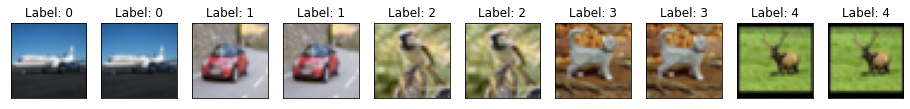

sending new dataset through Training Model... 


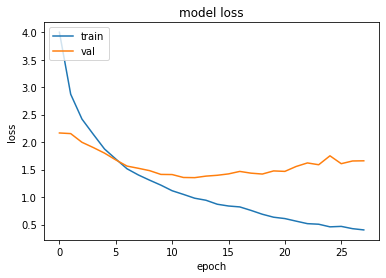

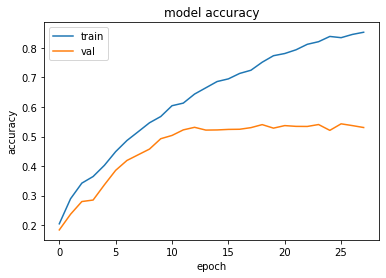

Early-Stop is on Val-Loss with patience = 15
Early Stop Epoch was:  12 when  Val Loss was:  1.3531394004821777 , and Val Acc happened to be 0.5310999751091003
Additionally, the best val acc epoch happened to be  25 when val acc was:  0.542900025844574 and Val Loss happened to be  1.6072967052459717


 Run 56  TestLoss:  1.3312848806381226  TestAcc: 0.5378999710083008


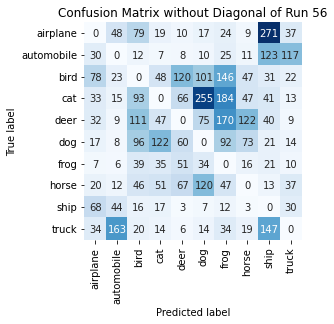

Summing down the rows, for Predictions of each Class that were wrong:  [319. 328. 512. 360. 391. 633. 734. 347. 708. 289.]
For example, the model predicted a  label 4 (deer) on a true   2  a total of  120.0 times
Summing across the columns, for total number of that True Class misidentified:  [514. 343. 616. 747. 615. 503. 219. 413. 200. 451.]
For example, the model misclassified true 4's (deer) as label   6 frog  a total of  170.0 times

 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 

   Begin Run:  57 on Dataset A

 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57  

 ~ ~ ~  List of Run-Specific Parameters  ~ ~ ~ 
Dropout:   0.552
Shift X:  ( 0.0 , 0.0 ) or ( -0.0 , -0.0 )
Shift Y:  ( 0.0 , 0.0 )or ( -0.0 , -0.0 )
Gamma:    ( 100 , 100 )
ZoomOut:  ( -0.0 , -0.0 )
ZoomIn:   ( 0.0 , 0

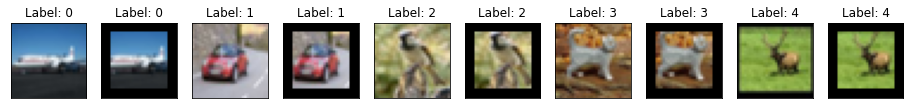

sending new dataset through Training Model... 


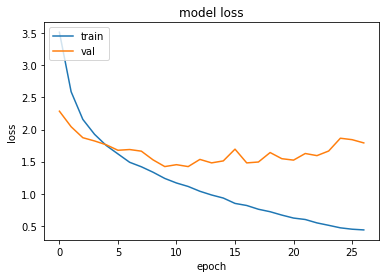

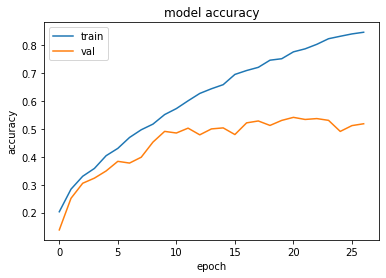

Early-Stop is on Val-Loss with patience = 15
Early Stop Epoch was:  11 when  Val Loss was:  1.4224810600280762 , and Val Acc happened to be 0.5023999810218811
Additionally, the best val acc epoch happened to be  20 when val acc was:  0.5410000085830688 and Val Loss happened to be  1.5232774019241333


 Run 57  TestLoss:  1.395263671875  TestAcc: 0.5088000297546387


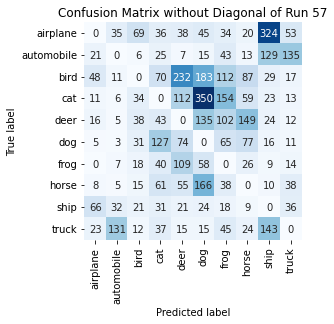

Summing down the rows, for Predictions of each Class that were wrong:  [198. 235. 244. 470. 663. 991. 611. 464. 707. 329.]
For example, the model predicted a  label 4 (deer) on a true   2  a total of  232.0 times
Summing across the columns, for total number of that True Class misidentified:  [654. 394. 789. 762. 524. 409. 281. 396. 258. 445.]
For example, the model misclassified true 4's (deer) as label   7 horse  a total of  149.0 times

 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 

   Begin Run:  58 on Dataset A

 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58  

 ~ ~ ~  List of Run-Specific Parameters  ~ ~ ~ 
Dropout:   0.6
Shift X:  ( 0.0 , 0.0 ) or ( -0.0 , -0.0 )
Shift Y:  ( 0.0625 , 0.0625 )or ( -0.0625 , -0.0625 )
Gamma:    ( 100 , 100 )
ZoomOut:  ( -0.0 , -0.0 )
ZoomIn: 

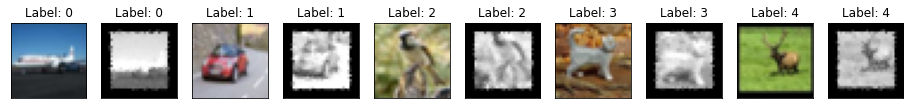

sending new dataset through Training Model... 


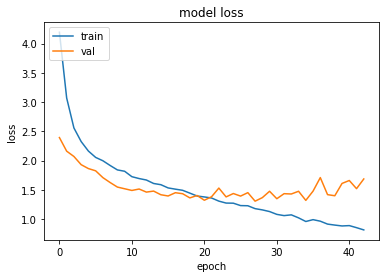

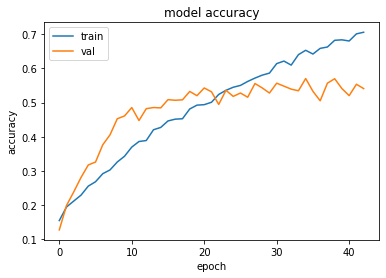

Early-Stop is on Val-Loss with patience = 15
Early Stop Epoch was:  27 when  Val Loss was:  1.304870843887329 , and Val Acc happened to be 0.555899977684021
Additionally, the best val acc epoch happened to be  34 when val acc was:  0.5705000162124634 and Val Loss happened to be  1.3185153007507324


 Run 58  TestLoss:  1.2745836973190308  TestAcc: 0.5576000213623047


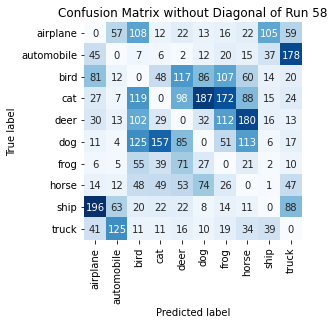

Summing down the rows, for Predictions of each Class that were wrong:  [451. 298. 595. 373. 486. 449. 537. 544. 235. 456.]
For example, the model predicted a  label 4 (deer) on a true   2  a total of  117.0 times
Summing across the columns, for total number of that True Class misidentified:  [414. 322. 545. 737. 527. 569. 236. 324. 444. 306.]
For example, the model misclassified true 4's (deer) as label   7 horse  a total of  180.0 times

 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 

   Begin Run:  59 on Dataset A

 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59  

 ~ ~ ~  List of Run-Specific Parameters  ~ ~ ~ 
Dropout:   0.6
Shift X:  ( 0.0 , 0.0 ) or ( -0.0 , -0.0 )
Shift Y:  ( 0.0 , 0.0 )or ( -0.0 , -0.0 )
Gamma:    ( 100 , 100 )
ZoomOut:  ( -0.16 , -0.16 )
ZoomIn:   ( 0.0 , 

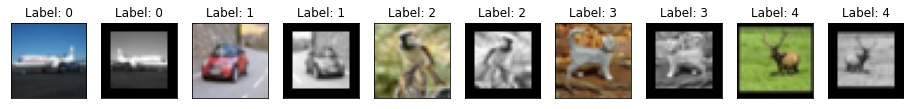

sending new dataset through Training Model... 


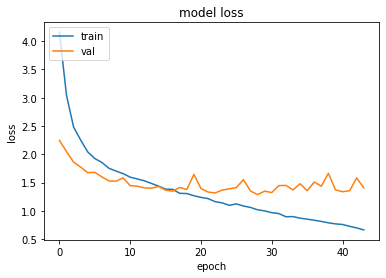

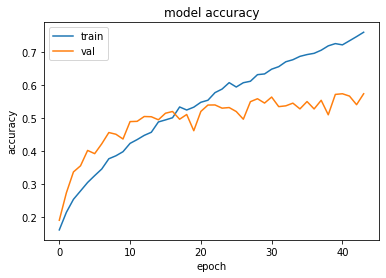

Early-Stop is on Val-Loss with patience = 15
Early Stop Epoch was:  28 when  Val Loss was:  1.2869114875793457 , and Val Acc happened to be 0.5593000054359436
Additionally, the best val acc epoch happened to be  40 when val acc was:  0.574400007724762 and Val Loss happened to be  1.3375588655471802


 Run 59  TestLoss:  1.257125735282898  TestAcc: 0.5652999877929688


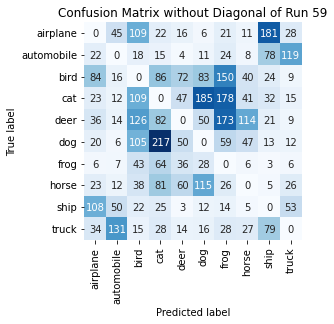

Summing down the rows, for Predictions of each Class that were wrong:  [356. 293. 585. 620. 302. 506. 673. 299. 436. 277.]
For example, the model predicted a  label 4 (deer) on a true   2  a total of  72.0 times
Summing across the columns, for total number of that True Class misidentified:  [439. 299. 564. 642. 625. 529. 199. 386. 292. 372.]
For example, the model misclassified true 4's (deer) as label   6 frog  a total of  173.0 times
time: 9min 12s (started: 2022-01-12 20:37:51 +00:00)


In [69]:
run_through_runs(ds=trainA, ds_noalb=trainA_noalb, dstitle = "A", showpictures=True, troubleshooting=False)

filename will be:  runs_GroupB .pkl

 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 

   Begin Run:  56 on Dataset B

 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56  

 ~ ~ ~  List of Run-Specific Parameters  ~ ~ ~ 
Dropout:   0.6
Shift X:  ( 0.0 , 0.0 ) or ( -0.0 , -0.0 )
Shift Y:  ( 0.0 , 0.0 )or ( -0.0 , -0.0 )
Gamma:    ( 100 , 100 )
ZoomOut:  ( -0.0 , -0.0 )
ZoomIn:   ( 0.0 , 0.0 )
Noise:    ( 0 , 0 )
blur:     ( 0 , 1 )
sharp:    ( 0.0 , 0.0 )
Contrast: ( 0.0 , 0.0 )
Bright:   ( 0.0 , 0.0 )
Darken:   ( -0.0 , -0.0 )
Rotate:   ( 0 , 0 ) or ( 0 , 0 )
pHorizontalFlip:    0
pVerticalFlip:      0
pEqualize:          0
pFancyPCA:          0
pChannelShuffle:    0
pElasticTransform:  0
pToGray:            0
 ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ 


NoAlb+Alb zipped
**********

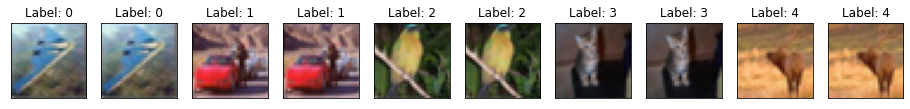

sending new dataset through Training Model... 


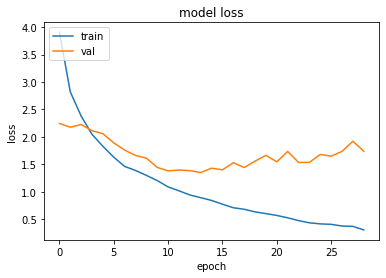

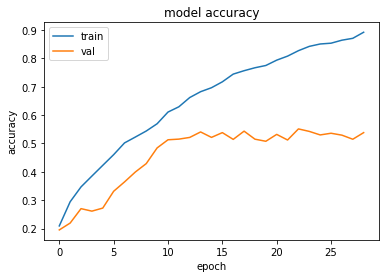

Early-Stop is on Val-Loss with patience = 15
Early Stop Epoch was:  13 when  Val Loss was:  1.349565029144287 , and Val Acc happened to be 0.5407000184059143
Additionally, the best val acc epoch happened to be  22 when val acc was:  0.5514000058174133 and Val Loss happened to be  1.5335640907287598


 Run 56  TestLoss:  1.3197482824325562  TestAcc: 0.5422999858856201


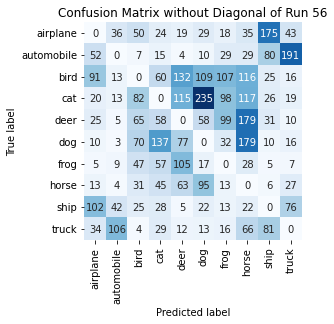

Summing down the rows, for Predictions of each Class that were wrong:  [352. 231. 381. 453. 532. 588. 425. 771. 439. 405.]
For example, the model predicted a  label 4 (deer) on a true   2  a total of  132.0 times
Summing across the columns, for total number of that True Class misidentified:  [429. 417. 669. 725. 530. 534. 280. 297. 335. 361.]
For example, the model misclassified true 4's (deer) as label   7 horse  a total of  179.0 times

 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 

   Begin Run:  57 on Dataset B

 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57  

 ~ ~ ~  List of Run-Specific Parameters  ~ ~ ~ 
Dropout:   0.552
Shift X:  ( 0.0 , 0.0 ) or ( -0.0 , -0.0 )
Shift Y:  ( 0.0 , 0.0 )or ( -0.0 , -0.0 )
Gamma:    ( 100 , 100 )
ZoomOut:  ( -0.0 , -0.0 )
ZoomIn:   ( 0.0 , 

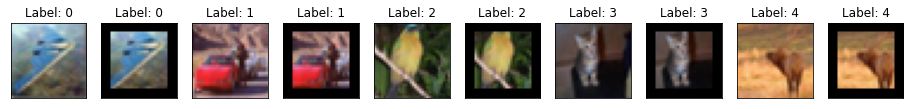

sending new dataset through Training Model... 


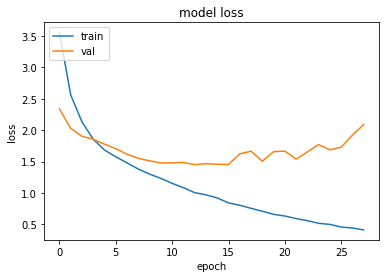

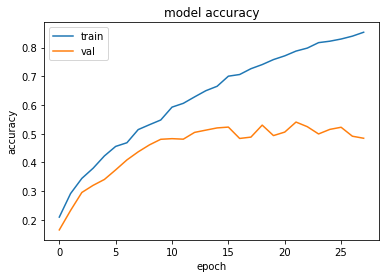

Early-Stop is on Val-Loss with patience = 15
Early Stop Epoch was:  12 when  Val Loss was:  1.4503594636917114 , and Val Acc happened to be 0.5045999884605408
Additionally, the best val acc epoch happened to be  21 when val acc was:  0.5406000018119812 and Val Loss happened to be  1.5384488105773926


 Run 57  TestLoss:  1.402329921722412  TestAcc: 0.5182999968528748


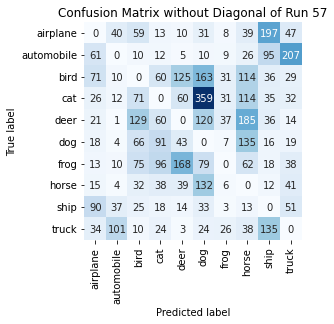

Summing down the rows, for Predictions of each Class that were wrong:  [349. 219. 477. 412. 467. 951. 158. 726. 580. 478.]
For example, the model predicted a  label 4 (deer) on a true   6  a total of  168.0 times
Summing across the columns, for total number of that True Class misidentified:  [444. 435. 639. 740. 603. 399. 559. 319. 284. 395.]
For example, the model misclassified true 4's (deer) as label   7 horse  a total of  185.0 times

 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 

   Begin Run:  58 on Dataset B

 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58  

 ~ ~ ~  List of Run-Specific Parameters  ~ ~ ~ 
Dropout:   0.6
Shift X:  ( 0.0 , 0.0 ) or ( -0.0 , -0.0 )
Shift Y:  ( 0.0625 , 0.0625 )or ( -0.0625 , -0.0625 )
Gamma:    ( 100 , 100 )
ZoomOut:  ( -0.0 , -0.0 )
ZoomIn: 

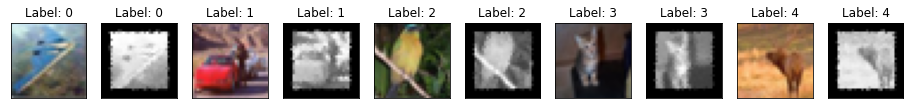

sending new dataset through Training Model... 


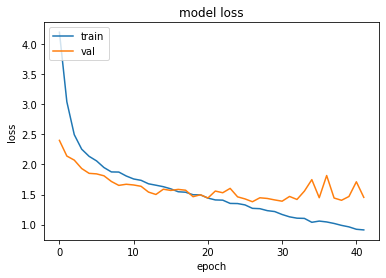

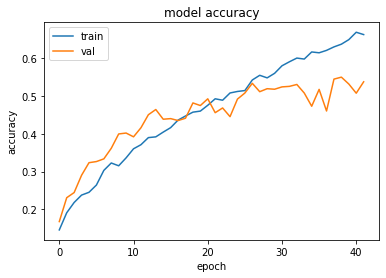

Early-Stop is on Val-Loss with patience = 15
Early Stop Epoch was:  26 when  Val Loss was:  1.3808623552322388 , and Val Acc happened to be 0.5338000059127808
Additionally, the best val acc epoch happened to be  38 when val acc was:  0.5501000285148621 and Val Loss happened to be  1.4049822092056274


 Run 58  TestLoss:  1.3530354499816895  TestAcc: 0.5432999730110168


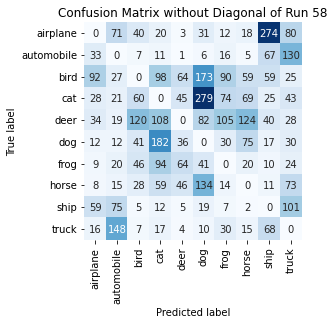

Summing down the rows, for Predictions of each Class that were wrong:  [291. 408. 354. 601. 268. 775. 378. 387. 571. 534.]
For example, the model predicted a  label 4 (deer) on a true   2  a total of  64.0 times
Summing across the columns, for total number of that True Class misidentified:  [549. 276. 687. 644. 660. 435. 328. 388. 285. 315.]
For example, the model misclassified true 4's (deer) as label   7 horse  a total of  124.0 times

 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 

   Begin Run:  59 on Dataset B

 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59  

 ~ ~ ~  List of Run-Specific Parameters  ~ ~ ~ 
Dropout:   0.6
Shift X:  ( 0.0 , 0.0 ) or ( -0.0 , -0.0 )
Shift Y:  ( 0.0 , 0.0 )or ( -0.0 , -0.0 )
Gamma:    ( 100 , 100 )
ZoomOut:  ( -0.16 , -0.16 )
ZoomIn:   ( 0.0 , 0

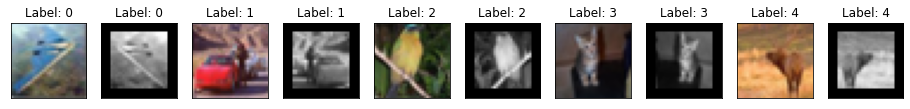

sending new dataset through Training Model... 


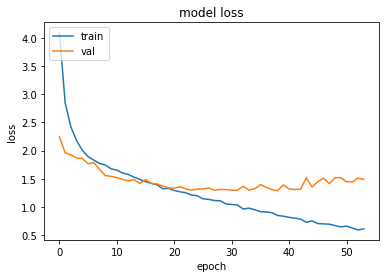

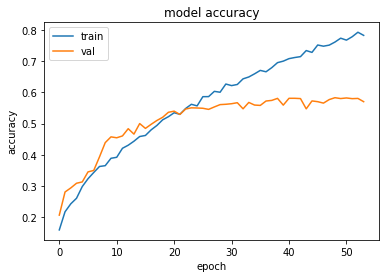

Early-Stop is on Val-Loss with patience = 15
Early Stop Epoch was:  38 when  Val Loss was:  1.2882286310195923 , and Val Acc happened to be 0.5806000232696533
Additionally, the best val acc epoch happened to be  48 when val acc was:  0.5827000141143799 and Val Loss happened to be  1.5186681747436523


 Run 59  TestLoss:  1.255958080291748  TestAcc: 0.5770000219345093


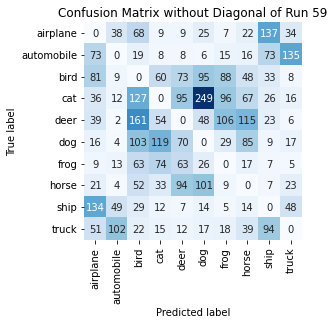

Summing down the rows, for Predictions of each Class that were wrong:  [460. 233. 644. 384. 431. 581. 373. 423. 409. 292.]
For example, the model predicted a  label 4 (deer) on a true   3  a total of  95.0 times
Summing across the columns, for total number of that True Class misidentified:  [349. 353. 495. 724. 554. 452. 277. 344. 312. 370.]
For example, the model misclassified true 4's (deer) as label   2 bird  a total of  161.0 times
time: 7min 50s (started: 2022-01-12 20:47:04 +00:00)


In [70]:
run_through_runs(ds=trainB, ds_noalb=trainB_noalb, dstitle = "B", showpictures=False)

In [ ]:
#@title
run_through_runs(ds=trainC, ds_noalb=trainC_noalb, dstitle = "C", showpictures=False)

filename will be:  runs_GroupD .pkl

 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 

   Begin Run:  56 on Dataset D

 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56  

 ~ ~ ~  List of Run-Specific Parameters  ~ ~ ~ 
Dropout:   0.6
Shift X:  ( 0.0 , 0.0 ) or ( -0.0 , -0.0 )
Shift Y:  ( 0.0 , 0.0 )or ( -0.0 , -0.0 )
Gamma:    ( 100 , 100 )
ZoomOut:  ( -0.0 , -0.0 )
ZoomIn:   ( 0.0 , 0.0 )
Noise:    ( 0 , 0 )
blur:     ( 0 , 1 )
sharp:    ( 0.0 , 0.0 )
Contrast: ( 0.0 , 0.0 )
Bright:   ( 0.0 , 0.0 )
Darken:   ( -0.0 , -0.0 )
Rotate:   ( 0 , 0 ) or ( 0 , 0 )
pHorizontalFlip:    0
pVerticalFlip:      0
pEqualize:          0
pFancyPCA:          0
pChannelShuffle:    0
pElasticTransform:  0
pToGray:            0
 ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ 


NoAlb+Alb zipped
**********

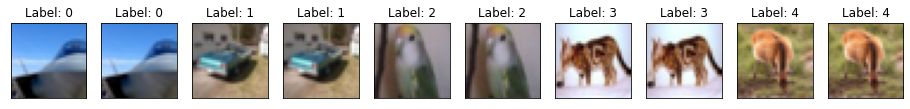

sending new dataset through Training Model... 


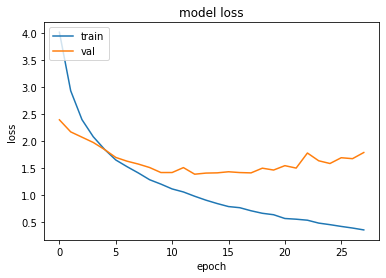

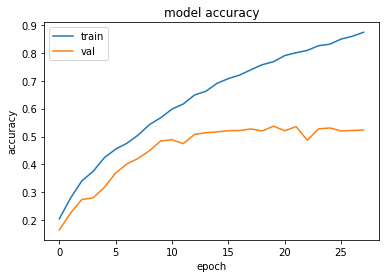

Early-Stop is on Val-Loss with patience = 15
Early Stop Epoch was:  12 when  Val Loss was:  1.3899871110916138 , and Val Acc happened to be 0.5077000260353088
Additionally, the best val acc epoch happened to be  19 when val acc was:  0.5372999906539917 and Val Loss happened to be  1.4667530059814453


 Run 56  TestLoss:  1.3816086053848267  TestAcc: 0.5108000040054321


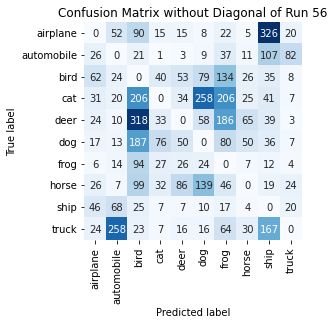

Summing down the rows, for Predictions of each Class that were wrong:  [ 262.  466. 1063.  238.  290.  601.  792.  223.  782.  175.]
For example, the model predicted a  label 4 (deer) on a true   7  a total of  86.0 times
Summing across the columns, for total number of that True Class misidentified:  [553. 297. 461. 828. 736. 516. 214. 478. 204. 605.]
For example, the model misclassified true 4's (deer) as label   2 bird  a total of  318.0 times

 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 

   Begin Run:  57 on Dataset D

 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57  

 ~ ~ ~  List of Run-Specific Parameters  ~ ~ ~ 
Dropout:   0.552
Shift X:  ( 0.0 , 0.0 ) or ( -0.0 , -0.0 )
Shift Y:  ( 0.0 , 0.0 )or ( -0.0 , -0.0 )
Gamma:    ( 100 , 100 )
ZoomOut:  ( -0.0 , -0.0 )
ZoomIn:   

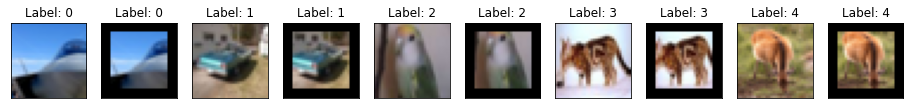

sending new dataset through Training Model... 


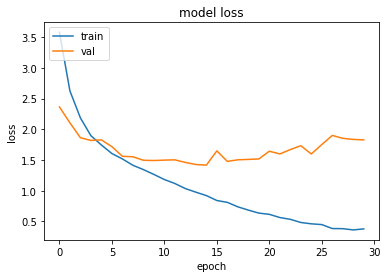

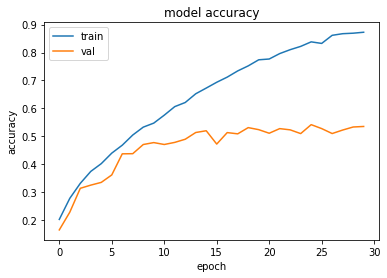

Early-Stop is on Val-Loss with patience = 15
Early Stop Epoch was:  14 when  Val Loss was:  1.41547691822052 , and Val Acc happened to be 0.5200999975204468
Additionally, the best val acc epoch happened to be  24 when val acc was:  0.5418999791145325 and Val Loss happened to be  1.5978147983551025


 Run 57  TestLoss:  1.3813494443893433  TestAcc: 0.5253000259399414


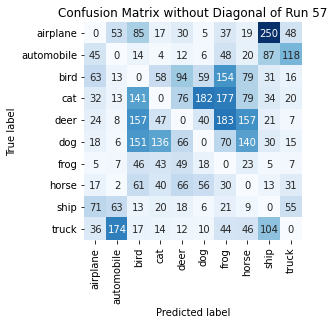

Summing down the rows, for Predictions of each Class that were wrong:  [311. 339. 685. 379. 423. 382. 764. 572. 575. 317.]
For example, the model predicted a  label 4 (deer) on a true   2  a total of  94.0 times
Summing across the columns, for total number of that True Class misidentified:  [544. 354. 567. 754. 644. 632. 203. 316. 276. 457.]
For example, the model misclassified true 4's (deer) as label   6 frog  a total of  183.0 times

 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 

   Begin Run:  58 on Dataset D

 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58  

 ~ ~ ~  List of Run-Specific Parameters  ~ ~ ~ 
Dropout:   0.6
Shift X:  ( 0.0 , 0.0 ) or ( -0.0 , -0.0 )
Shift Y:  ( 0.0625 , 0.0625 )or ( -0.0625 , -0.0625 )
Gamma:    ( 100 , 100 )
ZoomOut:  ( -0.0 , -0.0 )
ZoomIn:   

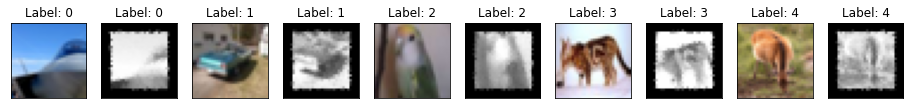

sending new dataset through Training Model... 


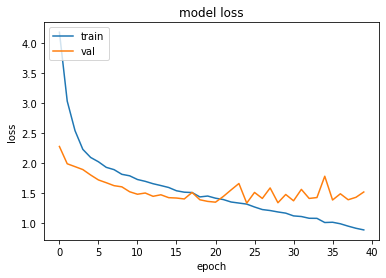

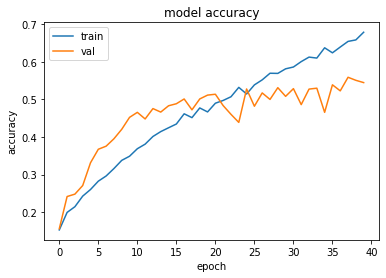

Early-Stop is on Val-Loss with patience = 15
Early Stop Epoch was:  24 when  Val Loss was:  1.3344351053237915 , and Val Acc happened to be 0.527899980545044
Additionally, the best val acc epoch happened to be  37 when val acc was:  0.5590999722480774 and Val Loss happened to be  1.3902803659439087


 Run 58  TestLoss:  1.3120607137680054  TestAcc: 0.5360999703407288


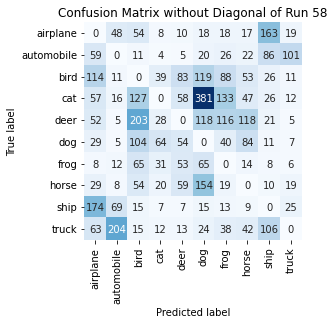

Summing down the rows, for Predictions of each Class that were wrong:  [585. 378. 648. 213. 342. 914. 491. 406. 457. 205.]
For example, the model predicted a  label 4 (deer) on a true   2  a total of  83.0 times
Summing across the columns, for total number of that True Class misidentified:  [355. 334. 544. 857. 666. 398. 262. 372. 334. 517.]
For example, the model misclassified true 4's (deer) as label   2 bird  a total of  203.0 times

 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 

   Begin Run:  59 on Dataset D

 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59  

 ~ ~ ~  List of Run-Specific Parameters  ~ ~ ~ 
Dropout:   0.6
Shift X:  ( 0.0 , 0.0 ) or ( -0.0 , -0.0 )
Shift Y:  ( 0.0 , 0.0 )or ( -0.0 , -0.0 )
Gamma:    ( 100 , 100 )
ZoomOut:  ( -0.16 , -0.16 )
ZoomIn:   ( 0.0 , 0.

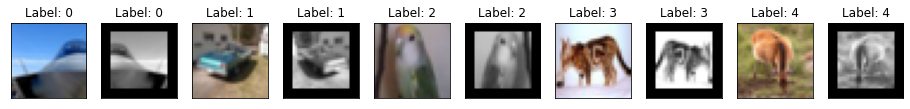

sending new dataset through Training Model... 


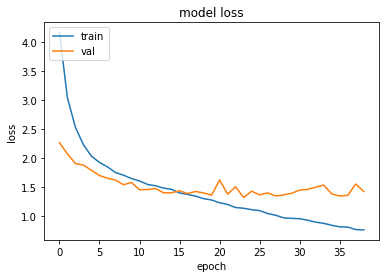

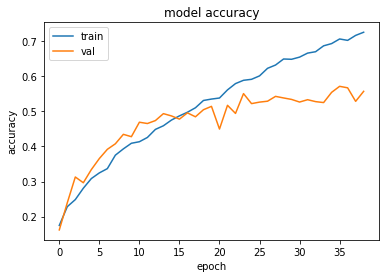

Early-Stop is on Val-Loss with patience = 15
Early Stop Epoch was:  23 when  Val Loss was:  1.3218433856964111 , and Val Acc happened to be 0.5509999990463257
Additionally, the best val acc epoch happened to be  35 when val acc was:  0.5717999935150146 and Val Loss happened to be  1.3466988801956177


 Run 59  TestLoss:  1.2975597381591797  TestAcc: 0.5483999848365784


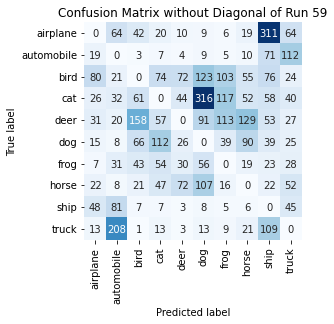

Summing down the rows, for Predictions of each Class that were wrong:  [261. 473. 402. 391. 264. 732. 413. 401. 762. 417.]
For example, the model predicted a  label 4 (deer) on a true   2  a total of  72.0 times
Summing across the columns, for total number of that True Class misidentified:  [545. 240. 628. 746. 679. 420. 291. 367. 210. 390.]
For example, the model misclassified true 4's (deer) as label   2 bird  a total of  158.0 times
time: 6min 38s (started: 2022-01-12 21:01:35 +00:00)


In [72]:
#@title
run_through_runs(ds=trainD, ds_noalb=trainD_noalb, dstitle = "D", showpictures=False)

filename will be:  runs_GroupE .pkl

 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 

   Begin Run:  56 on Dataset E

 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56  

 ~ ~ ~  List of Run-Specific Parameters  ~ ~ ~ 
Dropout:   0.6
Shift X:  ( 0.0 , 0.0 ) or ( -0.0 , -0.0 )
Shift Y:  ( 0.0 , 0.0 )or ( -0.0 , -0.0 )
Gamma:    ( 100 , 100 )
ZoomOut:  ( -0.0 , -0.0 )
ZoomIn:   ( 0.0 , 0.0 )
Noise:    ( 0 , 0 )
blur:     ( 0 , 1 )
sharp:    ( 0.0 , 0.0 )
Contrast: ( 0.0 , 0.0 )
Bright:   ( 0.0 , 0.0 )
Darken:   ( -0.0 , -0.0 )
Rotate:   ( 0 , 0 ) or ( 0 , 0 )
pHorizontalFlip:    0
pVerticalFlip:      0
pEqualize:          0
pFancyPCA:          0
pChannelShuffle:    0
pElasticTransform:  0
pToGray:            0
 ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ 


NoAlb+Alb zipped
**********

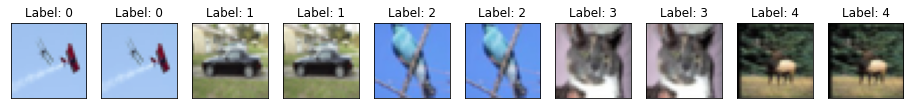

sending new dataset through Training Model... 


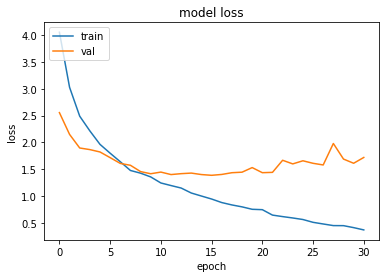

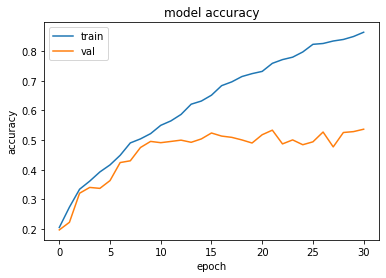

Early-Stop is on Val-Loss with patience = 15
Early Stop Epoch was:  15 when  Val Loss was:  1.3883658647537231 , and Val Acc happened to be 0.5238999724388123
Additionally, the best val acc epoch happened to be  30 when val acc was:  0.5367000102996826 and Val Loss happened to be  1.7207552194595337


 Run 56  TestLoss:  1.3787645101547241  TestAcc: 0.5214999914169312


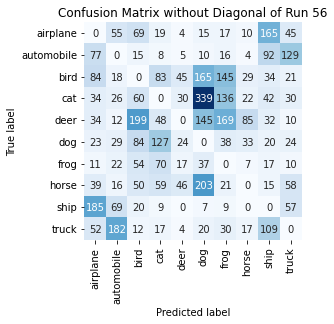

Summing down the rows, for Predictions of each Class that were wrong:  [539. 429. 563. 440. 175. 941. 581. 207. 526. 384.]
For example, the model predicted a  label 4 (deer) on a true   7  a total of  46.0 times
Summing across the columns, for total number of that True Class misidentified:  [399. 356. 624. 719. 734. 402. 245. 507. 356. 443.]
For example, the model misclassified true 4's (deer) as label   2 bird  a total of  199.0 times

 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 

   Begin Run:  57 on Dataset E

 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57  

 ~ ~ ~  List of Run-Specific Parameters  ~ ~ ~ 
Dropout:   0.552
Shift X:  ( 0.0 , 0.0 ) or ( -0.0 , -0.0 )
Shift Y:  ( 0.0 , 0.0 )or ( -0.0 , -0.0 )
Gamma:    ( 100 , 100 )
ZoomOut:  ( -0.0 , -0.0 )
ZoomIn:   ( 0.0 , 0.

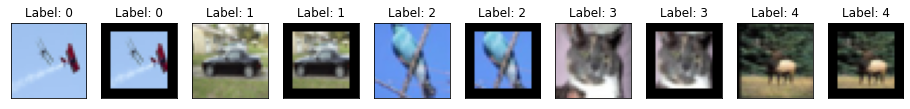

sending new dataset through Training Model... 


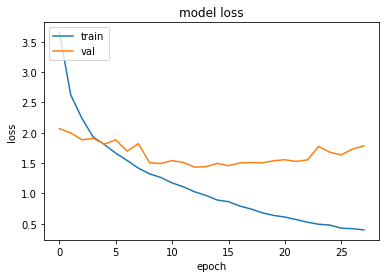

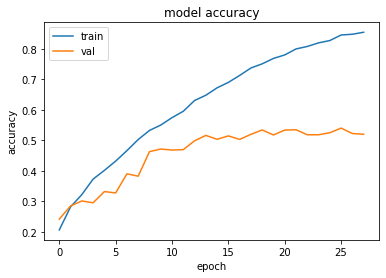

Early-Stop is on Val-Loss with patience = 15
Early Stop Epoch was:  12 when  Val Loss was:  1.4325783252716064 , and Val Acc happened to be 0.49810001254081726
Additionally, the best val acc epoch happened to be  25 when val acc was:  0.5396999716758728 and Val Loss happened to be  1.6363013982772827


 Run 57  TestLoss:  1.3899728059768677  TestAcc: 0.5108000040054321


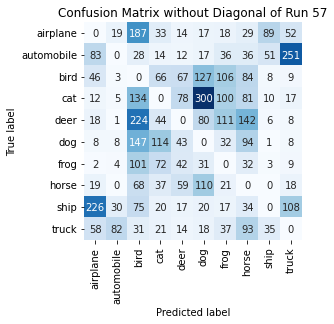

Summing down the rows, for Predictions of each Class that were wrong:  [472. 152. 995. 421. 346. 720. 478. 625. 203. 480.]
For example, the model predicted a  label 4 (deer) on a true   3  a total of  78.0 times
Summing across the columns, for total number of that True Class misidentified:  [458. 528. 516. 737. 634. 455. 296. 332. 547. 389.]
For example, the model misclassified true 4's (deer) as label   2 bird  a total of  224.0 times

 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 

   Begin Run:  58 on Dataset E

 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58  

 ~ ~ ~  List of Run-Specific Parameters  ~ ~ ~ 
Dropout:   0.6
Shift X:  ( 0.0 , 0.0 ) or ( -0.0 , -0.0 )
Shift Y:  ( 0.0625 , 0.0625 )or ( -0.0625 , -0.0625 )
Gamma:    ( 100 , 100 )
ZoomOut:  ( -0.0 , -0.0 )
ZoomIn:   

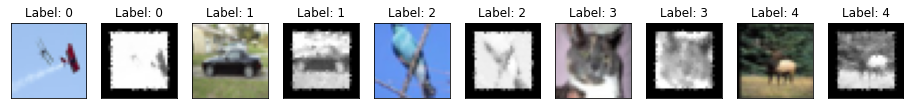

sending new dataset through Training Model... 


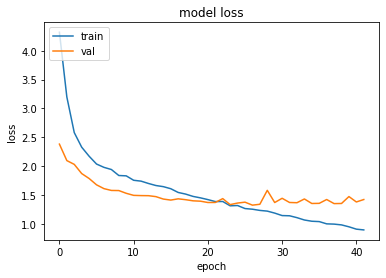

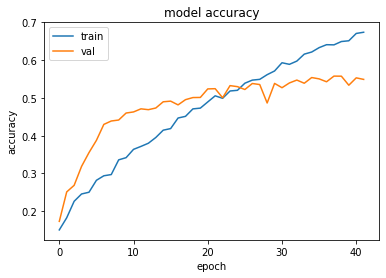

Early-Stop is on Val-Loss with patience = 15
Early Stop Epoch was:  26 when  Val Loss was:  1.3225575685501099 , and Val Acc happened to be 0.5382000207901001
Additionally, the best val acc epoch happened to be  37 when val acc was:  0.5577999949455261 and Val Loss happened to be  1.3494627475738525


 Run 58  TestLoss:  1.2957210540771484  TestAcc: 0.550599992275238


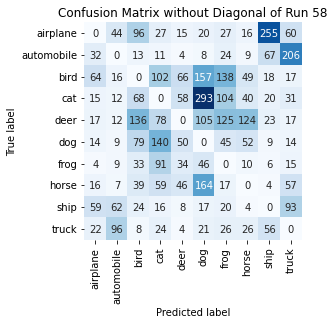

Summing down the rows, for Predictions of each Class that were wrong:  [243. 267. 496. 548. 285. 831. 526. 330. 458. 510.]
For example, the model predicted a  label 4 (deer) on a true   2  a total of  66.0 times
Summing across the columns, for total number of that True Class misidentified:  [560. 374. 627. 641. 637. 412. 248. 409. 303. 283.]
For example, the model misclassified true 4's (deer) as label   2 bird  a total of  136.0 times

 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 

   Begin Run:  59 on Dataset E

 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59  

 ~ ~ ~  List of Run-Specific Parameters  ~ ~ ~ 
Dropout:   0.6
Shift X:  ( 0.0 , 0.0 ) or ( -0.0 , -0.0 )
Shift Y:  ( 0.0 , 0.0 )or ( -0.0 , -0.0 )
Gamma:    ( 100 , 100 )
ZoomOut:  ( -0.16 , -0.16 )
ZoomIn:   ( 0.0 , 0.

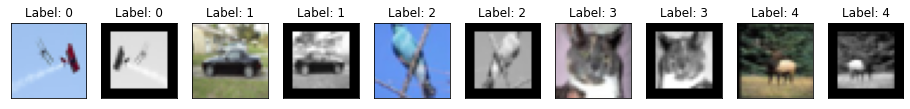

sending new dataset through Training Model... 


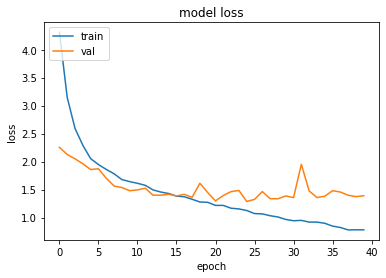

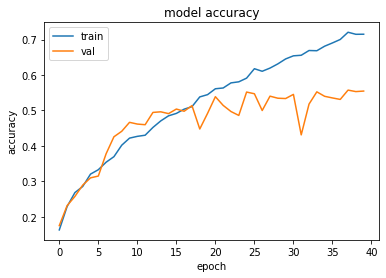

Early-Stop is on Val-Loss with patience = 15
Early Stop Epoch was:  24 when  Val Loss was:  1.2871828079223633 , and Val Acc happened to be 0.5519000291824341
Additionally, the best val acc epoch happened to be  37 when val acc was:  0.5573999881744385 and Val Loss happened to be  1.3988796472549438


 Run 59  TestLoss:  1.240525245666504  TestAcc: 0.5641000270843506


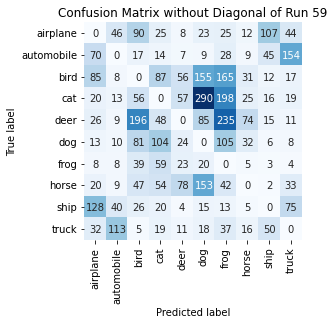

Summing down the rows, for Predictions of each Class that were wrong:  [402. 256. 557. 430. 268. 768. 848. 209. 256. 365.]
For example, the model predicted a  label 4 (deer) on a true   7  a total of  78.0 times
Summing across the columns, for total number of that True Class misidentified:  [380. 353. 616. 694. 699. 383. 169. 438. 326. 301.]
For example, the model misclassified true 4's (deer) as label   6 frog  a total of  235.0 times
time: 7min 41s (started: 2022-01-12 21:08:13 +00:00)


In [73]:
#@title
run_through_runs(ds=trainE, ds_noalb=trainE_noalb, dstitle = "E", showpictures=False)

filename will be:  runs_GroupF .pkl

 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 

   Begin Run:  56 on Dataset F

 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56  

 ~ ~ ~  List of Run-Specific Parameters  ~ ~ ~ 
Dropout:   0.6
Shift X:  ( 0.0 , 0.0 ) or ( -0.0 , -0.0 )
Shift Y:  ( 0.0 , 0.0 )or ( -0.0 , -0.0 )
Gamma:    ( 100 , 100 )
ZoomOut:  ( -0.0 , -0.0 )
ZoomIn:   ( 0.0 , 0.0 )
Noise:    ( 0 , 0 )
blur:     ( 0 , 1 )
sharp:    ( 0.0 , 0.0 )
Contrast: ( 0.0 , 0.0 )
Bright:   ( 0.0 , 0.0 )
Darken:   ( -0.0 , -0.0 )
Rotate:   ( 0 , 0 ) or ( 0 , 0 )
pHorizontalFlip:    0
pVerticalFlip:      0
pEqualize:          0
pFancyPCA:          0
pChannelShuffle:    0
pElasticTransform:  0
pToGray:            0
 ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ 


NoAlb+Alb zipped
**********

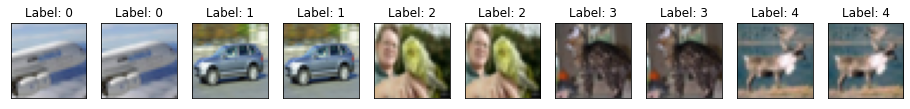

sending new dataset through Training Model... 


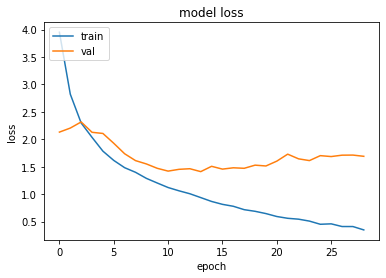

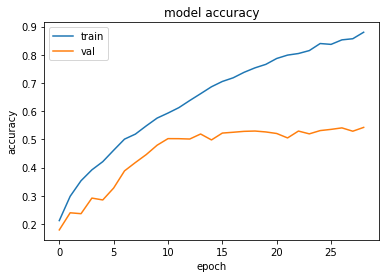

Early-Stop is on Val-Loss with patience = 15
Early Stop Epoch was:  13 when  Val Loss was:  1.410836100578308 , and Val Acc happened to be 0.5192000269889832
Additionally, the best val acc epoch happened to be  28 when val acc was:  0.5425999760627747 and Val Loss happened to be  1.690097451210022


 Run 56  TestLoss:  1.3723405599594116  TestAcc: 0.5246999859809875


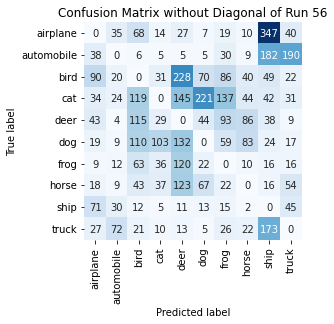

Summing down the rows, for Predictions of each Class that were wrong:  [349. 215. 557. 270. 804. 454. 487. 306. 887. 424.]
For example, the model predicted a  label 4 (deer) on a true   2  a total of  228.0 times
Summing across the columns, for total number of that True Class misidentified:  [567. 470. 636. 797. 461. 556. 304. 389. 204. 369.]
For example, the model misclassified true 4's (deer) as label   2 bird  a total of  115.0 times

 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 

   Begin Run:  57 on Dataset F

 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57  

 ~ ~ ~  List of Run-Specific Parameters  ~ ~ ~ 
Dropout:   0.552
Shift X:  ( 0.0 , 0.0 ) or ( -0.0 , -0.0 )
Shift Y:  ( 0.0 , 0.0 )or ( -0.0 , -0.0 )
Gamma:    ( 100 , 100 )
ZoomOut:  ( -0.0 , -0.0 )
ZoomIn:   ( 0.0 , 0

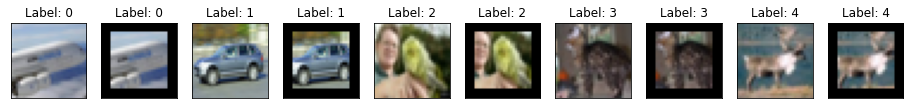

sending new dataset through Training Model... 


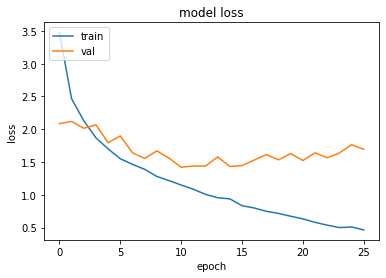

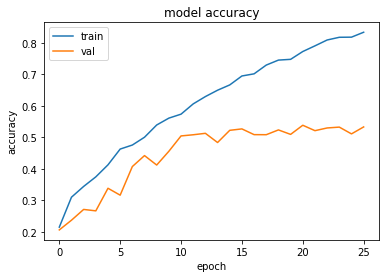

Early-Stop is on Val-Loss with patience = 15
Early Stop Epoch was:  10 when  Val Loss was:  1.421629548072815 , and Val Acc happened to be 0.5044999718666077
Additionally, the best val acc epoch happened to be  20 when val acc was:  0.5383999943733215 and Val Loss happened to be  1.524032473564148


 Run 57  TestLoss:  1.3941236734390259  TestAcc: 0.5055000185966492


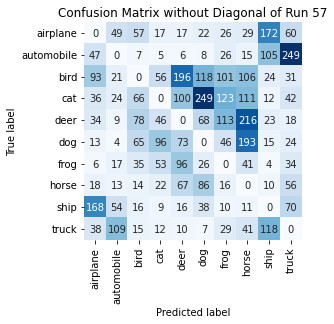

Summing down the rows, for Predictions of each Class that were wrong:  [453. 300. 353. 316. 581. 622. 490. 763. 483. 584.]
For example, the model predicted a  label 4 (deer) on a true   2  a total of  196.0 times
Summing across the columns, for total number of that True Class misidentified:  [449. 468. 746. 763. 605. 529. 312. 302. 392. 379.]
For example, the model misclassified true 4's (deer) as label   7 horse  a total of  216.0 times

 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 

   Begin Run:  58 on Dataset F

 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58  

 ~ ~ ~  List of Run-Specific Parameters  ~ ~ ~ 
Dropout:   0.6
Shift X:  ( 0.0 , 0.0 ) or ( -0.0 , -0.0 )
Shift Y:  ( 0.0625 , 0.0625 )or ( -0.0625 , -0.0625 )
Gamma:    ( 100 , 100 )
ZoomOut:  ( -0.0 , -0.0 )
ZoomIn: 

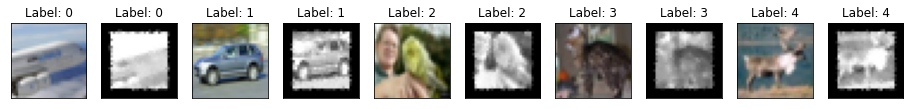

sending new dataset through Training Model... 


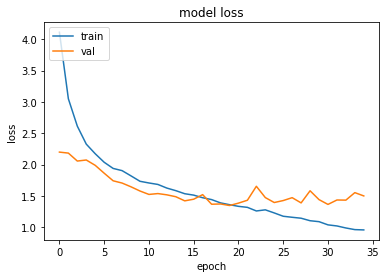

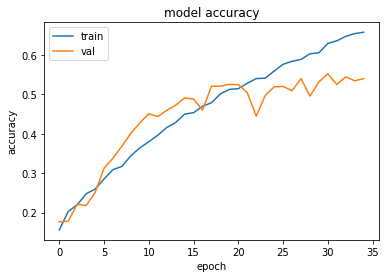

Early-Stop is on Val-Loss with patience = 15
Early Stop Epoch was:  19 when  Val Loss was:  1.3450380563735962 , and Val Acc happened to be 0.5253000259399414
Additionally, the best val acc epoch happened to be  30 when val acc was:  0.5519000291824341 and Val Loss happened to be  1.362532377243042


 Run 58  TestLoss:  1.3119852542877197  TestAcc: 0.5295000076293945


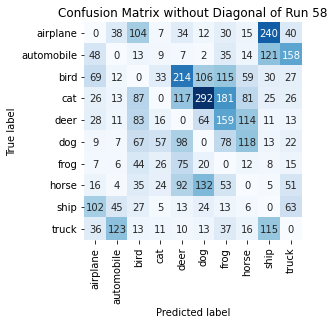

Summing down the rows, for Predictions of each Class that were wrong:  [341. 259. 473. 188. 660. 665. 701. 435. 568. 415.]
For example, the model predicted a  label 4 (deer) on a true   2  a total of  214.0 times
Summing across the columns, for total number of that True Class misidentified:  [520. 407. 665. 848. 499. 469. 213. 412. 298. 374.]
For example, the model misclassified true 4's (deer) as label   6 frog  a total of  159.0 times

 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 

   Begin Run:  59 on Dataset F

 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59  

 ~ ~ ~  List of Run-Specific Parameters  ~ ~ ~ 
Dropout:   0.6
Shift X:  ( 0.0 , 0.0 ) or ( -0.0 , -0.0 )
Shift Y:  ( 0.0 , 0.0 )or ( -0.0 , -0.0 )
Gamma:    ( 100 , 100 )
ZoomOut:  ( -0.16 , -0.16 )
ZoomIn:   ( 0.0 , 0

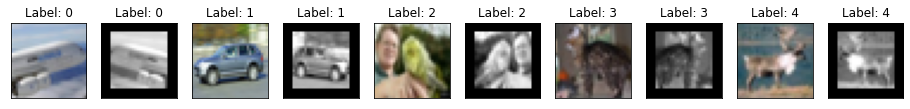

sending new dataset through Training Model... 


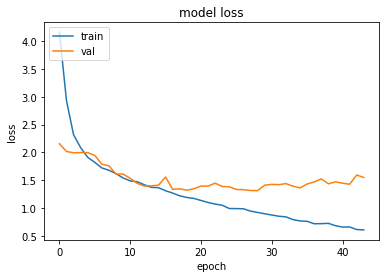

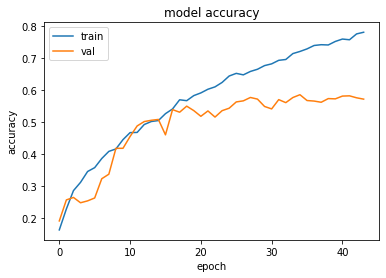

Early-Stop is on Val-Loss with patience = 15
Early Stop Epoch was:  28 when  Val Loss was:  1.3142681121826172 , and Val Acc happened to be 0.5715000033378601
Additionally, the best val acc epoch happened to be  34 when val acc was:  0.5852000117301941 and Val Loss happened to be  1.3632395267486572


 Run 59  TestLoss:  1.2865047454833984  TestAcc: 0.5741999745368958


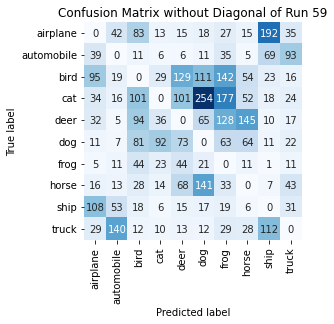

Summing down the rows, for Predictions of each Class that were wrong:  [369. 306. 472. 229. 464. 650. 653. 380. 443. 292.]
For example, the model predicted a  label 4 (deer) on a true   2  a total of  129.0 times
Summing across the columns, for total number of that True Class misidentified:  [440. 275. 618. 777. 532. 424. 171. 363. 273. 385.]
For example, the model misclassified true 4's (deer) as label   7 horse  a total of  145.0 times
time: 7min 5s (started: 2022-01-12 21:15:55 +00:00)


In [74]:
#@title
run_through_runs(ds=trainF, ds_noalb=trainF_noalb, dstitle = "F", showpictures=False)

filename will be:  runs_GroupG .pkl

 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 

   Begin Run:  56 on Dataset G

 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56  

 ~ ~ ~  List of Run-Specific Parameters  ~ ~ ~ 
Dropout:   0.6
Shift X:  ( 0.0 , 0.0 ) or ( -0.0 , -0.0 )
Shift Y:  ( 0.0 , 0.0 )or ( -0.0 , -0.0 )
Gamma:    ( 100 , 100 )
ZoomOut:  ( -0.0 , -0.0 )
ZoomIn:   ( 0.0 , 0.0 )
Noise:    ( 0 , 0 )
blur:     ( 0 , 1 )
sharp:    ( 0.0 , 0.0 )
Contrast: ( 0.0 , 0.0 )
Bright:   ( 0.0 , 0.0 )
Darken:   ( -0.0 , -0.0 )
Rotate:   ( 0 , 0 ) or ( 0 , 0 )
pHorizontalFlip:    0
pVerticalFlip:      0
pEqualize:          0
pFancyPCA:          0
pChannelShuffle:    0
pElasticTransform:  0
pToGray:            0
 ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ 


NoAlb+Alb zipped
**********

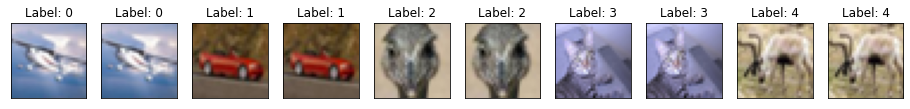

sending new dataset through Training Model... 


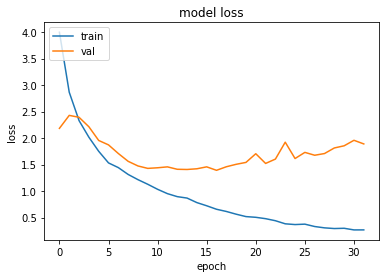

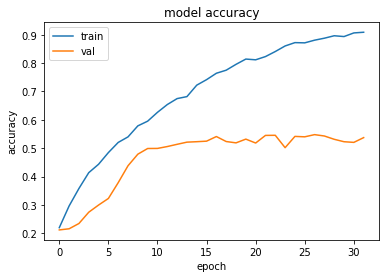

Early-Stop is on Val-Loss with patience = 15
Early Stop Epoch was:  16 when  Val Loss was:  1.3907796144485474 , and Val Acc happened to be 0.5410000085830688
Additionally, the best val acc epoch happened to be  26 when val acc was:  0.5476999878883362 and Val Loss happened to be  1.674926996231079


 Run 56  TestLoss:  1.3629366159439087  TestAcc: 0.5453000068664551


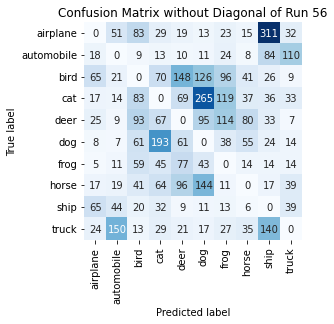

Summing down the rows, for Predictions of each Class that were wrong:  [244. 326. 462. 542. 510. 725. 465. 291. 685. 297.]
For example, the model predicted a  label 4 (deer) on a true   2  a total of  148.0 times
Summing across the columns, for total number of that True Class misidentified:  [576. 287. 602. 673. 523. 461. 282. 448. 239. 456.]
For example, the model misclassified true 4's (deer) as label   6 frog  a total of  114.0 times

 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 

   Begin Run:  57 on Dataset G

 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57  

 ~ ~ ~  List of Run-Specific Parameters  ~ ~ ~ 
Dropout:   0.552
Shift X:  ( 0.0 , 0.0 ) or ( -0.0 , -0.0 )
Shift Y:  ( 0.0 , 0.0 )or ( -0.0 , -0.0 )
Gamma:    ( 100 , 100 )
ZoomOut:  ( -0.0 , -0.0 )
ZoomIn:   ( 0.0 , 0

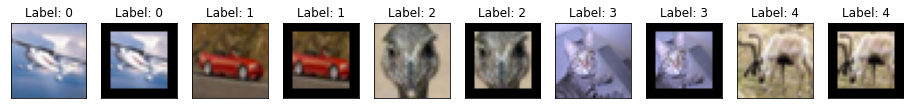

sending new dataset through Training Model... 


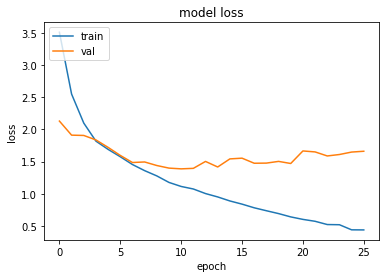

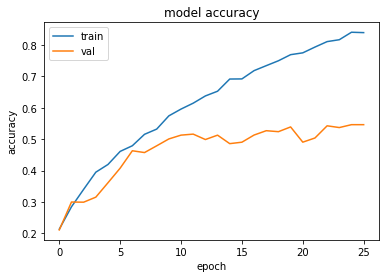

Early-Stop is on Val-Loss with patience = 15
Early Stop Epoch was:  10 when  Val Loss was:  1.3858482837677002 , and Val Acc happened to be 0.5127999782562256
Additionally, the best val acc epoch happened to be  24 when val acc was:  0.5461000204086304 and Val Loss happened to be  1.646789312362671


 Run 57  TestLoss:  1.3675885200500488  TestAcc: 0.5149999856948853


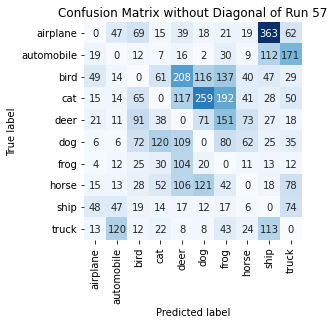

Summing down the rows, for Predictions of each Class that were wrong:  [190. 284. 393. 359. 724. 627. 713. 285. 746. 529.]
For example, the model predicted a  label 4 (deer) on a true   2  a total of  208.0 times
Summing across the columns, for total number of that True Class misidentified:  [653. 378. 701. 781. 501. 515. 231. 473. 254. 363.]
For example, the model misclassified true 4's (deer) as label   6 frog  a total of  151.0 times

 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 

   Begin Run:  58 on Dataset G

 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58  

 ~ ~ ~  List of Run-Specific Parameters  ~ ~ ~ 
Dropout:   0.6
Shift X:  ( 0.0 , 0.0 ) or ( -0.0 , -0.0 )
Shift Y:  ( 0.0625 , 0.0625 )or ( -0.0625 , -0.0625 )
Gamma:    ( 100 , 100 )
ZoomOut:  ( -0.0 , -0.0 )
ZoomIn:  

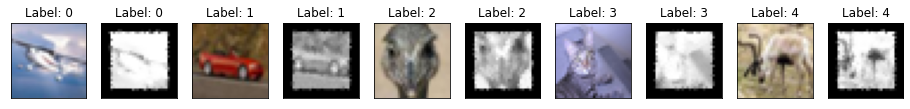

sending new dataset through Training Model... 


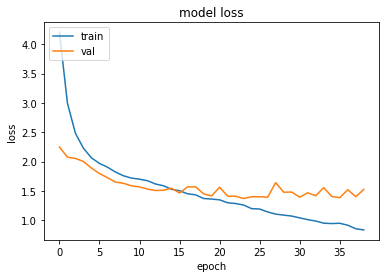

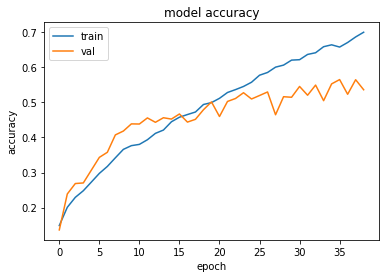

Early-Stop is on Val-Loss with patience = 15
Early Stop Epoch was:  23 when  Val Loss was:  1.3694324493408203 , and Val Acc happened to be 0.5273000001907349
Additionally, the best val acc epoch happened to be  35 when val acc was:  0.5648000240325928 and Val Loss happened to be  1.383639931678772


 Run 58  TestLoss:  1.3571959733963013  TestAcc: 0.5228999853134155


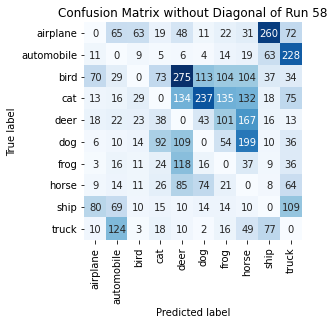

Summing down the rows, for Predictions of each Class that were wrong:  [220. 365. 173. 310. 795. 514. 481. 748. 498. 667.]
For example, the model predicted a  label 4 (deer) on a true   2  a total of  275.0 times
Summing across the columns, for total number of that True Class misidentified:  [591. 359. 839. 789. 441. 530. 270. 312. 331. 309.]
For example, the model misclassified true 4's (deer) as label   7 horse  a total of  167.0 times

 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 

   Begin Run:  59 on Dataset G

 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59  

 ~ ~ ~  List of Run-Specific Parameters  ~ ~ ~ 
Dropout:   0.6
Shift X:  ( 0.0 , 0.0 ) or ( -0.0 , -0.0 )
Shift Y:  ( 0.0 , 0.0 )or ( -0.0 , -0.0 )
Gamma:    ( 100 , 100 )
ZoomOut:  ( -0.16 , -0.16 )
ZoomIn:   ( 0.0 , 

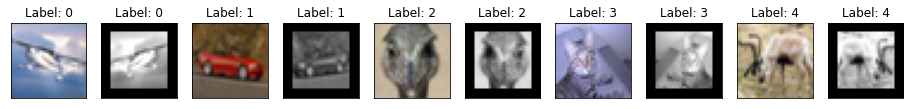

sending new dataset through Training Model... 


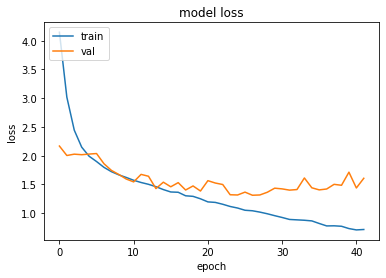

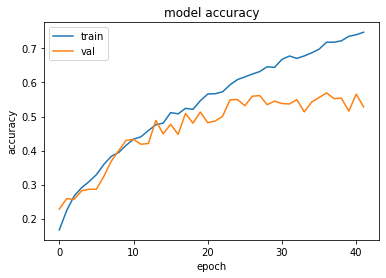

Early-Stop is on Val-Loss with patience = 15
Early Stop Epoch was:  26 when  Val Loss was:  1.31101655960083 , and Val Acc happened to be 0.5595999956130981
Additionally, the best val acc epoch happened to be  36 when val acc was:  0.5695000290870667 and Val Loss happened to be  1.4196712970733643


 Run 59  TestLoss:  1.2791578769683838  TestAcc: 0.5569000244140625


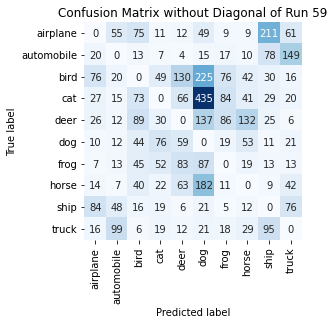

Summing down the rows, for Predictions of each Class that were wrong:  [ 280.  281.  401.  285.  435. 1172.  325.  347.  501.  404.]
For example, the model predicted a  label 4 (deer) on a true   2  a total of  130.0 times
Summing across the columns, for total number of that True Class misidentified:  [492. 313. 664. 790. 543. 305. 332. 390. 287. 315.]
For example, the model misclassified true 4's (deer) as label   5 dog  a total of  137.0 times
time: 7min 6s (started: 2022-01-12 21:23:01 +00:00)


In [75]:
#@title
run_through_runs(ds=trainG, ds_noalb=trainG_noalb, dstitle = "G", showpictures=False)

In [76]:
#@title
# need to continue from run 21 on for G
# run_through_runs(ds=trainG, ds_noalb=trainG_noalb, dstitle = "G", showpictures=False)

time: 1.27 ms (started: 2022-01-12 21:30:08 +00:00)


filename will be:  runs_GroupH .pkl

 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 

   Begin Run:  56 on Dataset H

 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56  

 ~ ~ ~  List of Run-Specific Parameters  ~ ~ ~ 
Dropout:   0.6
Shift X:  ( 0.0 , 0.0 ) or ( -0.0 , -0.0 )
Shift Y:  ( 0.0 , 0.0 )or ( -0.0 , -0.0 )
Gamma:    ( 100 , 100 )
ZoomOut:  ( -0.0 , -0.0 )
ZoomIn:   ( 0.0 , 0.0 )
Noise:    ( 0 , 0 )
blur:     ( 0 , 1 )
sharp:    ( 0.0 , 0.0 )
Contrast: ( 0.0 , 0.0 )
Bright:   ( 0.0 , 0.0 )
Darken:   ( -0.0 , -0.0 )
Rotate:   ( 0 , 0 ) or ( 0 , 0 )
pHorizontalFlip:    0
pVerticalFlip:      0
pEqualize:          0
pFancyPCA:          0
pChannelShuffle:    0
pElasticTransform:  0
pToGray:            0
 ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ 


NoAlb+Alb zipped
**********

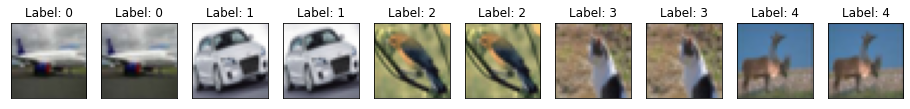

sending new dataset through Training Model... 


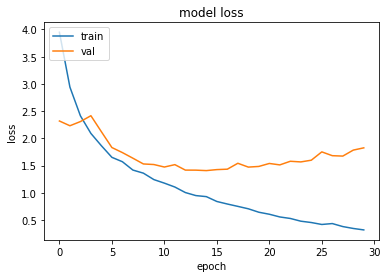

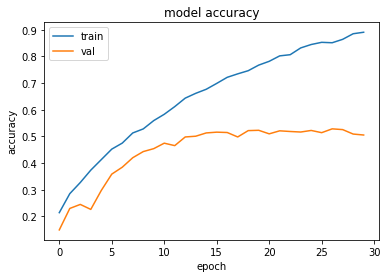

Early-Stop is on Val-Loss with patience = 15
Early Stop Epoch was:  14 when  Val Loss was:  1.4072983264923096 , and Val Acc happened to be 0.5133000016212463
Additionally, the best val acc epoch happened to be  26 when val acc was:  0.5285999774932861 and Val Loss happened to be  1.6813560724258423


 Run 56  TestLoss:  1.375679612159729  TestAcc: 0.5206000208854675


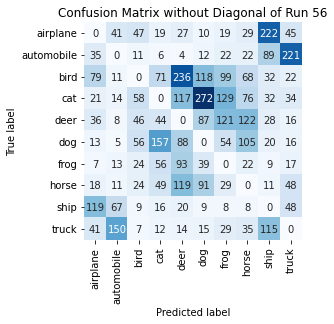

Summing down the rows, for Predictions of each Class that were wrong:  [369. 320. 282. 430. 718. 653. 510. 487. 558. 467.]
For example, the model predicted a  label 4 (deer) on a true   2  a total of  236.0 times
Summing across the columns, for total number of that True Class misidentified:  [459. 422. 736. 753. 508. 514. 280. 400. 304. 418.]
For example, the model misclassified true 4's (deer) as label   7 horse  a total of  122.0 times

 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 

   Begin Run:  57 on Dataset H

 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57  

 ~ ~ ~  List of Run-Specific Parameters  ~ ~ ~ 
Dropout:   0.552
Shift X:  ( 0.0 , 0.0 ) or ( -0.0 , -0.0 )
Shift Y:  ( 0.0 , 0.0 )or ( -0.0 , -0.0 )
Gamma:    ( 100 , 100 )
ZoomOut:  ( -0.0 , -0.0 )
ZoomIn:   ( 0.0 , 

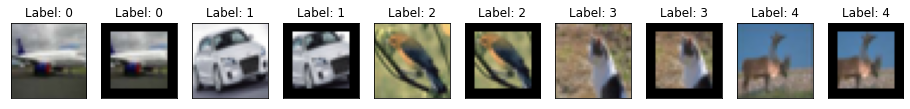

sending new dataset through Training Model... 


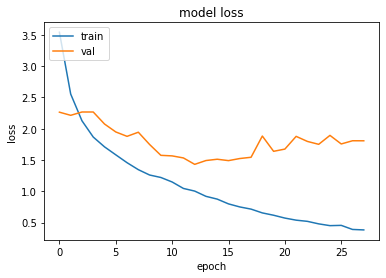

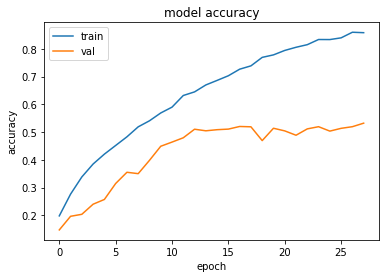

Early-Stop is on Val-Loss with patience = 15
Early Stop Epoch was:  12 when  Val Loss was:  1.4311310052871704 , and Val Acc happened to be 0.5103999972343445
Additionally, the best val acc epoch happened to be  27 when val acc was:  0.5321999788284302 and Val Loss happened to be  1.8075814247131348


 Run 57  TestLoss:  1.408401370048523  TestAcc: 0.5170000195503235


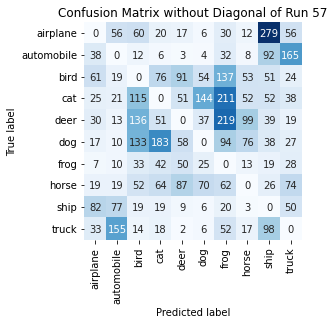

Summing down the rows, for Predictions of each Class that were wrong:  [312. 380. 574. 479. 368. 352. 857. 333. 694. 481.]
For example, the model predicted a  label 4 (deer) on a true   2  a total of  91.0 times
Summing across the columns, for total number of that True Class misidentified:  [536. 360. 566. 709. 643. 636. 227. 473. 285. 395.]
For example, the model misclassified true 4's (deer) as label   6 frog  a total of  219.0 times

 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 

   Begin Run:  58 on Dataset H

 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58  

 ~ ~ ~  List of Run-Specific Parameters  ~ ~ ~ 
Dropout:   0.6
Shift X:  ( 0.0 , 0.0 ) or ( -0.0 , -0.0 )
Shift Y:  ( 0.0625 , 0.0625 )or ( -0.0625 , -0.0625 )
Gamma:    ( 100 , 100 )
ZoomOut:  ( -0.0 , -0.0 )
ZoomIn:   

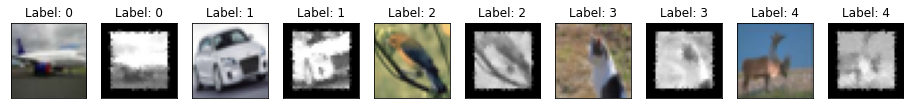

sending new dataset through Training Model... 


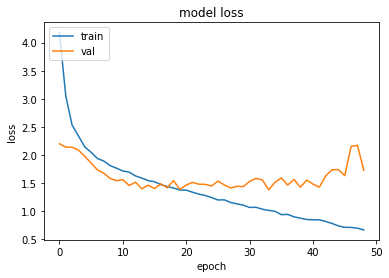

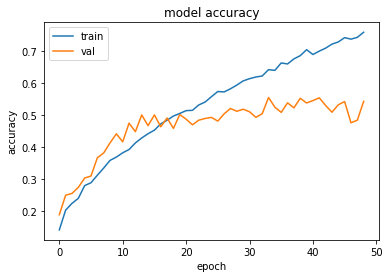

Early-Stop is on Val-Loss with patience = 15
Early Stop Epoch was:  33 when  Val Loss was:  1.3817312717437744 , and Val Acc happened to be 0.5554999709129333
Additionally, the best val acc epoch happened to be  33 when val acc was:  0.5554999709129333 and Val Loss happened to be  1.3817312717437744


 Run 58  TestLoss:  1.3660297393798828  TestAcc: 0.5522000193595886


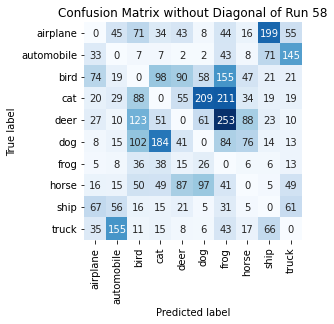

Summing down the rows, for Predictions of each Class that were wrong:  [285. 352. 504. 491. 362. 472. 905. 297. 424. 386.]
For example, the model predicted a  label 4 (deer) on a true   2  a total of  90.0 times
Summing across the columns, for total number of that True Class misidentified:  [515. 318. 583. 684. 646. 537. 153. 409. 277. 356.]
For example, the model misclassified true 4's (deer) as label   6 frog  a total of  253.0 times

 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 

   Begin Run:  59 on Dataset H

 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59  

 ~ ~ ~  List of Run-Specific Parameters  ~ ~ ~ 
Dropout:   0.6
Shift X:  ( 0.0 , 0.0 ) or ( -0.0 , -0.0 )
Shift Y:  ( 0.0 , 0.0 )or ( -0.0 , -0.0 )
Gamma:    ( 100 , 100 )
ZoomOut:  ( -0.16 , -0.16 )
ZoomIn:   ( 0.0 , 0.

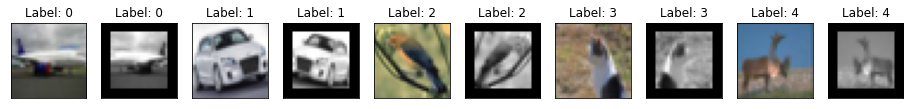

sending new dataset through Training Model... 


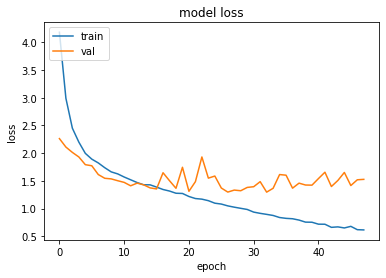

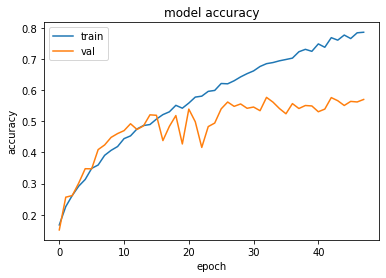

Early-Stop is on Val-Loss with patience = 15
Early Stop Epoch was:  32 when  Val Loss was:  1.295728325843811 , and Val Acc happened to be 0.5764999985694885
Additionally, the best val acc epoch happened to be  32 when val acc was:  0.5764999985694885 and Val Loss happened to be  1.295728325843811


 Run 59  TestLoss:  1.2653616666793823  TestAcc: 0.5795999765396118


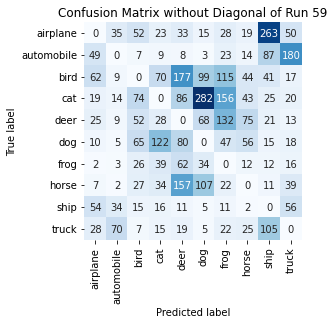

Summing down the rows, for Predictions of each Class that were wrong:  [256. 181. 325. 356. 633. 618. 556. 290. 580. 409.]
For example, the model predicted a  label 4 (deer) on a true   2  a total of  177.0 times
Summing across the columns, for total number of that True Class misidentified:  [518. 380. 634. 719. 423. 418. 206. 406. 204. 296.]
For example, the model misclassified true 4's (deer) as label   6 frog  a total of  132.0 times
time: 6min 50s (started: 2022-01-12 21:30:08 +00:00)


In [77]:
#@title
run_through_runs(ds=trainH, ds_noalb=trainH_noalb, dstitle = "H", showpictures=False)

## 4.2:  Groups of two: AB, CD, EF, GH, 

Merged Groups of 2 
1. Group1_A_B
2. Group2_C_D
3. Group3_E_F
4. Group4_G_H

then later.. 

Merged Groups of 4
1. Group1_a_b_c_d
2. Group2_e_f_g_h

and finally

1. Group_all



In [78]:
#@title
# trainA_noalb + trainB_noalb
# combine datasets I believe I need to add trainA_noalb, and trainB_noalb or just trainA+trainB and then send through no_augmentations...

# pretty_display_of_dataset(trainAB, "AB", opttext="trainAB pictures") # works


# ~~~~~~~~~~ No Augment Versions: ~~~~~~~~~~~~~~~~~~~~~~
trainAB_noalb = make_noalb(trainAB, "AB")           # just testing AB now

 
# Uncomment when ready to run
trainCD_noalb = make_noalb(trainCD, "CD")
trainEF_noalb = make_noalb(trainEF, "EF")
trainGH_noalb = make_noalb(trainGH, "GH")

# # ---  Larger Groups of Four Single Groups ---
 

# # ~~~~~~~~~~ No Augment Versions: ~~~~~~~~~~~~~~~~~~~~~~
trainABCD_noalb = make_noalb(trainABCD, "ABCD")
trainEFGH_noalb = make_noalb(trainEFGH, "EFGH")

# # --- Largest Groups of Eight single Groups ---
trainALL = trainABCD.concatenate(trainEFGH, "ABCDEFGH")
trainALL_noalb = make_noalb(trainALL, "ABCDEFGH")
# groupnum=2
# new_trainX_batch = 10*groupnum  # to ensure you get all 10 categories  
# tot_new_trainX =   5000*groupnum # should be 250*10*2 = 5000  #for FIRST groups but not COMBINED GROUP RUNS = 10000
    

# pretty_display_of_dataset(trainAB_noalb, "AB_noalb") #works
# trainAB_alb = augment_data(dataset = trainAB, process= process_data, dataset_text = "Augmented Dataset", )
# new_trainAB = zip_2_sets(tuple_of_2_subsets_to_zip=(trainAB_noalb, trainAB_alb), opttext="NoAlb+Alb")
# new_trainAB_batched_shuffle = minibatch_shuffle_unbatch_cache_prefetch_bigbatch(new_trainAB, batch=new_trainX_batch, groupnum=2, SEED = 42)
# print(new_trainAB_batched_shuffle)  #prints 500.. batches of 10?
# count_images(new_trainAB_batched_shuffle)
# run_through_runs(ds=trainAB, ds_noalb=trainAB_noalb, dstitle = "TrainAB", groupnum = 2, showpictures=True, troubleshooting=True) #stops at batch2
# view_40_images(new_trainAB_batched_shuffle)
# view_40_images(make_unbatched(new_trainAB_batched_shuffle))  ##WORKS
# pretty_display_of_dataset(ds = make_unbatched(new_trainAB_batched_shuffle), dstitle="trainAB", opttext= str(("newTrainX batched and shuffled using groupnum=") + str(groupnum)), troubleshooting=True) 



trainAB_noalb made
trainCD_noalb made
trainEF_noalb made
trainGH_noalb made
trainABCD_noalb made
trainEFGH_noalb made
trainABCDEFGH_noalb made
time: 139 ms (started: 2022-01-12 21:36:58 +00:00)


In [79]:
#@title
# hasattr(trainAB, '_input_dataset')

# hasattr(trainA, '_input_dataset._input_dataset') 

time: 1.69 ms (started: 2022-01-12 21:36:58 +00:00)


AB, CD

filename will be:  runs_GroupAB .pkl

 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 

   Begin Run:  56 on Dataset AB

 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56  

 ~ ~ ~  List of Run-Specific Parameters  ~ ~ ~ 
Dropout:   0.6
Shift X:  ( 0.0 , 0.0 ) or ( -0.0 , -0.0 )
Shift Y:  ( 0.0 , 0.0 )or ( -0.0 , -0.0 )
Gamma:    ( 100 , 100 )
ZoomOut:  ( -0.0 , -0.0 )
ZoomIn:   ( 0.0 , 0.0 )
Noise:    ( 0 , 0 )
blur:     ( 0 , 1 )
sharp:    ( 0.0 , 0.0 )
Contrast: ( 0.0 , 0.0 )
Bright:   ( 0.0 , 0.0 )
Darken:   ( -0.0 , -0.0 )
Rotate:   ( 0 , 0 ) or ( 0 , 0 )
pHorizontalFlip:    0
pVerticalFlip:      0
pEqualize:          0
pFancyPCA:          0
pChannelShuffle:    0
pElasticTransform:  0
pToGray:            0
 ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ 


NoAlb+Alb zipped
********

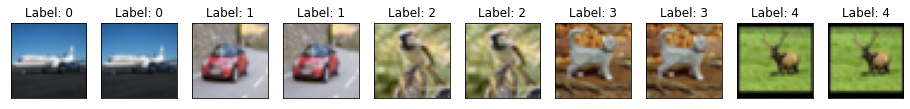

sending new dataset through Training Model... 


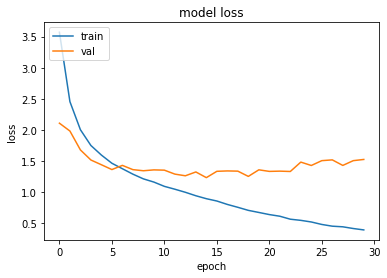

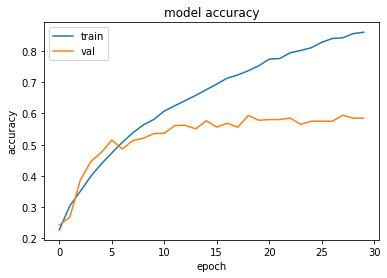

Early-Stop is on Val-Loss with patience = 15
Early Stop Epoch was:  14 when  Val Loss was:  1.232836127281189 , and Val Acc happened to be 0.5764999985694885
Additionally, the best val acc epoch happened to be  27 when val acc was:  0.5942000150680542 and Val Loss happened to be  1.4292876720428467


 Run 56  TestLoss:  1.2119804620742798  TestAcc: 0.5755000114440918


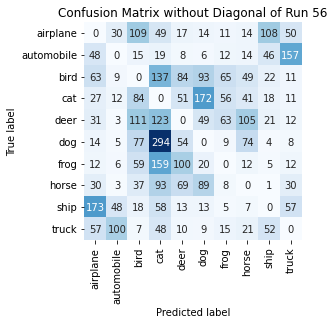

Summing down the rows, for Predictions of each Class that were wrong:  [455. 216. 517. 980. 406. 465. 244. 337. 277. 348.]
For example, the model predicted a  label 4 (deer) on a true   6  a total of  100.0 times
Summing across the columns, for total number of that True Class misidentified:  [402. 325. 533. 472. 518. 539. 385. 360. 392. 319.]
For example, the model misclassified true 4's (deer) as label   3 cat  a total of  123.0 times

 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 

   Begin Run:  57 on Dataset AB

 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57  

 ~ ~ ~  List of Run-Specific Parameters  ~ ~ ~ 
Dropout:   0.552
Shift X:  ( 0.0 , 0.0 ) or ( -0.0 , -0.0 )
Shift Y:  ( 0.0 , 0.0 )or ( -0.0 , -0.0 )
Gamma:    ( 100 , 100 )
ZoomOut:  ( -0.0 , -0.0 )
ZoomIn:   ( 0.0 , 0

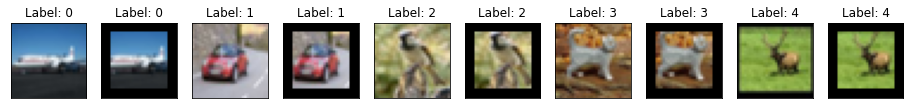

sending new dataset through Training Model... 


In [ ]:
#@title
trainX_list = (trainAB, trainCD)
trainXnoalb_list  = (trainAB_noalb, trainCD_noalb)
trainXtitle_list = ("AB", "CD")
showpictures_list= (False, False)

for trainX, trainX_noalb, trainXtitle, pictures in zip(trainX_list, trainXnoalb_list, trainXtitle_list, showpictures_list):
  run_through_runs(ds=trainX, ds_noalb=trainX_noalb, dstitle = trainXtitle, groupnum=2, showpictures=pictures, troubleshooting=False)

EF, GH

In [ ]:
#@title
trainX_list = (trainEF, trainGH)
trainXnoalb_list  = (trainEF_noalb, trainGH_noalb)
trainXtitle_list = ("EF", "GH")
showpictures_list= (False, False)

for trainX, trainX_noalb, trainXtitle, pictures in zip(trainX_list, trainXnoalb_list, trainXtitle_list, showpictures_list):
  run_through_runs(ds=trainX, ds_noalb=trainX_noalb, dstitle = trainXtitle,  groupnum=2, showpictures=pictures, troubleshooting=False)

ABCD, EFGH

In [ ]:
#@title
trainX_list = (trainABCD, trainEFGH)
trainXnoalb_list  = (trainABCD_noalb, trainEFGH_noalb)
trainXtitle_list = ("ABCD", "EFGH")
showpictures_list= (False, False)

for trainX, trainX_noalb, trainXtitle, pictures in zip(trainX_list, trainXnoalb_list, trainXtitle_list, showpictures_list):
  run_through_runs(ds=trainX, ds_noalb=trainX_noalb, dstitle = trainXtitle,  groupnum=4, showpictures=pictures, troubleshooting=False)

trainABCDEFGH

In [ ]:
#@title
run_through_runs(ds=trainABCDEFGH, ds_noalb=trainABCDEFGH_noalb, dstitle = "trainABCDEFGH",  groupnum=8, showpictures=False, troubleshooting=False)

So far in my effort to concatenate groupA and groupB and run it through the model, it's taken at least 20 minutes to just count the number of images in each class, display the images, and another 5 minutes to run Run0 through the CNN.   At ~25 minutes per run it would take about ~1275 minutes per Group.  There are 7 more groups, that's 8925 minutes, or 148 hours.  Obviously I cant display images for each run or that would take forever.  At 33 minutes I'm not even done running Run 1.

Looking for a faster way to count the dataset, SO, user says \\
`ds.map(lambda x: 1, num_parallel_calls=tf.data.experimental.AUTOTUNE).reduce(tf.constant(0), lambda x,_: x+1) `

In [ ]:
#@title
# ds.map(lambda x: 1, num_parallel_calls=AUTOTUNE).reduce(tf.constant(0), lambda x: 1)

## Time Required: 10 hours



In [ ]:
#@title
stop_testing = time.time()
print((stop_testing - tic) , "secs to  run everything start to end, or... ")
print((stop_testing - tic)/60, "minutes ... or ")
print((stop_testing - tic)/3600, "hours ")



---



# 5. Post-Test: Process Results

After the 51 runs for the single groups have been run, its time to load the results into JMP to Fit the Definitive Screening Design and find which Main Effects have the most compeling effect.   

* I need to get my pickle files unloaded into a dataframe to put in a CSV.

* I had unintentionally created an effect that was captured by my blocking variable (early October?), but have since fixed it.  Original results here -- "[GroupA_Test1](https://github.com/RachelRamirez/CIFAR-10/blob/main/CollectionofTests/Test1GroupA.ipynb)" 



---



as of 11/11/21 its  ** ~9 hours** to run   9 Groups with 51 Runs, at about 45 epochs each.  If I ran it again with GroupA (10th GRoup) it would probably be about 10.5 hours total to this point.  Also note that is just training and capturing results, not diplaying any images thru augmentations, as displaying images and counting the number in each batch is extremely time consuming.  I think it makes one experimental run take at least 20 minutes, so  20times longer overall.



---



In [ ]:
#@title
 import pickle
import numpy as np
import csv
# what does a flattened confuion matrix look like 


#define a list of the pickle files
list_of_pickle_file_names = ['runs_GroupB_final.pkl', 
                             'runs_GroupC_final.pkl', 
                             'runs_GroupD_final.pkl', 
                             'runs_GroupE_final.pkl', 
                             'runs_GroupF_final.pkl', 
                             'runs_GroupG_final.pkl', 
                             'runs_GroupH_final.pkl',] 
                            #  'runs_GroupI_final.pkl', 
                            #  'runs_GroupJ_final.pkl']

list_of_group_names = ("B", "C", "D", "E", "F", "G", "H")    #, "I", "J")

 
 
ds = {}

#for enumerate () zip the 9 pickle files:
for Z, pkl, in zip(list_of_group_names, list_of_pickle_file_names): #list_of_unpickled_names):
  
  with open(pkl, 'rb') as fid:
     print("dataset", Z, " loaded from", pkl)
     ds[Z] = pickle.load(fid)
 

#To reference a Group say ds["Letter"][RunInt]["Metric"]
# The problem was i didnt have a I or J file with runs, nor some runs with 0
# ds["B"][23]["CM_norm"]
# ds["C"][23]["CM_norm"]

ds['B'][0]["CM"]  # the first array of ds["B"][1]["CM"] is [551,  29,  37,  23,  45,  23,  37,  18, 199,  38],
ds['B'][1]["CM"]  # the first array of ds["B"][1]["CM"] is [602,  54,  54,  19,  18,  17,  23,  19, 148,  46],

#can i just replace it Group , and each run, with this function? It'd be ice if i could map it.. versus a for loop of doomr
rows = []
for i in (list_of_group_names):
  for run in range(1,51):             #<!!---------------- ------ change back to 0 once you have and/or end with 51
    cm = (ds[i][run]["CM"]).flatten(order="C")
    cm = cm.flatten()
    cm_norm = (ds[i][run]["CM_norm"]).flatten(order="C")
    cm_norm = cm_norm.flatten()
    # print("new", cm_flat_new)
    row = [i, run,  ds[i][run]["TestAccuracy"],  ds[i][run]["TestLoss"], cm, cm_norm]
    rows.append(row)


df_Groups = pd.DataFrame(rows, columns=["Group", "Run", "TestAccuracy", "TestLoss", "CM", "CM_norm"])

df = df_Groups

CM_arr = np.array(df.loc[:,"CM"].to_list()) # this takes all rows in column "CM"
CM_df = pd.DataFrame(CM_arr) #350 rows 100 columns
CM_df = CM_df.reset_index(drop=True)
new_df = pd.concat([df_Groups, CM_df ], axis=1)

CM_norm_arr = np.array(df.loc[:,"CM_norm"].to_list()) # this takes all rows in column "CM"
CM_norm_df = pd.DataFrame(CM_norm_arr) #350 rows 100 columns
CM_norm_df = CM_norm_df.reset_index(drop=True)

# Place the DataFrames side by side
# horizontal_stack = pd.concat([survey_sub, survey_sub_last10], axis=1)

new_df = pd.concat([new_df, CM_norm_df ], axis=1)
new_df.to_csv('test.csv')




 
 